# **Data Mining Project** 
# Task 2: Clustering Analysis by pyclustering techniques
Pistolesi Veronica, Poli Francesca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Libraries

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from pyclustering.cluster import cluster_visualizer_multidim;
from pyclustering.cluster.cure import cure;

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

from pyclustering.cluster.gmeans import gmeans
from pyclustering.cluster.encoder import type_encoding, cluster_encoder

### Loading users_profile

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering_noout.csv', lineterminator='\n')

In [ ]:
users_profile

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
0,6237.625,138813.625,1031.125,297.5,245.0,21325.0,34.0,723.522858,1.419478,79.342039,1.812974,6.080426,109.637321,3900,0.608718
1,6237.625,138813.625,969.000,297.5,245.0,296689.0,19.0,11508.209770,1.078419,573.720435,1.221178,0.000000,85.026719,3893,0.519137
2,6237.625,92396.000,391.000,77.0,245.0,13121.0,8.0,546.629170,0.490437,43.277519,1.169776,2.375534,80.780317,3885,0.551866
3,6237.625,138813.625,209.000,297.5,245.0,105138.0,7.0,3359.356296,0.392886,157.694596,1.393654,0.000000,84.281111,3884,0.519310
4,6237.625,138486.000,1031.125,185.0,234.0,16181.0,32.0,462.741573,1.166943,40.803260,0.896682,2.354578,95.166473,3870,0.887855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,6237.625,7.000,85.000,297.5,245.0,1.0,3.0,0.043355,0.154787,0.024751,0.591606,3.797743,46.490945,896,4.148438
11504,96.000,8860.000,161.000,21.0,1.0,6181.0,18.0,611.718156,2.666807,82.761468,0.908257,0.000000,84.586538,894,0.121924
11505,107.000,2458.000,9.000,22.0,47.0,976.0,1.0,103.166369,0.256601,19.425197,0.811024,1.331542,82.080645,894,0.142058
11506,6.000,0.000,1.000,0.0,1.0,0.0,1.0,0.000000,0.372678,0.166667,0.500000,0.000000,26.666667,893,0.006719


In [ ]:
users_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      11508 non-null  float64
 1   retweet_count       11508 non-null  float64
 2   favorite_count      11508 non-null  float64
 3   num_hashtags        11508 non-null  float64
 4   num_urls            11508 non-null  float64
 5   max_retweet_count   11508 non-null  float64
 6   max_favorite_count  11508 non-null  float64
 7   std_retweet_count   11508 non-null  float64
 8   std_favorite_count  11508 non-null  float64
 9   popularity          11508 non-null  float64
 10  tweet_richness      11508 non-null  float64
 11  retcount_entropy    11508 non-null  float64
 12  avg_textlen         11508 non-null  float64
 13  days_on_tw          11508 non-null  int64  
 14  activity_richness   11508 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 1.3 MB


### Check for correlations

In [ ]:
users_profile.corr()

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
statuses_count,1.000000,0.693730,0.510523,0.628368,0.786438,0.457679,0.092276,0.275304,-0.036239,0.081600,0.196728,0.474818,0.032629,0.431475,0.783855
retweet_count,0.693730,1.000000,0.520187,0.668553,0.581512,0.655317,0.144100,0.520342,0.103557,0.252473,0.241530,0.444731,0.007805,0.326620,0.563670
favorite_count,0.510523,0.520187,1.000000,0.520556,0.444962,0.317205,0.342583,0.243997,0.249168,0.144537,0.107197,0.390373,0.153141,0.287846,0.588661
num_hashtags,0.628368,0.668553,0.520556,1.000000,0.688419,0.436069,0.099365,0.285859,0.000581,0.093723,0.320630,0.459968,0.289198,0.441272,0.587154
num_urls,0.786438,0.581512,0.444962,0.688419,1.000000,0.377926,0.116790,0.229338,0.002599,0.072142,0.286448,0.412966,0.259454,0.456540,0.707092
max_retweet_count,0.457679,0.655317,0.317205,0.436069,0.377926,1.000000,0.079551,0.768317,0.047868,0.323226,0.143023,0.278995,-0.016815,0.175121,0.413420
max_favorite_count,0.092276,0.144100,0.342583,0.099365,0.116790,0.079551,1.000000,0.229281,0.646514,0.309205,0.049502,0.053943,0.168527,0.099156,0.112104
std_retweet_count,0.275304,0.520342,0.243997,0.285859,0.229338,0.768317,0.229281,1.000000,0.375111,0.761421,0.119150,0.170721,0.091734,0.108707,0.261621
std_favorite_count,-0.036239,0.103557,0.249168,0.000581,0.002599,0.047868,0.646514,0.375111,1.000000,0.667487,0.052472,-0.026931,0.230110,0.076952,-0.037039
popularity,0.081600,0.252473,0.144537,0.093723,0.072142,0.323226,0.309205,0.761421,0.667487,1.000000,0.071044,0.045296,0.168025,0.054726,0.084205


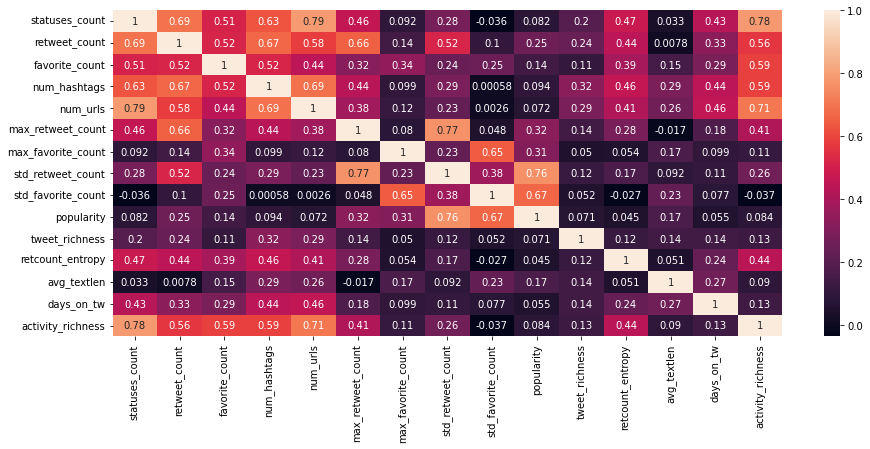

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))         
sns.heatmap(users_profile.corr(), annot=True)
plt.show()

These indicators’ correlations are below the set threshold value (0.8), indicating a weak association.

## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max.
In our project, we performed z-score normalization of the dataset, which standardizes features such that the mean of all of the values is 0 and the standard deviation is 1.

In [ ]:
scaler = StandardScaler()
scaler.fit(users_profile.values)

StandardScaler()

In [ ]:
users_profile.head().values

array([[6.23762500e+03, 1.38813625e+05, 1.03112500e+03, 2.97500000e+02,
        2.45000000e+02, 2.13250000e+04, 3.40000000e+01, 7.23522858e+02,
        1.41947839e+00, 7.93420388e+01, 1.81297388e+00, 6.08042594e+00,
        1.09637321e+02, 3.90000000e+03, 6.08717949e-01],
       [6.23762500e+03, 1.38813625e+05, 9.69000000e+02, 2.97500000e+02,
        2.45000000e+02, 2.96689000e+05, 1.90000000e+01, 1.15082098e+04,
        1.07841900e+00, 5.73720435e+02, 1.22117763e+00, 0.00000000e+00,
        8.50267194e+01, 3.89300000e+03, 5.19136912e-01],
       [6.23762500e+03, 9.23960000e+04, 3.91000000e+02, 7.70000000e+01,
        2.45000000e+02, 1.31210000e+04, 8.00000000e+00, 5.46629170e+02,
        4.90437268e-01, 4.32775187e+01, 1.16977612e+00, 2.37553356e+00,
        8.07803172e+01, 3.88500000e+03, 5.51866152e-01],
       [6.23762500e+03, 1.38813625e+05, 2.09000000e+02, 2.97500000e+02,
        2.45000000e+02, 1.05138000e+05, 7.00000000e+00, 3.35935630e+03,
        3.92886411e-01, 1.57694596e+0

In [ ]:
X = scaler.transform(users_profile.values)

In [ ]:
X[:5]

array([[ 1.87421842e+00,  1.81335330e+00,  2.01878891e+00,
         2.02814771e+00,  1.94677376e+00, -1.58836679e-01,
        -1.48893541e-01, -1.81452454e-01, -1.18609318e-01,
        -1.20992222e-01,  1.00483459e+00,  2.93705988e+00,
         2.37021204e+00,  3.76411345e+00,  1.41521552e-01],
       [ 1.87421842e+00,  1.81335330e+00,  1.85748279e+00,
         2.02814771e+00,  1.94677376e+00,  2.65084441e+00,
        -1.61040201e-01,  1.80143057e+00, -1.21355736e-01,
         1.14738060e-01,  4.89220259e-01, -6.24506907e-01,
         8.87347396e-01,  3.75144203e+00,  1.34581115e-02],
       [ 1.87421842e+00,  9.99600053e-01,  3.56719226e-01,
        -3.18727710e-03,  1.94677376e+00, -2.42546328e-01,
        -1.69947751e-01, -2.13976300e-01, -1.26090524e-01,
        -1.38188563e-01,  4.44435660e-01,  7.66945187e-01,
         6.31488561e-01,  3.73696040e+00,  6.02472445e-02],
       [ 1.87421842e+00,  1.81335330e+00, -1.15839544e-01,
         2.02814771e+00,  1.94677376e+00,  6.96350640

# CURE

In [ ]:
input_data = list(X)

# Allocate clusters.
cure_instance2 = cure(input_data, 2);
cure_instance2.process();
clusters2 = cure_instance2.get_clusters();

cure_instance3 = cure(input_data, 3);
cure_instance3.process();
clusters3 = cure_instance3.get_clusters();

cure_instance4 = cure(input_data, 4);
cure_instance4.process();
clusters4 = cure_instance4.get_clusters();

cure_instance5 = cure(input_data, 5);
cure_instance5.process();
clusters5 = cure_instance5.get_clusters();

cure_instance6 = cure(input_data, 6);
cure_instance6.process();
clusters6 = cure_instance6.get_clusters();

In [ ]:
#len(clusters3)

In [ ]:
# Prepare cluster labels
cluster_labels = []

cluster_labels2 = np.zeros([11508], dtype=int)    # 0,1
for x in np.nditer(np.asarray(clusters2[1])):
   cluster_labels2[x] = 1
cluster_labels.append(cluster_labels2)

cluster_labels3 = np.zeros([11508], dtype=int)    # 0,1,2
for x in np.nditer(np.asarray(clusters3[1])):
   cluster_labels3[x] = 1
for x in np.nditer(np.asarray(clusters3[2])):
   cluster_labels3[x] = 2
cluster_labels.append(cluster_labels3)

cluster_labels4 = np.zeros([11508], dtype=int)    # 0,1,2,3
for x in np.nditer(np.asarray(clusters4[1])):
   cluster_labels4[x] = 1
for x in np.nditer(np.asarray(clusters4[2])):
   cluster_labels4[x] = 2
for x in np.nditer(np.asarray(clusters4[3])):
   cluster_labels4[x] = 3
cluster_labels.append(cluster_labels4)

cluster_labels5 = np.zeros([11508], dtype=int)    # 0,1,2,3,4
for x in np.nditer(np.asarray(clusters5[1])):
   cluster_labels5[x] = 1
for x in np.nditer(np.asarray(clusters5[2])):
   cluster_labels5[x] = 2
for x in np.nditer(np.asarray(clusters5[3])):
   cluster_labels5[x] = 3
for x in np.nditer(np.asarray(clusters5[4])):
   cluster_labels5[x] = 4
cluster_labels.append(cluster_labels5)

cluster_labels6 = np.zeros([11508], dtype=int)    # 0,1,2,3,4,5
for x in np.nditer(np.asarray(clusters6[1])):
   cluster_labels6[x] = 1
for x in np.nditer(np.asarray(clusters6[2])):
   cluster_labels6[x] = 2
for x in np.nditer(np.asarray(clusters6[3])):
   cluster_labels6[x] = 3
for x in np.nditer(np.asarray(clusters6[4])):
   cluster_labels6[x] = 4
for x in np.nditer(np.asarray(clusters6[5])):
   cluster_labels6[x] = 5
cluster_labels.append(cluster_labels6)



In [ ]:
# Visualize allocated clusters.                     # bad visualization due to the number of features 
#visualizer = cluster_visualizer_multidim();
#visualizer.append_clusters(clusters, input_data);
#visualizer.show();

## Clusters characterization with respect to categorical features

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_noout.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,6237.625,138813.625,0.0,1031.125,297.5,...,0.0,8.831943,6.080426,0.0,9.183814,9.578214,10.607494,109.637321,3900,0.608718
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,6237.625,138813.625,0.0,969.000,297.5,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,85.026719,3893,0.519137
2,755116,呉⚛,en,0,2012-02-08 05:25:49,6237.625,92396.000,0.0,391.000,77.0,...,0.0,3.921117,2.375534,0.0,4.836434,5.114369,6.387527,80.780317,3885,0.551866
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,6237.625,138813.625,0.0,209.000,297.5,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.281111,3884,0.519310
4,785080,W H,en,0,2012-02-23 01:08:16,6237.625,138486.000,0.0,1031.125,185.0,...,0.0,8.277790,2.354578,0.0,8.421512,8.222893,9.556485,95.166473,3870,0.887855


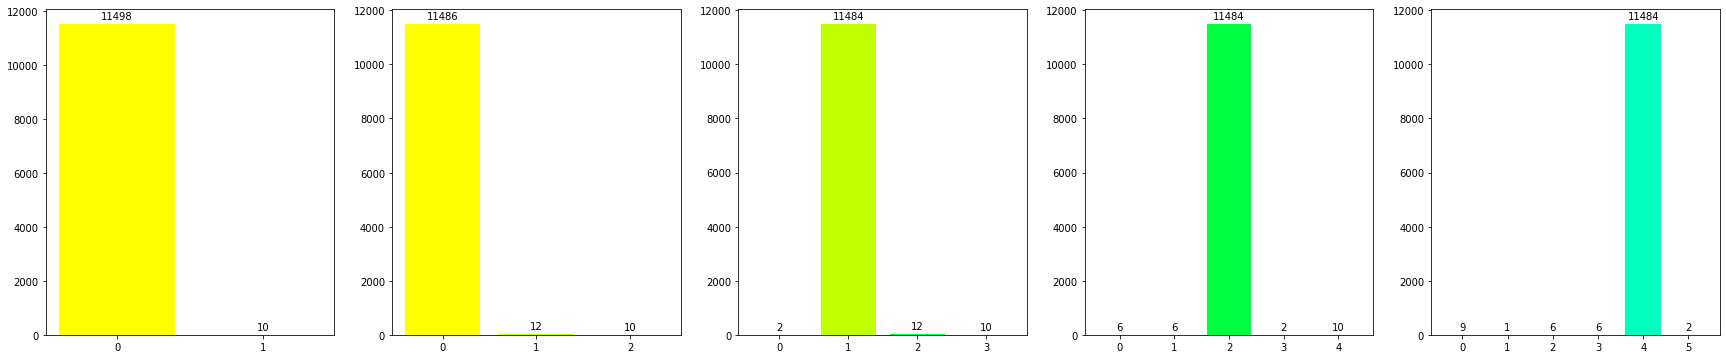

In [ ]:
fig, ax = plt.subplots(ncols=len(cluster_labels), figsize=(30,6))
for i in range(len(cluster_labels)):
  hist, bins = np.histogram(cluster_labels[i], bins=range(0, len(set(cluster_labels[i])) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

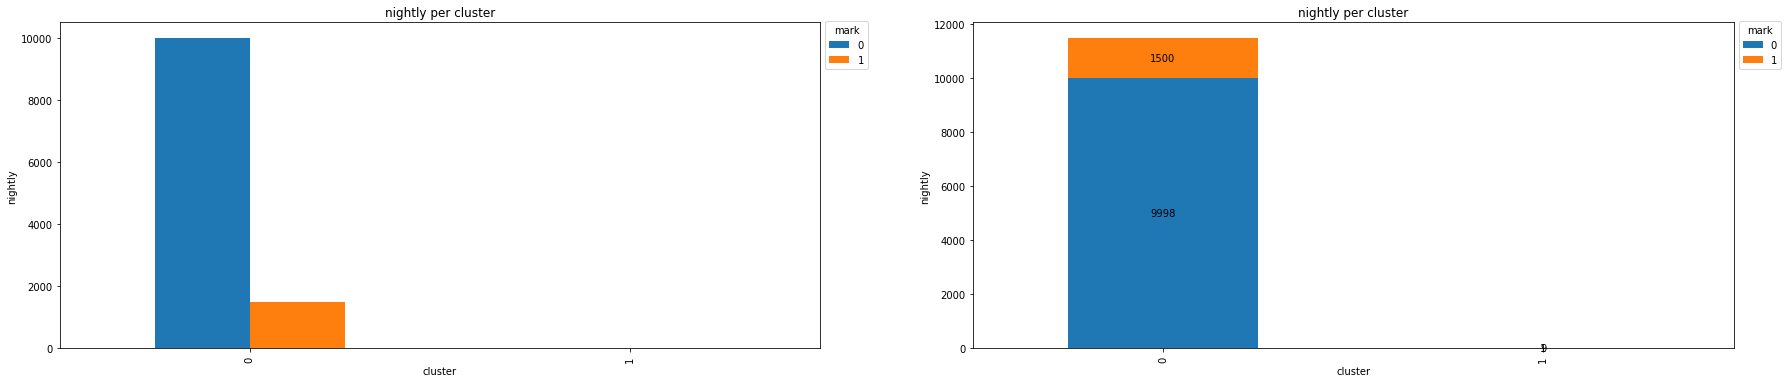

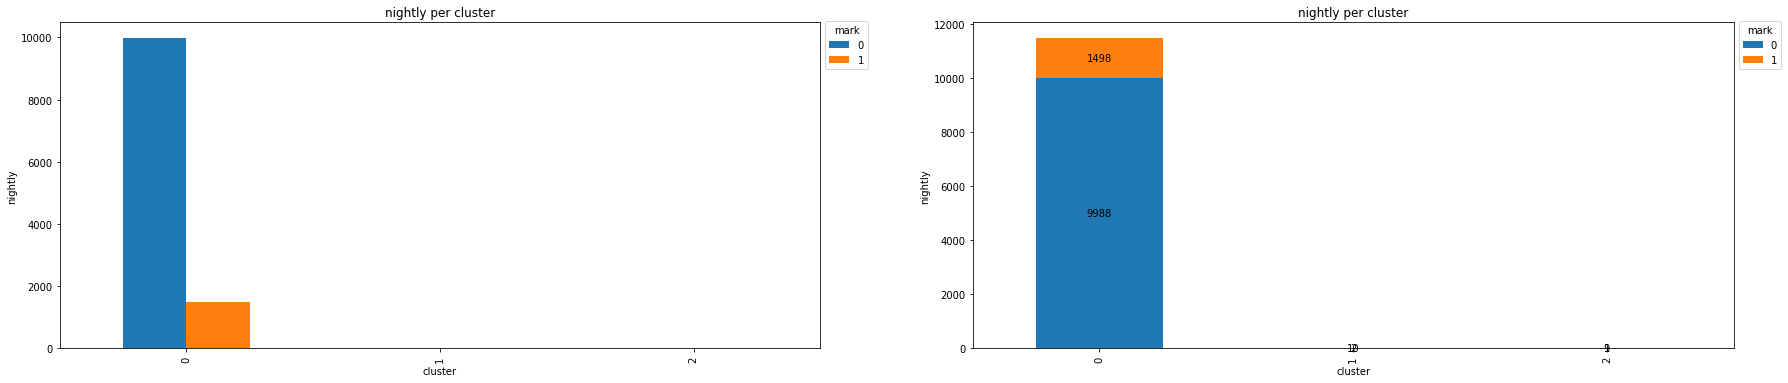

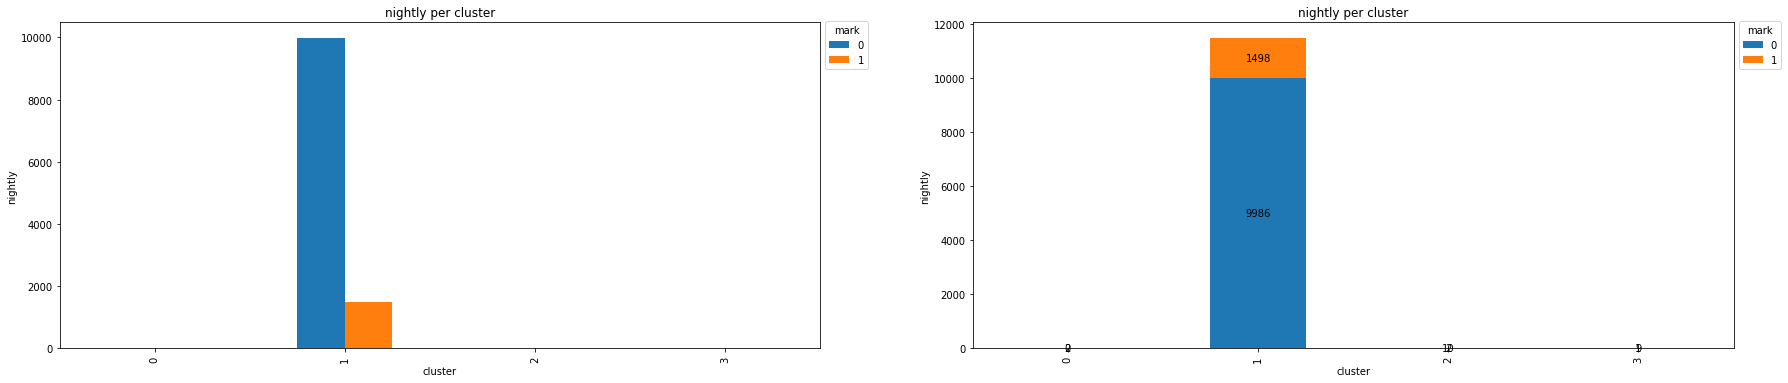

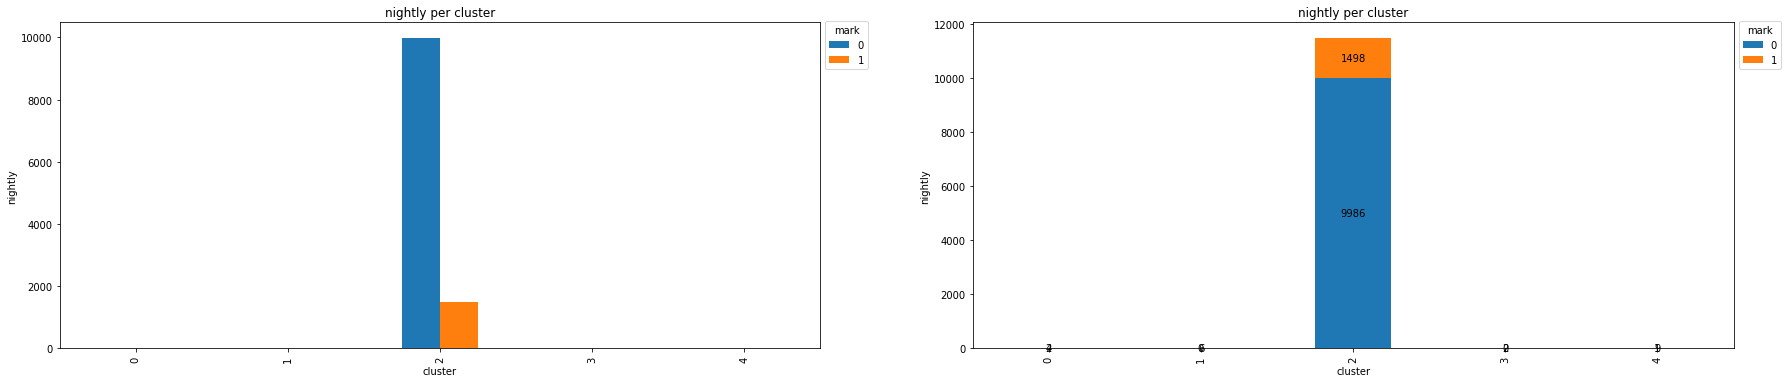

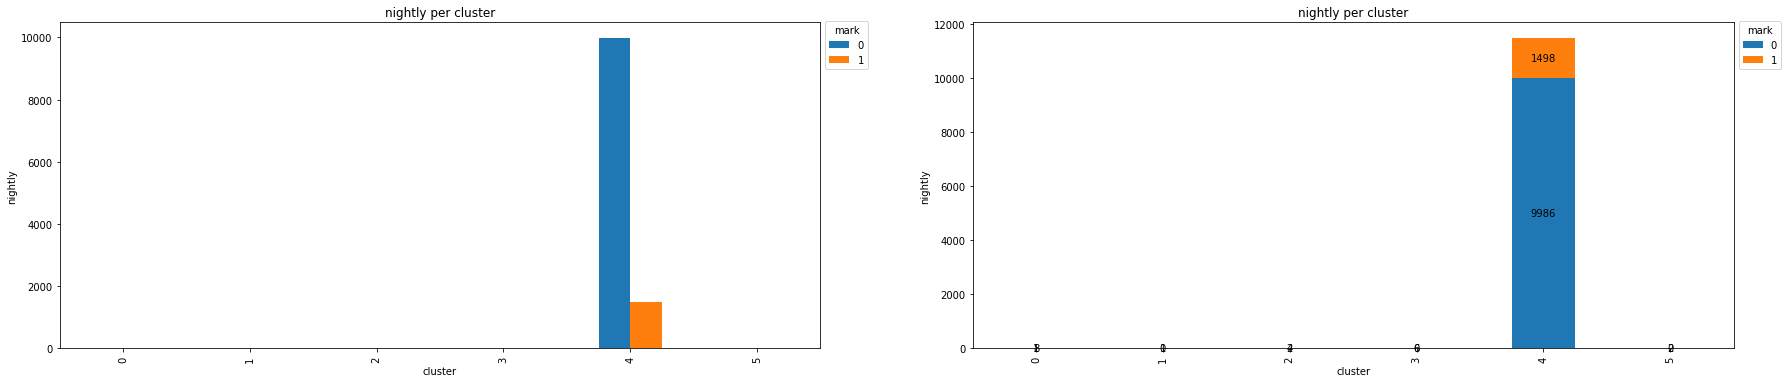

In [ ]:
for i in range(len(cluster_labels)):
  nightly_ct = pd.crosstab(cluster_labels[i],users_profile_all['nightly'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('nightly')

  ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('nightly')

  plt.show()

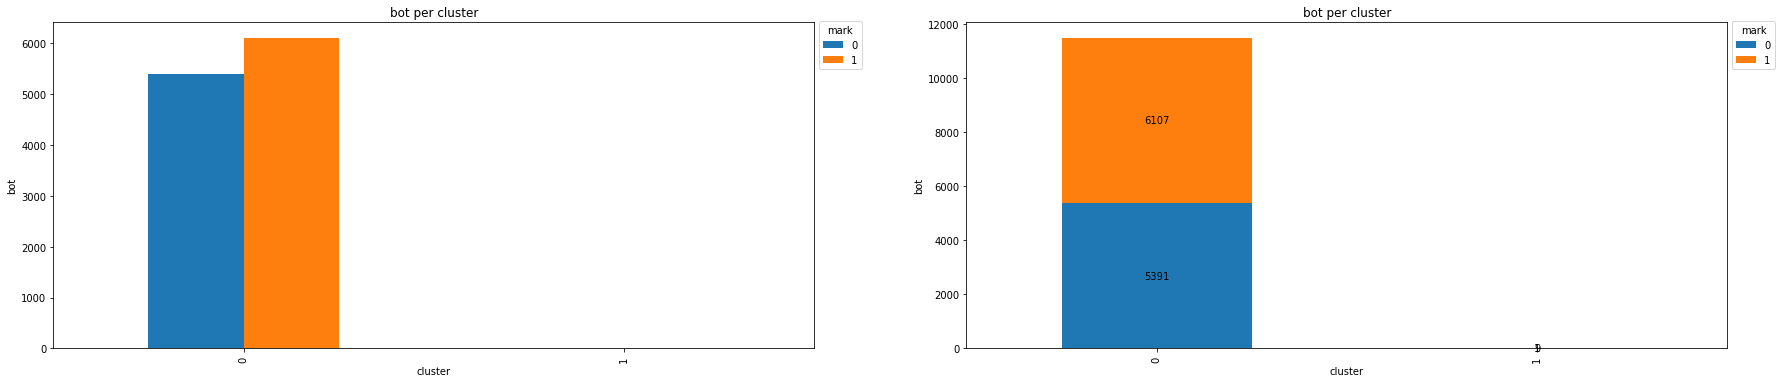

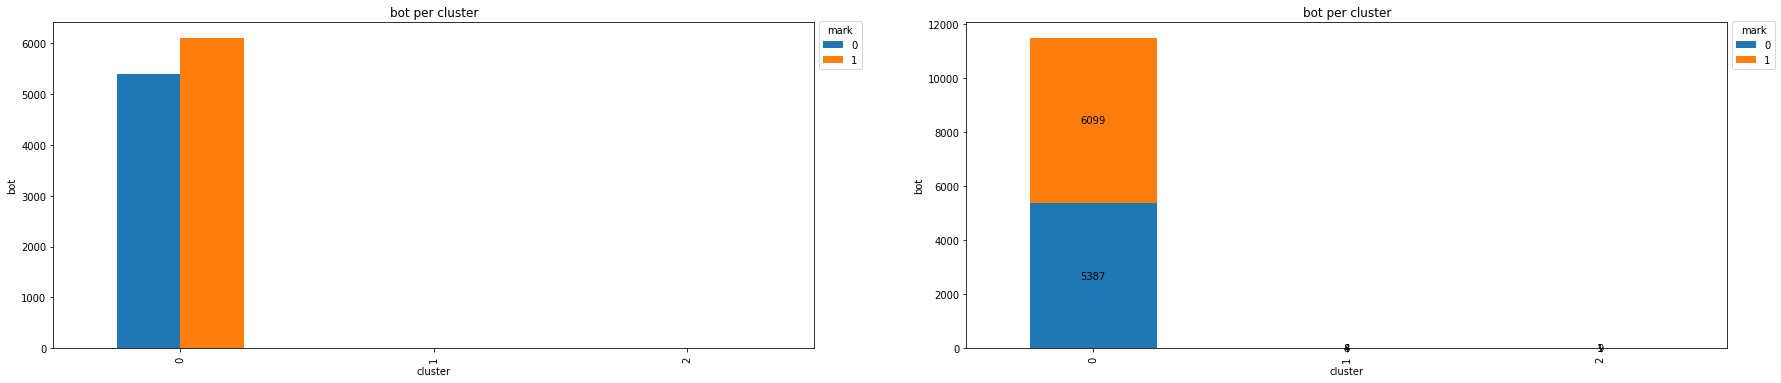

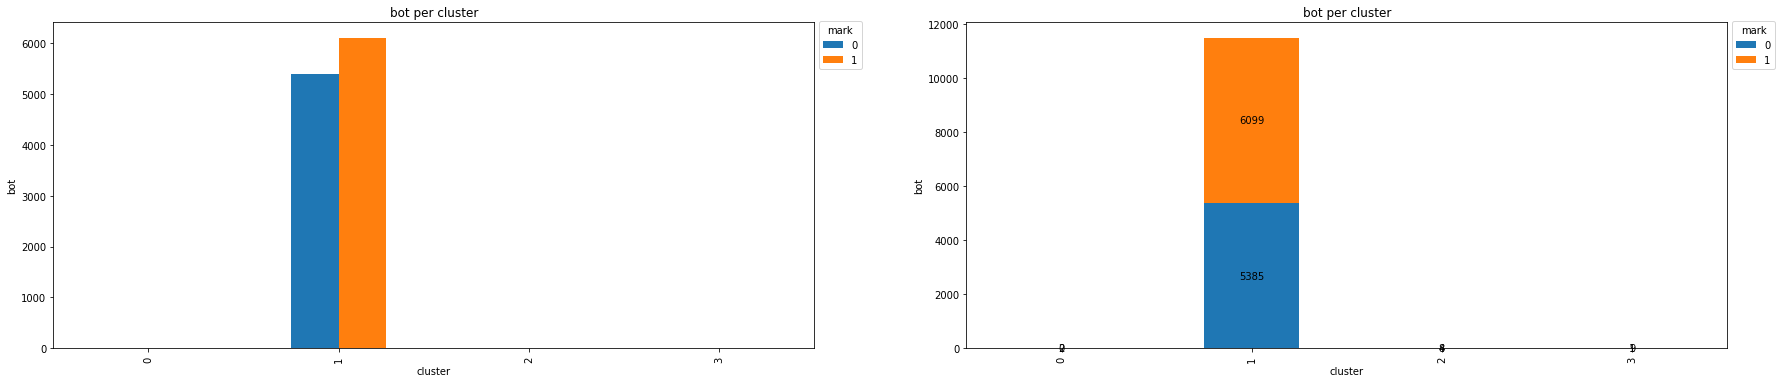

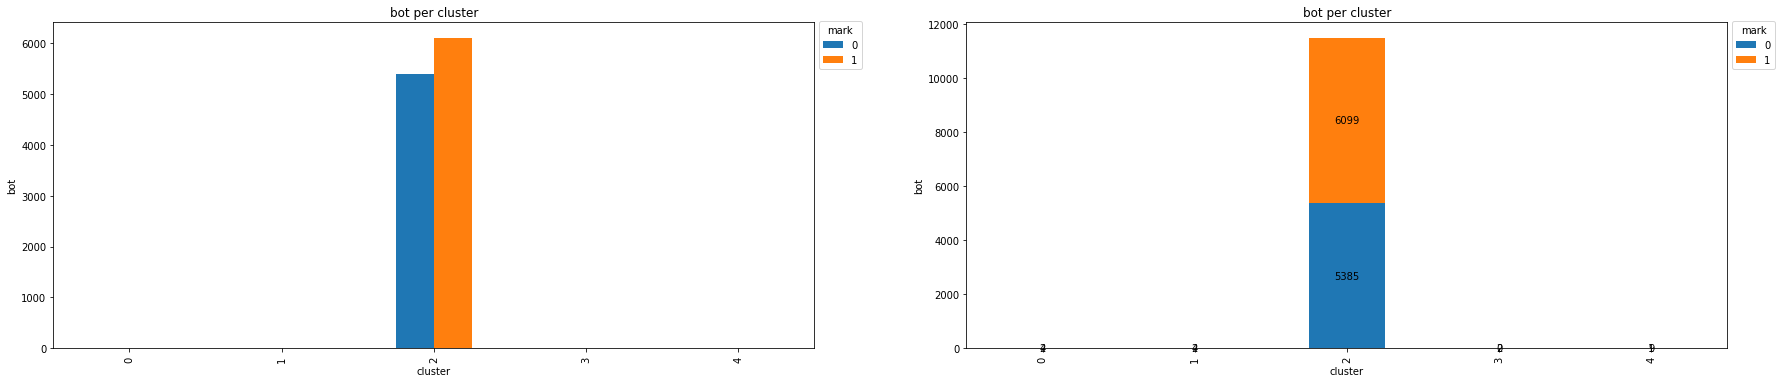

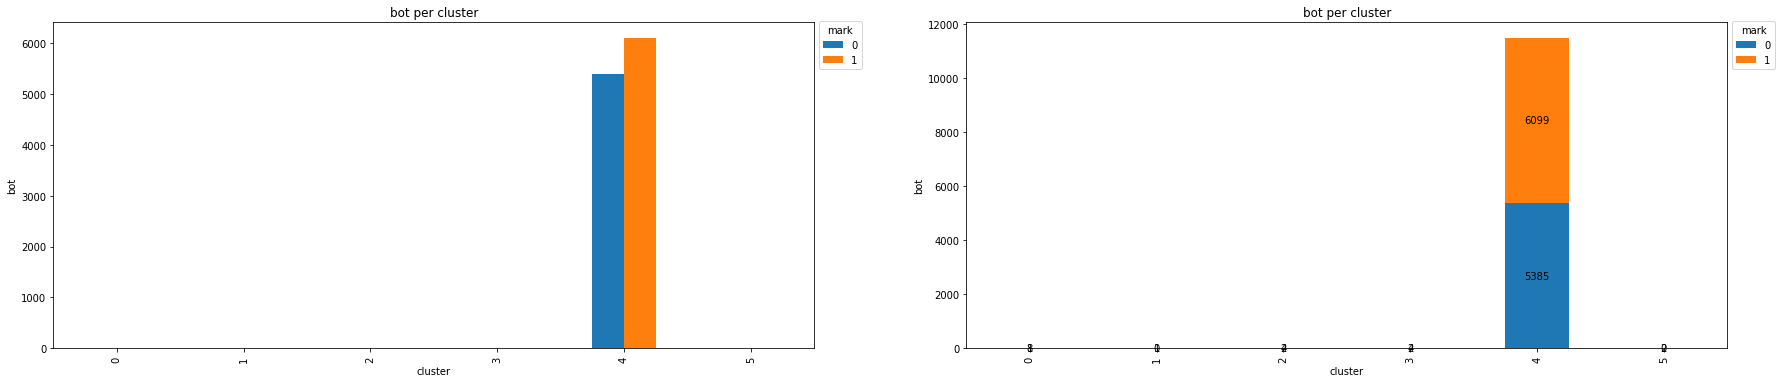

In [ ]:
for i in range(len(cluster_labels)):
  bot_ct = pd.crosstab(cluster_labels[i],users_profile_all['bot'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('bot')

  ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('bot')

  plt.show()

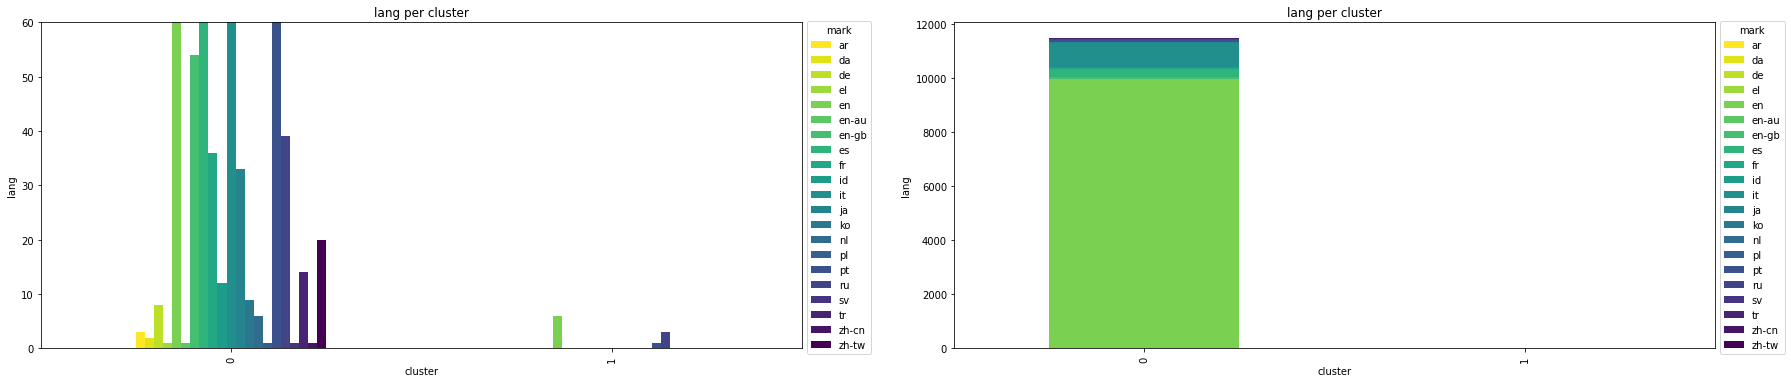

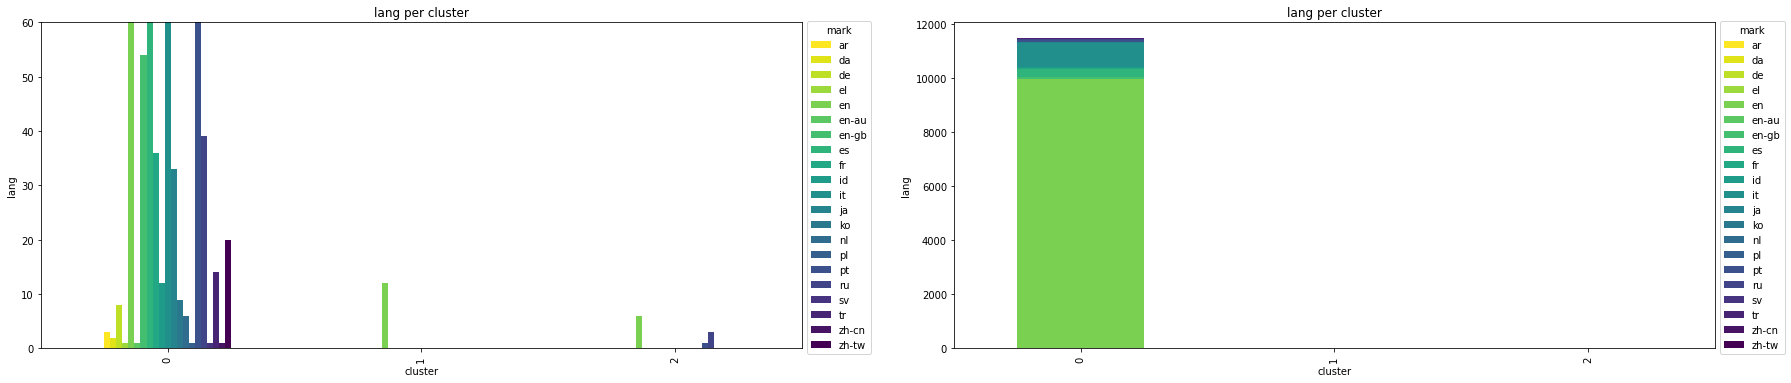

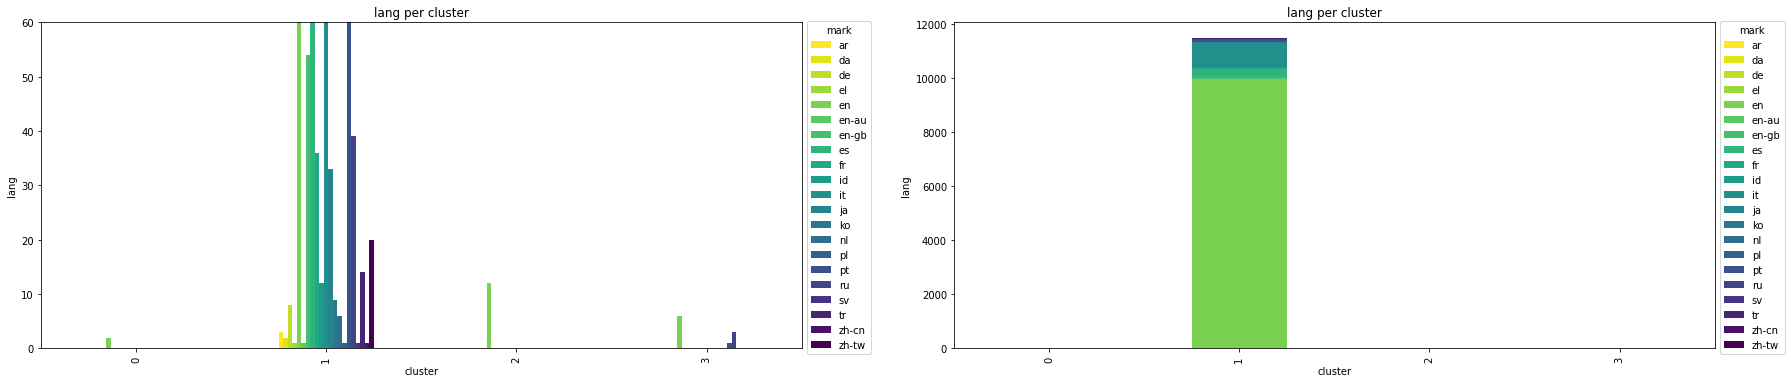

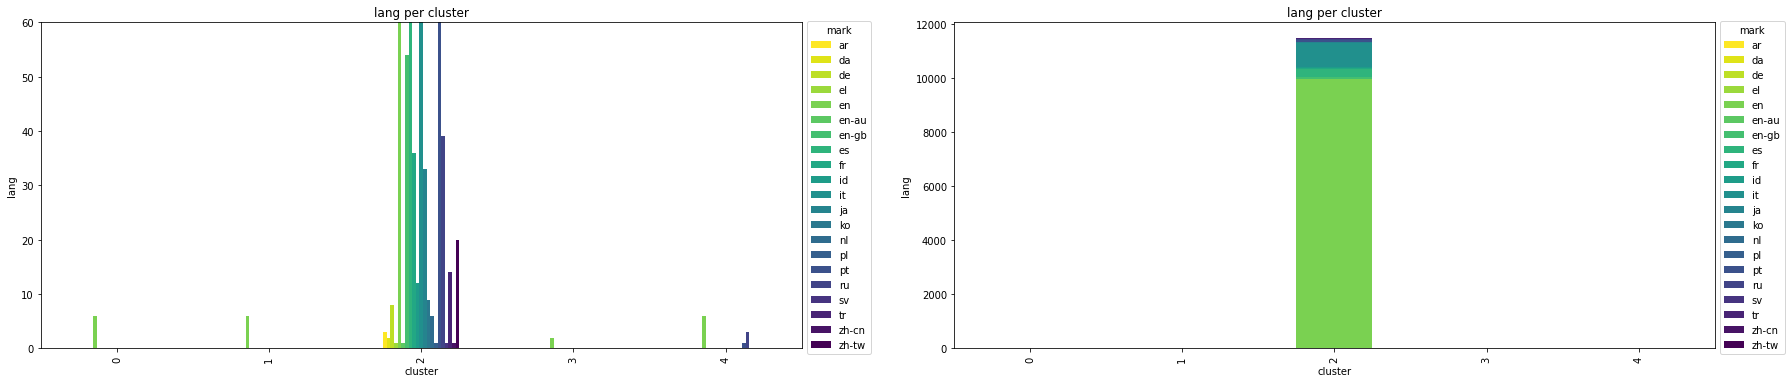

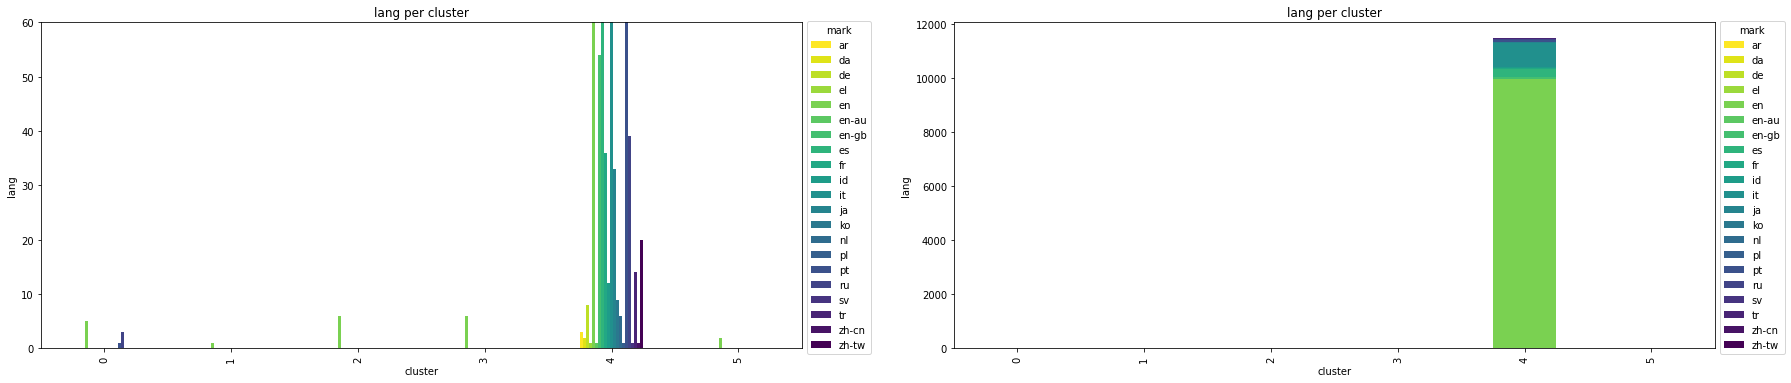

In [ ]:
for i in range(len(cluster_labels)):
  lang_ct = pd.crosstab(cluster_labels[i],users_profile_all['lang'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('lang')
  axs[0].set_ylim(0, 60) 

  ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('lang')

  plt.show()

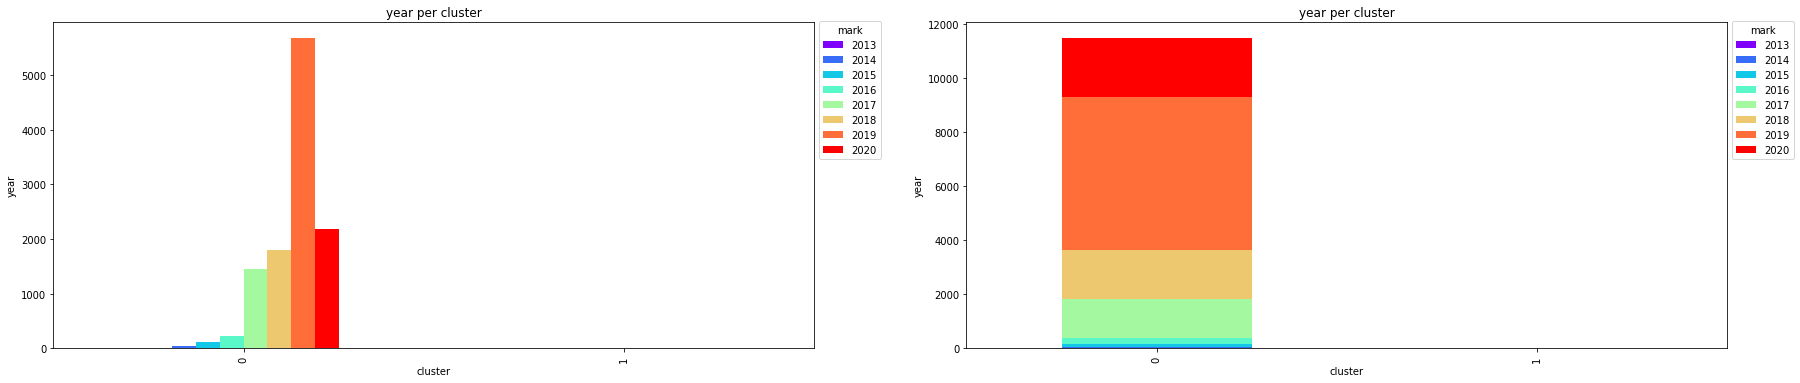

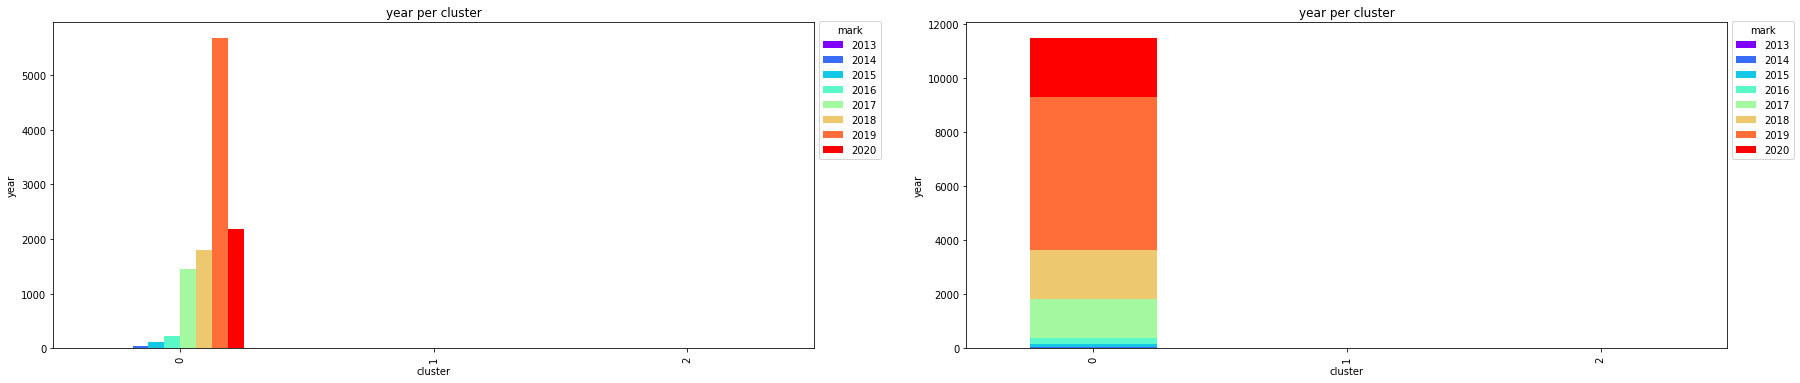

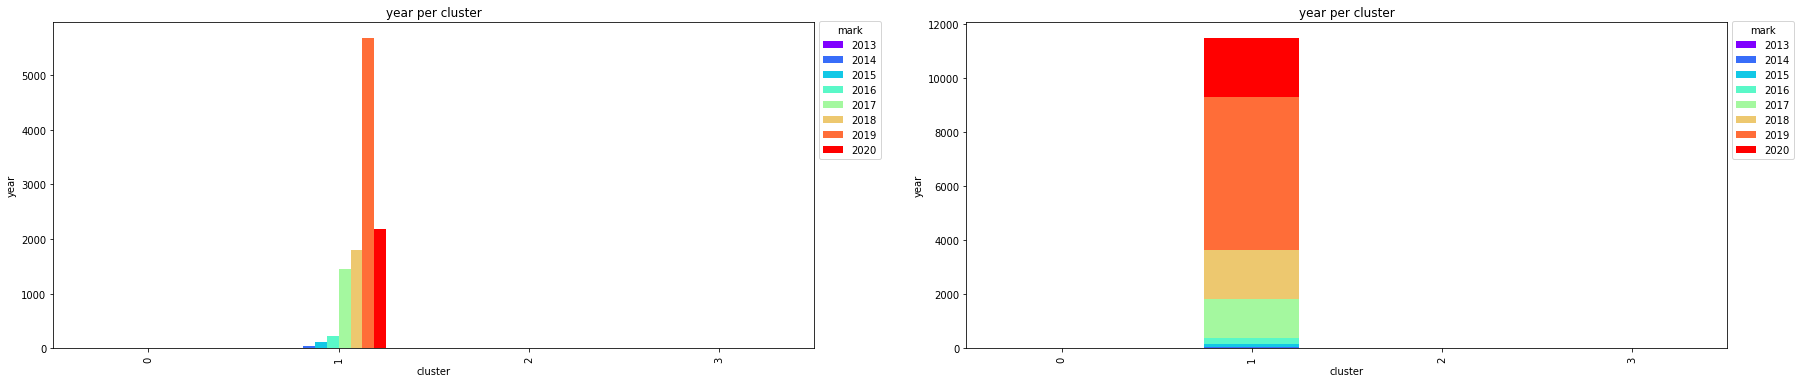

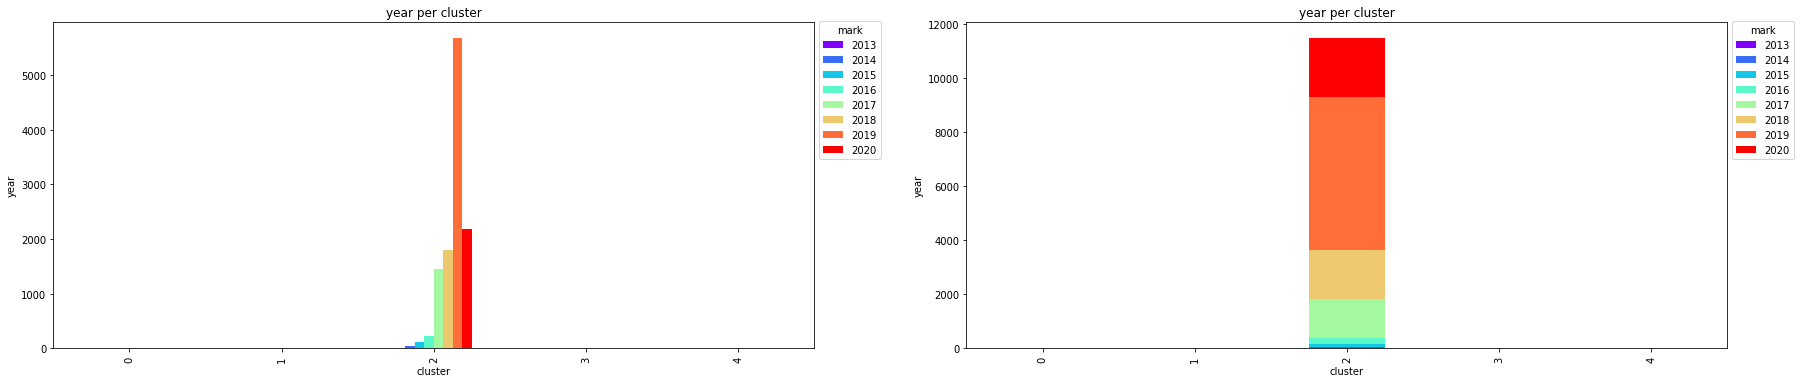

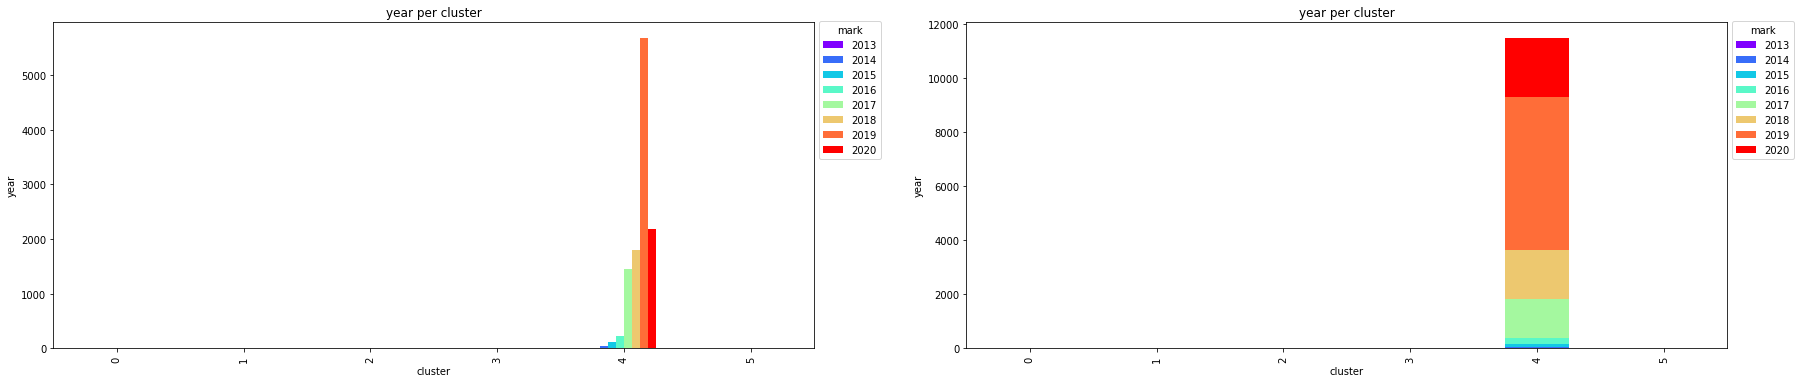

In [ ]:
for i in range(len(cluster_labels)):
  year_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_year'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('year')

  ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('year')

  plt.show()

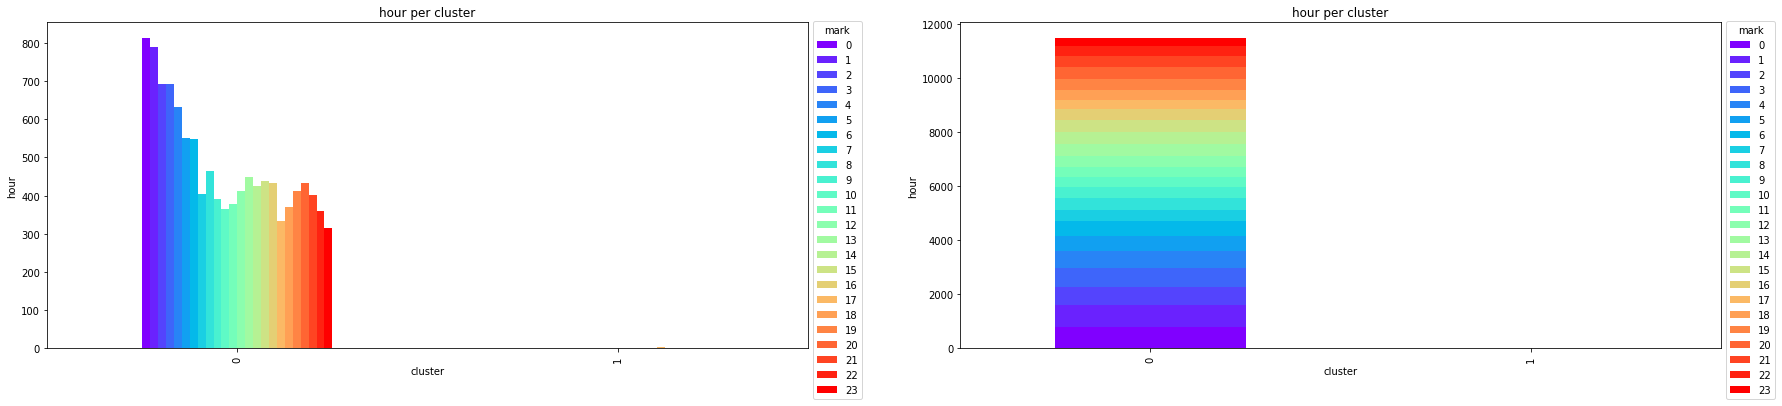

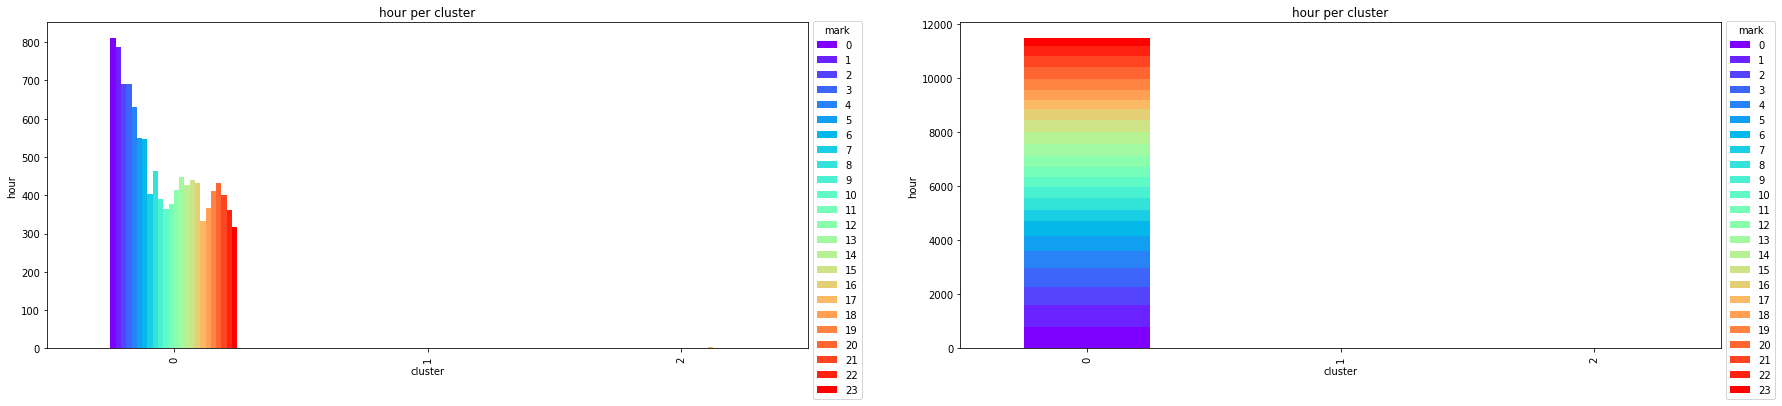

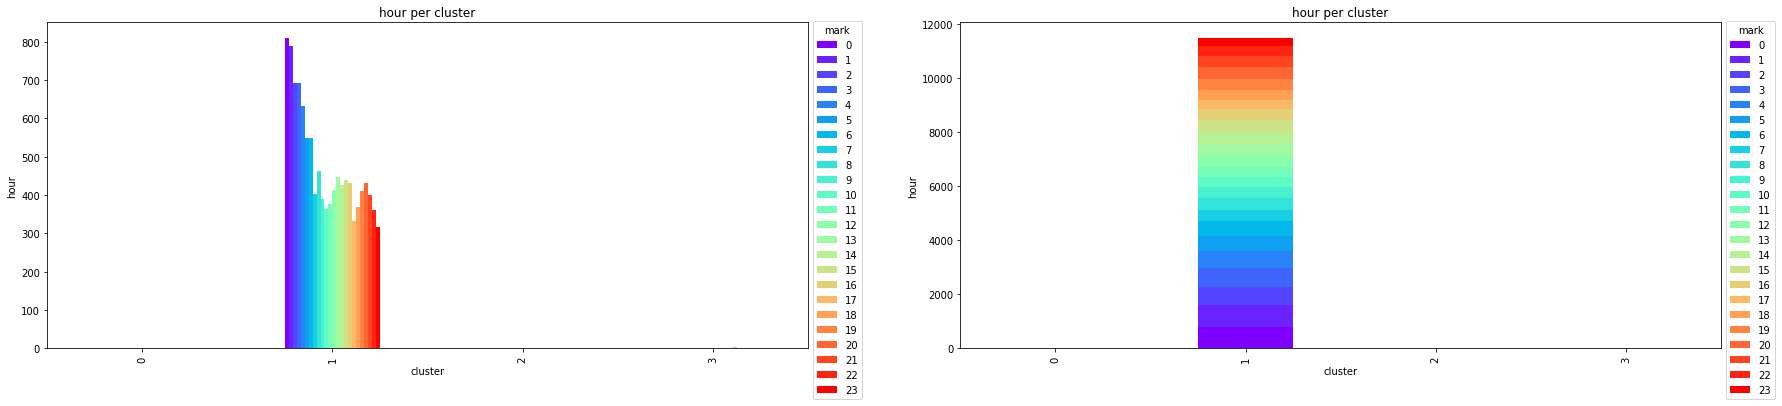

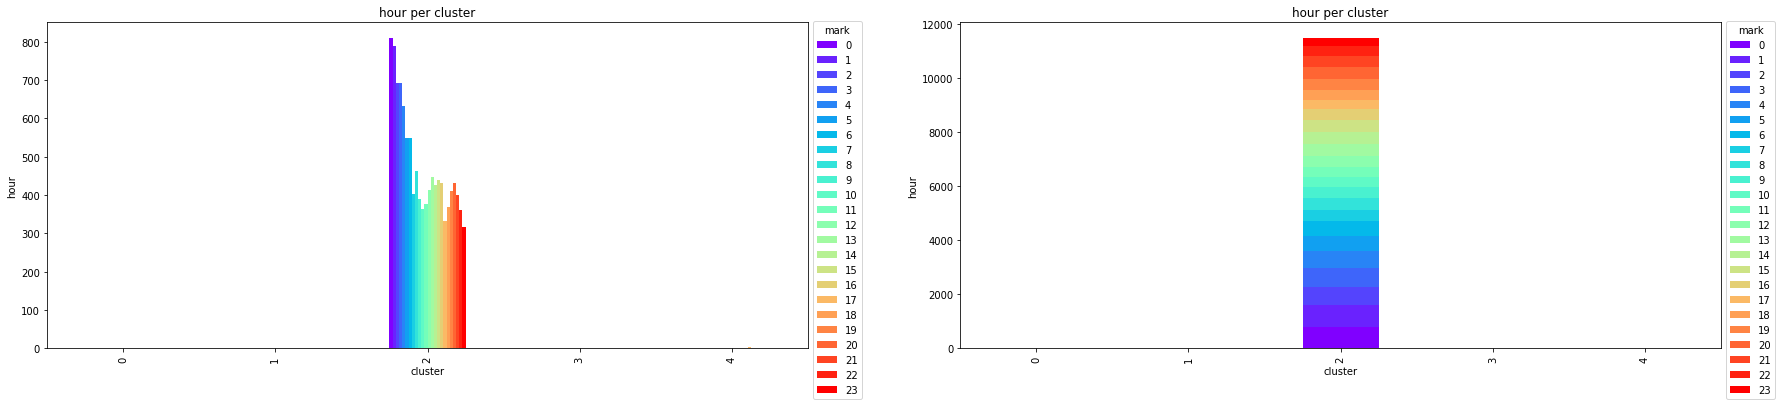

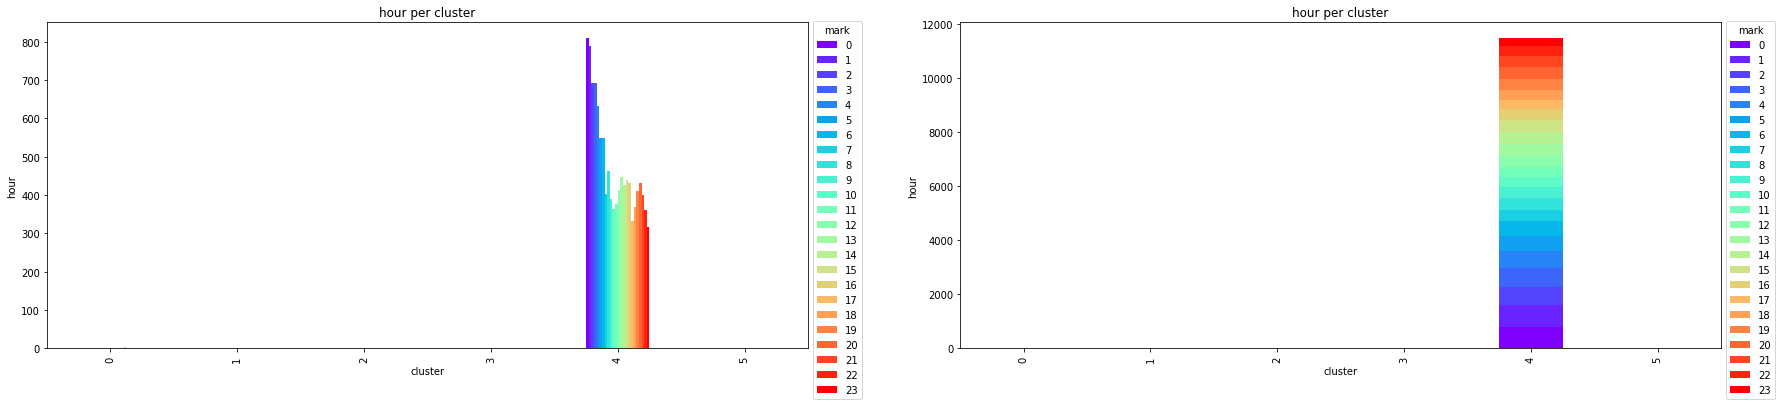

In [ ]:
for i in range(len(cluster_labels)):
  hour_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_hour'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('hour')

  ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('hour')

  plt.show()

## Clusters characterization with respect to numerical features

In [ ]:
cols = []
for i in range(len(cluster_labels)):
  s = 'label_K='+str(i+2)
  cols.append(s)

In [ ]:
for i in range(len(cluster_labels)):
  users_profile_all[cols[i]]=cluster_labels[i]

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness,label_K=2,label_K=3,label_K=4,label_K=5,label_K=6
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,6237.625,138813.625,0.0,1031.125,297.5,...,9.578214,10.607494,109.637321,3900,0.608718,0,0,1,2,4
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,6237.625,138813.625,0.0,969.000,297.5,...,0.000000,0.000000,85.026719,3893,0.519137,0,0,1,2,4
2,755116,呉⚛,en,0,2012-02-08 05:25:49,6237.625,92396.000,0.0,391.000,77.0,...,5.114369,6.387527,80.780317,3885,0.551866,0,0,1,2,4
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,6237.625,138813.625,0.0,209.000,297.5,...,0.000000,0.000000,84.281111,3884,0.519310,0,0,1,2,4
4,785080,W H,en,0,2012-02-23 01:08:16,6237.625,138486.000,0.0,1031.125,185.0,...,8.222893,9.556485,95.166473,3870,0.887855,0,0,1,2,4


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).mean()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,
0,1582.595854,35287.453057,252.937913,77.405157,61.967647,36792.176118,209.362063,1654.826096,13.895224,284.821949,0.659101,1.067106,70.222412,1820.046791,0.510161
1,32.800000,138813.625000,1031.125000,9.300000,2.800000,151504.800000,10000.000000,65635.959665,2607.287403,55831.022461,1.320406,0.000000,159.183072,2472.100000,0.006184


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,
0,1584.217319,35321.235787,253.196859,77.327224,61.946457,36829.430959,209.57557,1656.292796,13.908906,285.031834,0.630708,1.067818,70.229359,1820.060508,0.510673
1,30.583333,2951.750000,5.083333,152.000000,82.250000,1133.083333,5.00000,250.950281,0.799348,83.926738,27.835424,0.386100,63.573330,1806.916667,0.019627
2,32.800000,138813.625000,1031.125000,9.300000,2.800000,151504.800000,10000.00000,65635.959665,2607.287403,55831.022461,1.320406,0.000000,159.183072,2472.100000,0.006184


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,
0,293.500000,138813.625000,21.500000,23.500000,25.500000,450652.000000,13.500000,100565.996965,0.973184,32815.581978,1.160051,2.201794,76.657937,2029.500000,0.060355
1,1584.442104,35303.212034,253.237210,77.336599,61.952804,36757.361546,209.609718,1639.067142,13.911159,279.366465,0.630616,1.067620,70.228239,1820.024033,0.510752
2,30.583333,2951.750000,5.083333,152.000000,82.250000,1133.083333,5.000000,250.950281,0.799348,83.926738,27.835424,0.386100,63.573330,1806.916667,0.019627
3,32.800000,138813.625000,1031.125000,9.300000,2.800000,151504.800000,10000.000000,65635.959665,2607.287403,55831.022461,1.320406,0.000000,159.183072,2472.100000,0.006184


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,
0,22.833333,622.666667,0.166667,151.250000,82.000000,311.333333,0.166667,86.047988,0.031475,25.968359,37.044782,0.116975,67.532640,1769.166667,0.014940
1,38.333333,5280.833333,10.000000,152.750000,82.500000,1954.833333,9.833333,415.852574,1.567221,141.885117,18.626066,0.655225,59.614021,1844.666667,0.024314
2,1584.442104,35303.212034,253.237210,77.336599,61.952804,36757.361546,209.609718,1639.067142,13.911159,279.366465,0.630616,1.067620,70.228239,1820.024033,0.510752
3,293.500000,138813.625000,21.500000,23.500000,25.500000,450652.000000,13.500000,100565.996965,0.973184,32815.581978,1.160051,2.201794,76.657937,2029.500000,0.060355
4,32.800000,138813.625000,1031.125000,9.300000,2.800000,151504.800000,10000.000000,65635.959665,2607.287403,55831.022461,1.320406,0.000000,159.183072,2472.100000,0.006184


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,
0,33.222222,138813.625000,1031.125000,9.555556,2.777778,151505.888889,10000.000000,65205.466754,2483.397198,55343.450883,1.300451,0.000000,161.184895,2482.333333,0.006311
1,29.000000,138813.625000,1031.125000,7.000000,3.000000,151495.000000,10000.000000,69510.395858,3722.299247,60219.166667,1.500000,0.000000,141.166667,2380.000000,0.005042
2,22.833333,622.666667,0.166667,151.250000,82.000000,311.333333,0.166667,86.047988,0.031475,25.968359,37.044782,0.116975,67.532640,1769.166667,0.014940
3,38.333333,5280.833333,10.000000,152.750000,82.500000,1954.833333,9.833333,415.852574,1.567221,141.885117,18.626066,0.655225,59.614021,1844.666667,0.024314
4,1584.442104,35303.212034,253.237210,77.336599,61.952804,36757.361546,209.609718,1639.067142,13.911159,279.366465,0.630616,1.067620,70.228239,1820.024033,0.510752
5,293.500000,138813.625000,21.500000,23.500000,25.500000,450652.000000,13.500000,100565.996965,0.973184,32815.581978,1.160051,2.201794,76.657937,2029.500000,0.060355


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).std()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,
0,2485.204395,56987.019349,384.637983,108.582652,94.073514,97993.970757,1201.312872,5103.986272,97.214534,1298.919818,1.148129,1.70776,16.391382,552.307400,0.699682
1,3.938415,0.000000,0.000000,1.567021,0.918937,19.469634,0.000000,1473.829531,423.996614,6594.454218,0.106844,0.00000,14.195290,255.988476,0.001508


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,
0,2485.995682,57006.67781,384.755147,108.510632,94.046812,98038.341610,1201.922054,5106.421285,97.264361,1299.564418,0.667764,1.708392,16.395739,552.583613,0.699868
1,12.844938,7820.48506,13.747452,152.019287,120.207491,2356.951246,13.463756,554.938299,2.209164,218.323768,10.278849,0.650463,9.780604,118.087378,0.007461
2,3.938415,0.00000,0.000000,1.567021,0.918937,19.469634,0.000000,1473.829531,423.996614,6594.454218,0.106844,0.000000,14.195290,255.988476,0.001508


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,
0,362.745779,0.000000,24.748737,3.535534,31.819805,69788.610876,17.677670,7734.313707,0.937153,4713.706311,0.270540,3.113807,8.890465,1106.622113,0.043393
1,2486.151497,56995.276286,384.776431,108.517751,94.053303,97892.464382,1202.023922,4936.662949,97.272681,1225.920532,0.667781,1.708228,16.396737,552.528321,0.699903
2,12.844938,7820.485060,13.747452,152.019287,120.207491,2356.951246,13.463756,554.938299,2.209164,218.323768,10.278849,0.650463,9.780604,118.087378,0.007461
3,3.938415,0.000000,0.000000,1.567021,0.918937,19.469634,0.000000,1473.829531,423.996614,6594.454218,0.106844,0.000000,14.195290,255.988476,0.001508


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,
0,3.488075,1525.215613,0.408248,160.225076,126.261633,762.607807,0.408248,210.773663,0.077099,63.538941,4.660490,0.133023,9.134276,116.295170,0.001408
1,14.375906,10918.176485,18.910315,158.645123,125.886854,3165.320863,18.508557,753.535771,3.052187,304.572446,2.677836,0.859826,9.454880,117.189874,0.008230
2,2486.151497,56995.276286,384.776431,108.517751,94.053303,97892.464382,1202.023922,4936.662949,97.272681,1225.920532,0.667781,1.708228,16.396737,552.528321,0.699903
3,362.745779,0.000000,24.748737,3.535534,31.819805,69788.610876,17.677670,7734.313707,0.937153,4713.706311,0.270540,3.113807,8.890465,1106.622113,0.043393
4,3.938415,0.000000,0.000000,1.567021,0.918937,19.469634,0.000000,1473.829531,423.996614,6594.454218,0.106844,0.000000,14.195290,255.988476,0.001508


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,
0,3.929942,0.000000,0.000000,1.424001,0.971825,20.325135,0.000000,598.997938,171.962094,6800.607454,0.091449,0.000000,13.476367,269.338542,0.001542
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.488075,1525.215613,0.408248,160.225076,126.261633,762.607807,0.408248,210.773663,0.077099,63.538941,4.660490,0.133023,9.134276,116.295170,0.001408
3,14.375906,10918.176485,18.910315,158.645123,125.886854,3165.320863,18.508557,753.535771,3.052187,304.572446,2.677836,0.859826,9.454880,117.189874,0.008230
4,2486.151497,56995.276286,384.776431,108.517751,94.053303,97892.464382,1202.023922,4936.662949,97.272681,1225.920532,0.667781,1.708228,16.396737,552.528321,0.699903
5,362.745779,0.000000,24.748737,3.535534,31.819805,69788.610876,17.677670,7734.313707,0.937153,4713.706311,0.270540,3.113807,8.890465,1106.622113,0.043393


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).max()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,106034.982635,2418.401650,36148.675676,41.833333,6.369161,245.0,3900,4.148438
1,41.000,138813.625,1031.125,12.0,5.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,1.500000,0.000000,189.0,2868,0.008707


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,106034.982635,2418.401650,36148.675676,10.440860,6.369161,245.000000,3900,4.148438
1,57.000,27275.000,48.000,297.5,245.0,7322.0,47.0,1865.658108,7.720823,759.027778,41.833333,2.118078,78.657143,1921,0.034375
2,41.000,138813.625,1031.125,12.0,5.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,1.500000,0.000000,189.000000,2868,0.008707


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,
0,550.000,138813.625,39.000,26.0,48.0,500000.0,26.0,106034.982635,1.635852,36148.675676,1.351351,4.403588,82.944444,2812,0.091038
1,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,63204.336440,2418.401650,26717.125571,10.440860,6.369161,245.000000,3900,4.148438
2,57.000,27275.000,48.000,297.5,245.0,7322.0,47.0,1865.658108,7.720823,759.027778,41.833333,2.118078,78.657143,1921,0.034375
3,41.000,138813.625,1031.125,12.0,5.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,1.500000,0.000000,189.000000,2868,0.008707


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,
0,29.000,3736.000,1.000,297.5,245.0,1868.0,1.0,516.287926,0.188853,155.666667,41.833333,0.297472,77.045455,1919,0.017718
1,57.000,27275.000,48.000,297.5,245.0,7322.0,47.0,1865.658108,7.720823,759.027778,22.021739,2.118078,78.657143,1921,0.034375
2,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,63204.336440,2418.401650,26717.125571,10.440860,6.369161,245.000000,3900,4.148438
3,550.000,138813.625,39.000,26.0,48.0,500000.0,26.0,106034.982635,1.635852,36148.675676,1.351351,4.403588,82.944444,2812,0.091038
4,41.000,138813.625,1031.125,12.0,5.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,1.500000,0.000000,189.000000,2868,0.008707


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,
0,41.000,138813.625,1031.125,12.0,5.0,151542.0,10000.0,66318.851049,2662.436156,69042.400000,1.384615,0.000000,189.000000,2868,0.008707
1,29.000,138813.625,1031.125,7.0,3.0,151495.0,10000.0,69510.395858,3722.299247,60219.166667,1.500000,0.000000,141.166667,2380,0.005042
2,29.000,3736.000,1.000,297.5,245.0,1868.0,1.0,516.287926,0.188853,155.666667,41.833333,0.297472,77.045455,1919,0.017718
3,57.000,27275.000,48.000,297.5,245.0,7322.0,47.0,1865.658108,7.720823,759.027778,22.021739,2.118078,78.657143,1921,0.034375
4,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,63204.336440,2418.401650,26717.125571,10.440860,6.369161,245.000000,3900,4.148438
5,550.000,138813.625,39.000,26.0,48.0,500000.0,26.0,106034.982635,1.635852,36148.675676,1.351351,4.403588,82.944444,2812,0.091038


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).min()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,
0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,28.0,138813.625,1031.125,7.0,2.0,151492.0,10000.0,64439.14092,2177.851049,48132.352941,1.117647,0.0,141.166667,2100,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,
0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,16.0,0.000,0.000,2.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,15.409091,0.0,53.272727,1686,0.010676
2,28.0,138813.625,1031.125,7.0,2.0,151492.0,10000.0,64439.14092,2177.851049,48132.352941,1.117647,0.0,141.166667,2100,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,
0,37.0,138813.625,4.000,21.0,3.0,401304.0,1.0,95097.011295,0.310517,29482.488281,0.968750,0.0,70.371429,1247,0.029671
1,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
2,16.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,15.409091,0.0,53.272727,1686,0.010676
3,28.0,138813.625,1031.125,7.0,2.0,151492.0,10000.0,64439.140920,2177.851049,48132.352941,1.117647,0.0,141.166667,2100,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,
0,20.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,29.676471,0.0,55.260870,1686,0.014070
1,16.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,15.409091,0.0,53.272727,1686,0.010676
2,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
3,37.0,138813.625,4.000,21.0,3.0,401304.0,1.0,95097.011295,0.310517,29482.488281,0.968750,0.0,70.371429,1247,0.029671
4,28.0,138813.625,1031.125,7.0,2.0,151492.0,10000.0,64439.140920,2177.851049,48132.352941,1.117647,0.0,141.166667,2100,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,
0,28.0,138813.625,1031.125,8.0,2.0,151492.0,10000.0,64439.140920,2177.851049,48132.352941,1.117647,0.0,147.071429,2100,0.004533
1,29.0,138813.625,1031.125,7.0,3.0,151495.0,10000.0,69510.395858,3722.299247,60219.166667,1.500000,0.0,141.166667,2380,0.005042
2,20.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,29.676471,0.0,55.260870,1686,0.014070
3,16.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,15.409091,0.0,53.272727,1686,0.010676
4,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
5,37.0,138813.625,4.000,21.0,3.0,401304.0,1.0,95097.011295,0.310517,29482.488281,0.968750,0.0,70.371429,1247,0.029671


# kmedoids

In [ ]:
input_data = list(X)

# Initialize initial medoids using K-Means++ algorithm
# Create instance of K-Medoids (PAM) algorithm.
# Run cluster analysis and obtain results.

initial_medoids2 = kmeans_plusplus_initializer(input_data, 2).initialize(return_index=True)
kmedoids_instance2 = kmedoids(input_data, initial_medoids2)
kmedoids_instance2.process()
clusters2 = kmedoids_instance2.get_clusters()
medoids2 = kmedoids_instance2.get_medoids()

initial_medoids3 = kmeans_plusplus_initializer(input_data, 3).initialize(return_index=True)
kmedoids_instance3 = kmedoids(input_data, initial_medoids3)
kmedoids_instance3.process()
clusters3 = kmedoids_instance3.get_clusters()
medoids3 = kmedoids_instance3.get_medoids()

initial_medoids4 = kmeans_plusplus_initializer(input_data, 4).initialize(return_index=True)
kmedoids_instance4 = kmedoids(input_data, initial_medoids4)
kmedoids_instance4.process()
clusters4 = kmedoids_instance4.get_clusters()
medoids4 = kmedoids_instance4.get_medoids()

initial_medoids5 = kmeans_plusplus_initializer(input_data, 5).initialize(return_index=True)
kmedoids_instance5 = kmedoids(input_data, initial_medoids5)
kmedoids_instance5.process()
clusters5 = kmedoids_instance5.get_clusters()
medoids5 = kmedoids_instance5.get_medoids()

initial_medoids6 = kmeans_plusplus_initializer(input_data, 6).initialize(return_index=True)
kmedoids_instance6 = kmedoids(input_data, initial_medoids6)
kmedoids_instance6.process()
clusters6 = kmedoids_instance6.get_clusters()
medoids6 = kmedoids_instance6.get_medoids()

In [ ]:
#medoids2

In [ ]:
# Prepare cluster labels
cluster_labels = []

cluster_labels2 = np.zeros([11508], dtype=int)    # 0,1
for x in np.nditer(np.asarray(clusters2[1])):
   cluster_labels2[x] = 1
cluster_labels.append(cluster_labels2)

cluster_labels3 = np.zeros([11508], dtype=int)    # 0,1,2
for x in np.nditer(np.asarray(clusters3[1])):
   cluster_labels3[x] = 1
for x in np.nditer(np.asarray(clusters3[2])):
   cluster_labels3[x] = 2
cluster_labels.append(cluster_labels3)

cluster_labels4 = np.zeros([11508], dtype=int)    # 0,1,2,3
for x in np.nditer(np.asarray(clusters4[1])):
   cluster_labels4[x] = 1
for x in np.nditer(np.asarray(clusters4[2])):
   cluster_labels4[x] = 2
for x in np.nditer(np.asarray(clusters4[3])):
   cluster_labels4[x] = 3
cluster_labels.append(cluster_labels4)

cluster_labels5 = np.zeros([11508], dtype=int)    # 0,1,2,3,4
for x in np.nditer(np.asarray(clusters5[1])):
   cluster_labels5[x] = 1
for x in np.nditer(np.asarray(clusters5[2])):
   cluster_labels5[x] = 2
for x in np.nditer(np.asarray(clusters5[3])):
   cluster_labels5[x] = 3
for x in np.nditer(np.asarray(clusters5[4])):
   cluster_labels5[x] = 4
cluster_labels.append(cluster_labels5)

cluster_labels6 = np.zeros([11508], dtype=int)    # 0,1,2,3,4,5
for x in np.nditer(np.asarray(clusters6[1])):
   cluster_labels6[x] = 1
for x in np.nditer(np.asarray(clusters6[2])):
   cluster_labels6[x] = 2
for x in np.nditer(np.asarray(clusters6[3])):
   cluster_labels6[x] = 3
for x in np.nditer(np.asarray(clusters6[4])):
   cluster_labels6[x] = 4
for x in np.nditer(np.asarray(clusters6[5])):
   cluster_labels6[x] = 5
cluster_labels.append(cluster_labels6)



In [ ]:
# Display clustering results.    (cause full ram due to the number of features)
#visualizer = cluster_visualizer_multidim()
#visualizer.append_clusters(clusters, input_data)
#visualizer.append_cluster(initial_medoids2, input_data, markersize=12, marker='*', color='gray')
#visualizer.append_cluster(medoids2, input_data, markersize=14, marker='*', color='black')
#visualizer.show()

## Clusters characterization with respect to categorical features

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_noout.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,6237.625,138813.625,0.0,1031.125,297.5,...,0.0,8.831943,6.080426,0.0,9.183814,9.578214,10.607494,109.637321,3900,0.608718
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,6237.625,138813.625,0.0,969.000,297.5,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,85.026719,3893,0.519137
2,755116,呉⚛,en,0,2012-02-08 05:25:49,6237.625,92396.000,0.0,391.000,77.0,...,0.0,3.921117,2.375534,0.0,4.836434,5.114369,6.387527,80.780317,3885,0.551866
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,6237.625,138813.625,0.0,209.000,297.5,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.281111,3884,0.519310
4,785080,W H,en,0,2012-02-23 01:08:16,6237.625,138486.000,0.0,1031.125,185.0,...,0.0,8.277790,2.354578,0.0,8.421512,8.222893,9.556485,95.166473,3870,0.887855


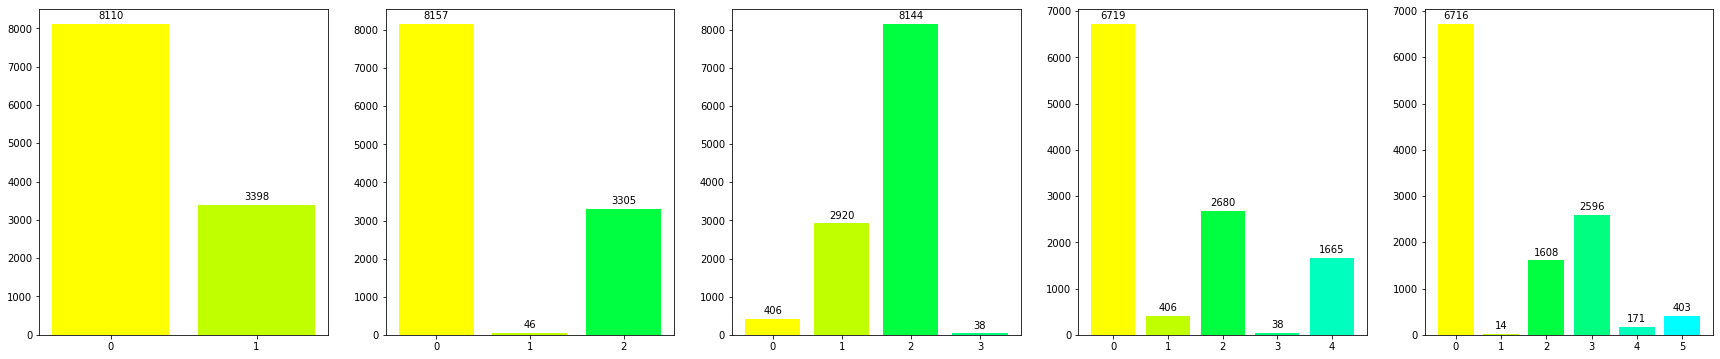

In [ ]:
fig, ax = plt.subplots(ncols=len(cluster_labels), figsize=(30,6))
for i in range(len(cluster_labels)):
  hist, bins = np.histogram(cluster_labels[i], bins=range(0, len(set(cluster_labels[i])) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

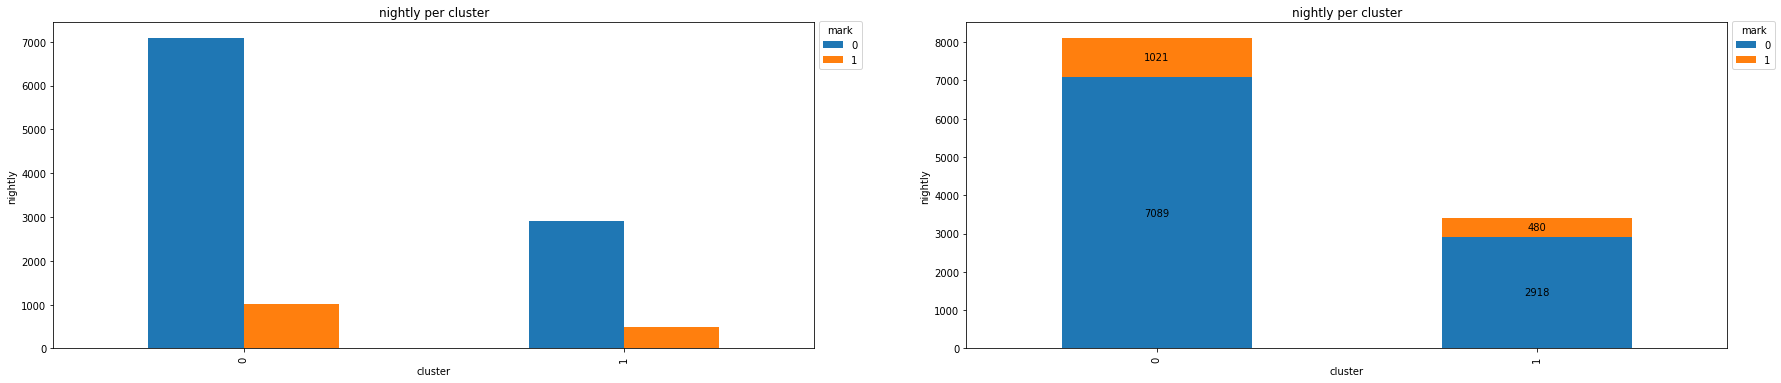

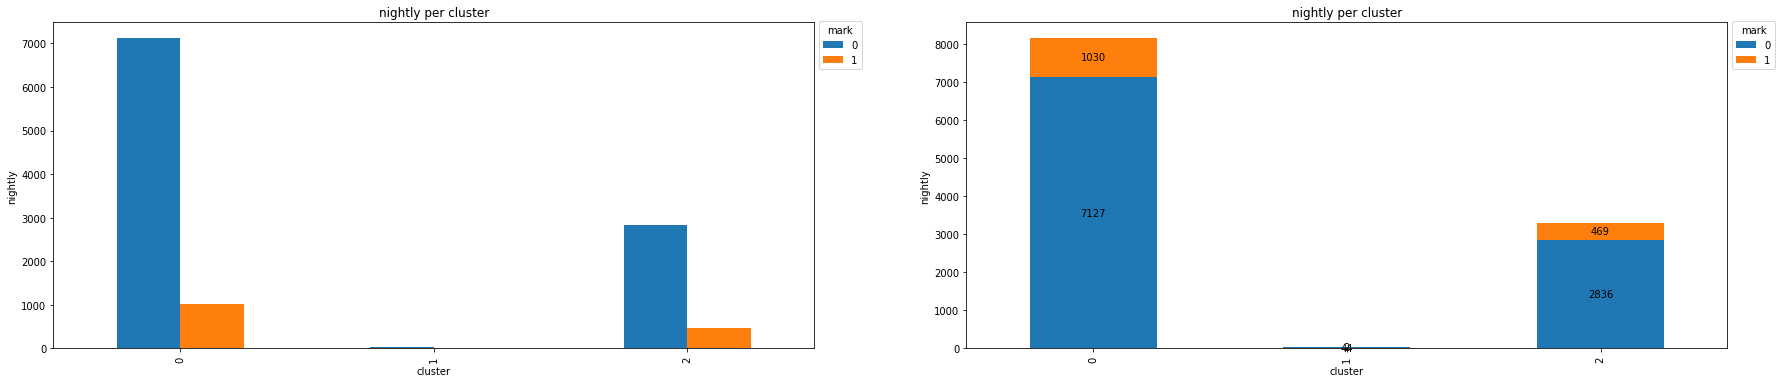

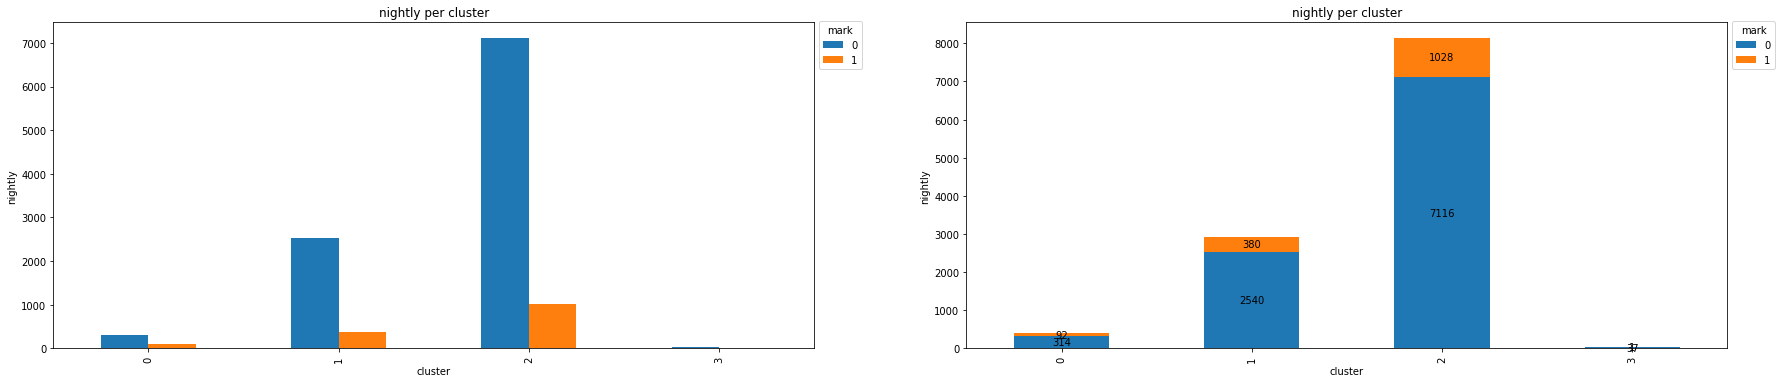

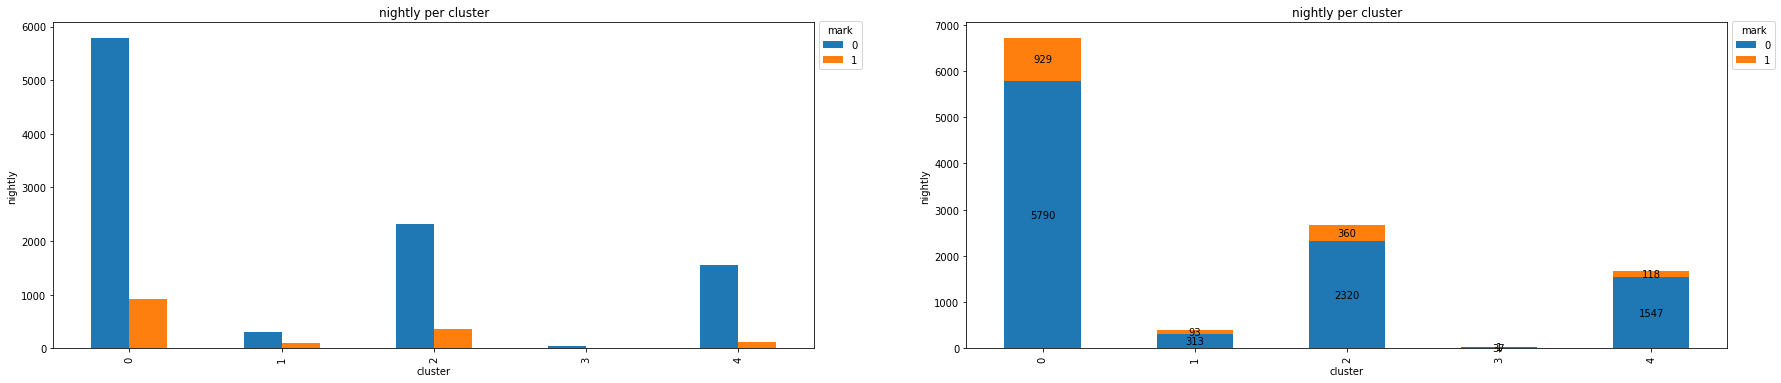

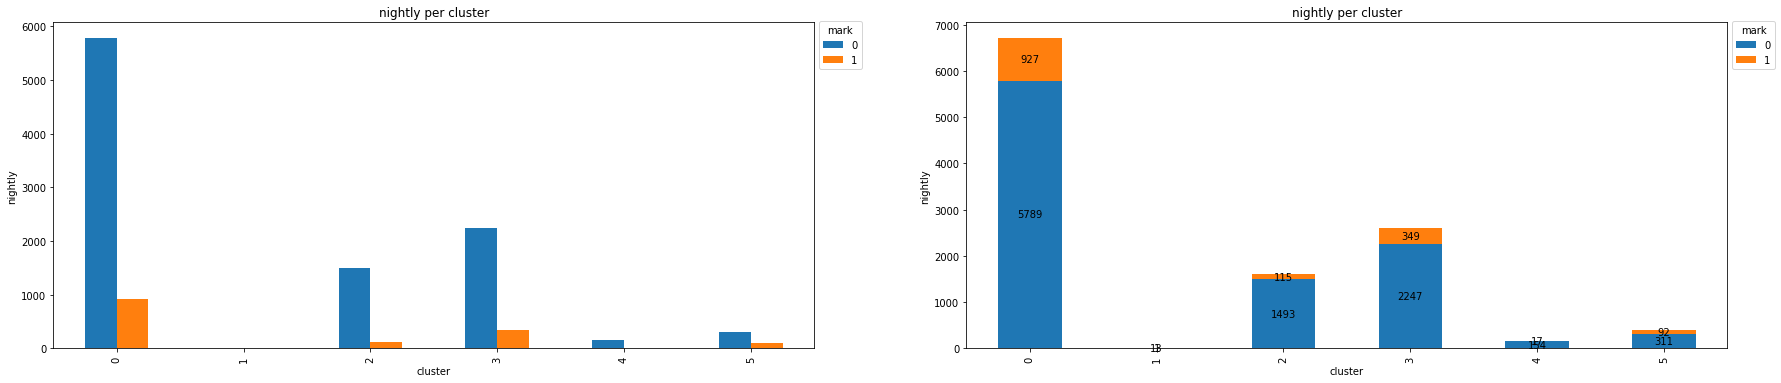

In [ ]:
for i in range(len(cluster_labels)):
  nightly_ct = pd.crosstab(cluster_labels[i],users_profile_all['nightly'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('nightly')

  ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('nightly')

  plt.show()

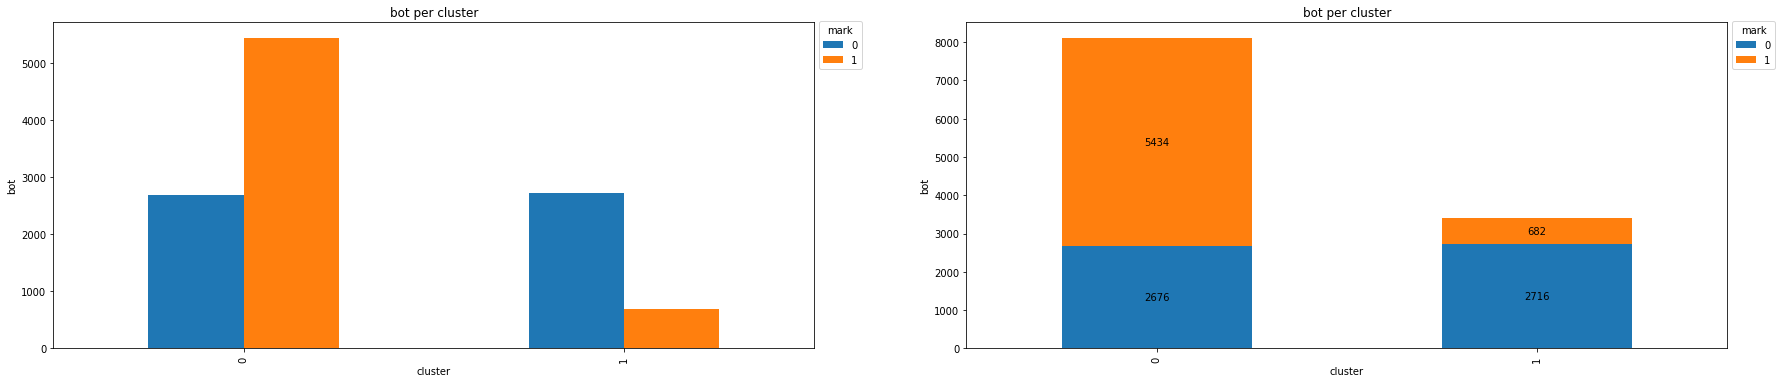

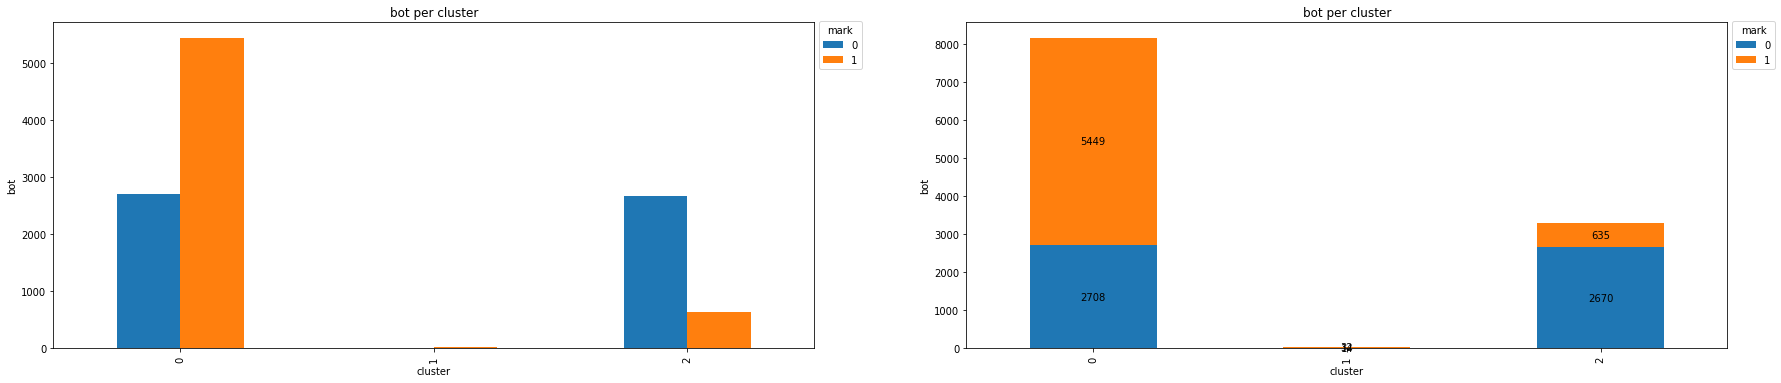

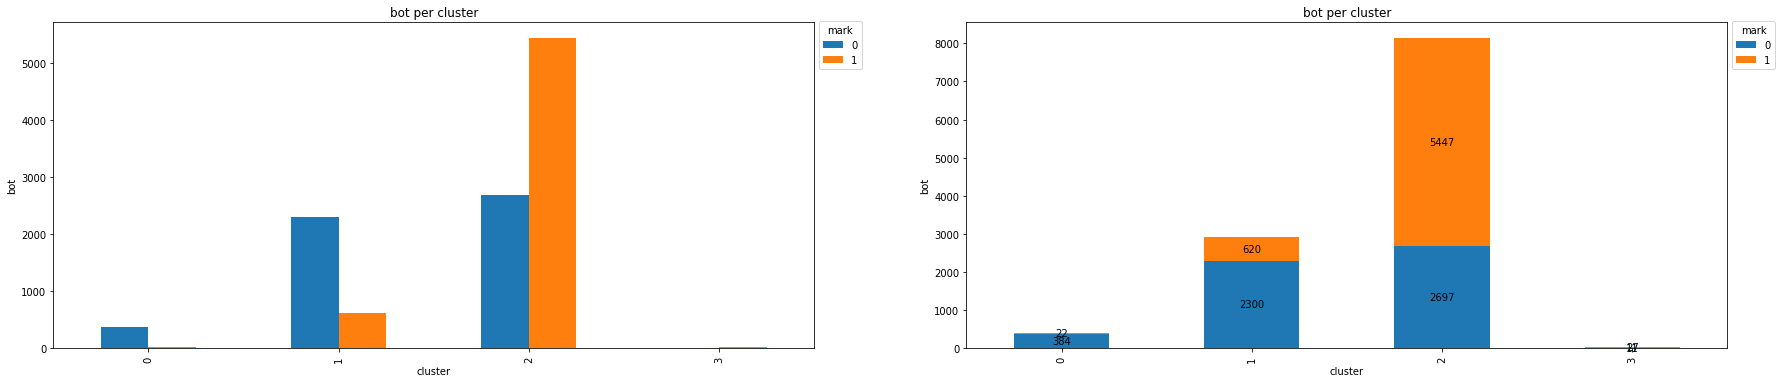

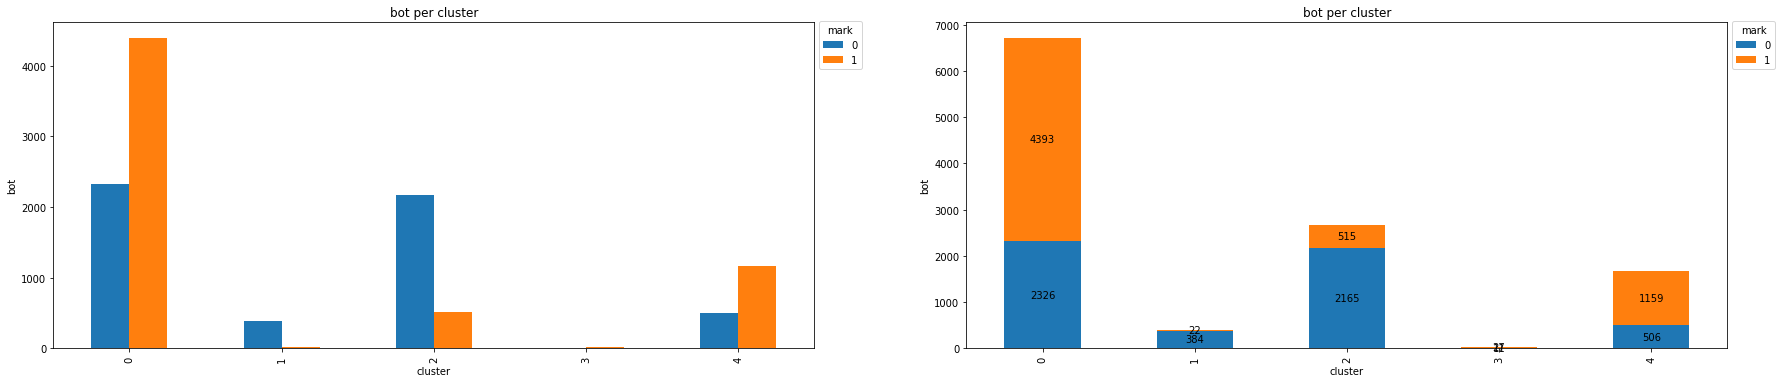

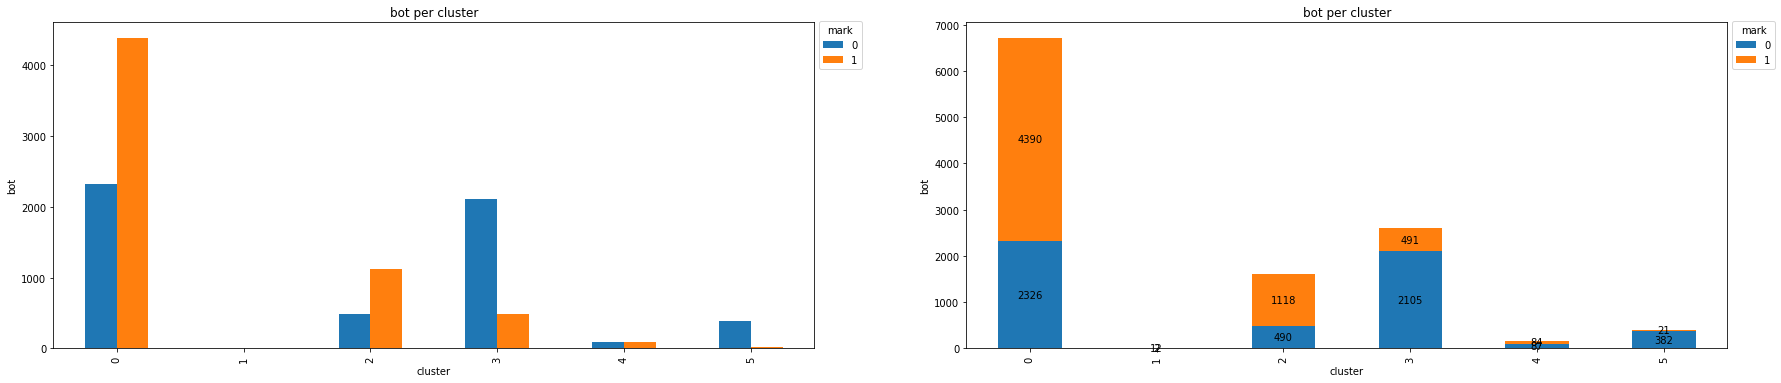

In [ ]:
for i in range(len(cluster_labels)):
  bot_ct = pd.crosstab(cluster_labels[i],users_profile_all['bot'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('bot')

  ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('bot')

  plt.show()

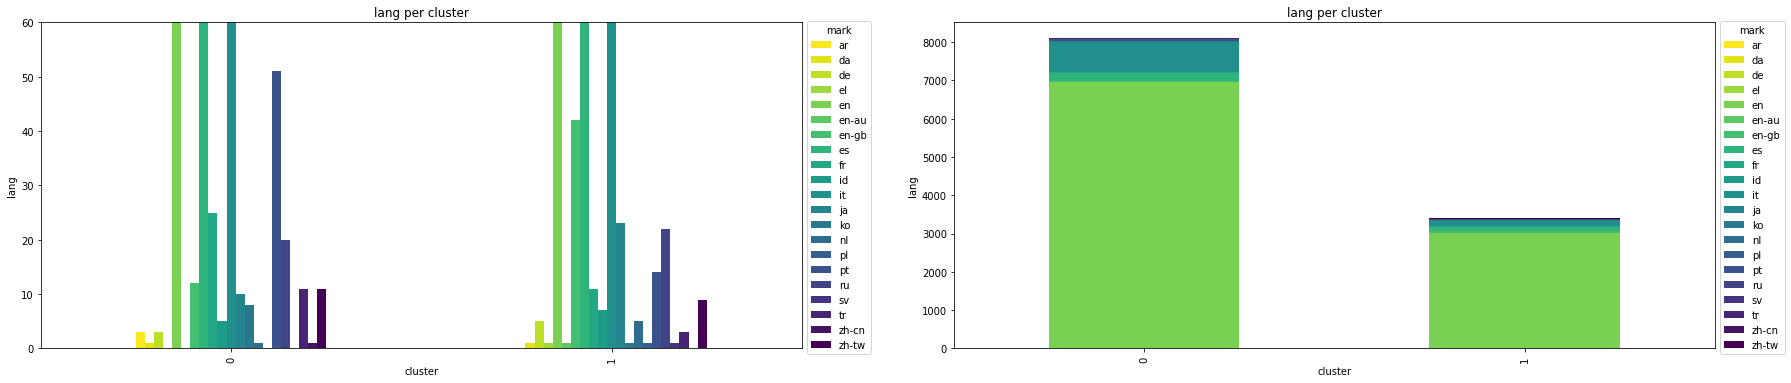

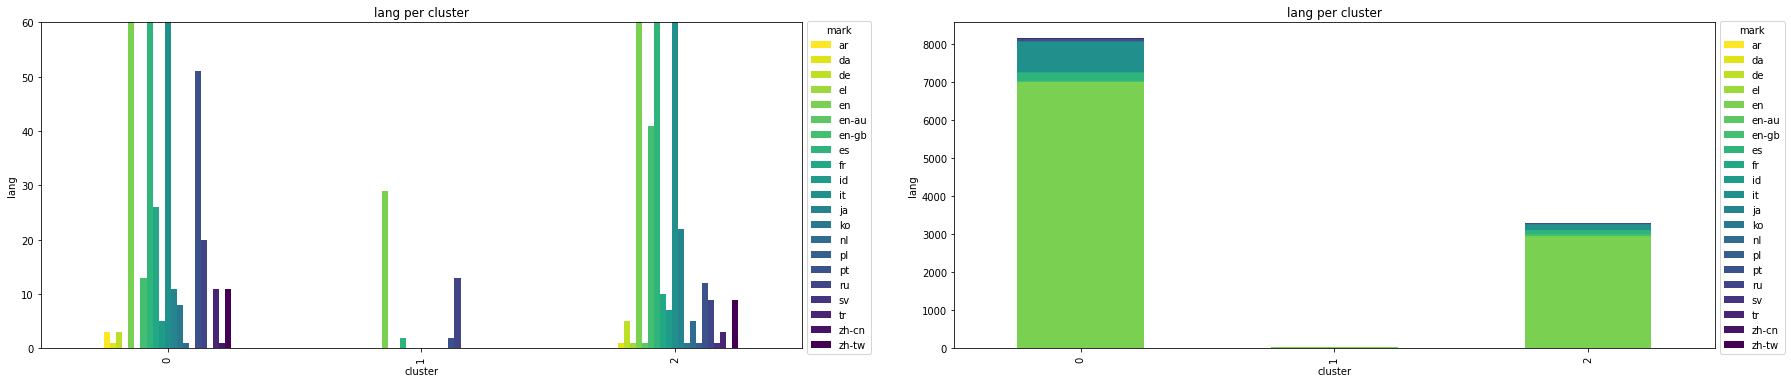

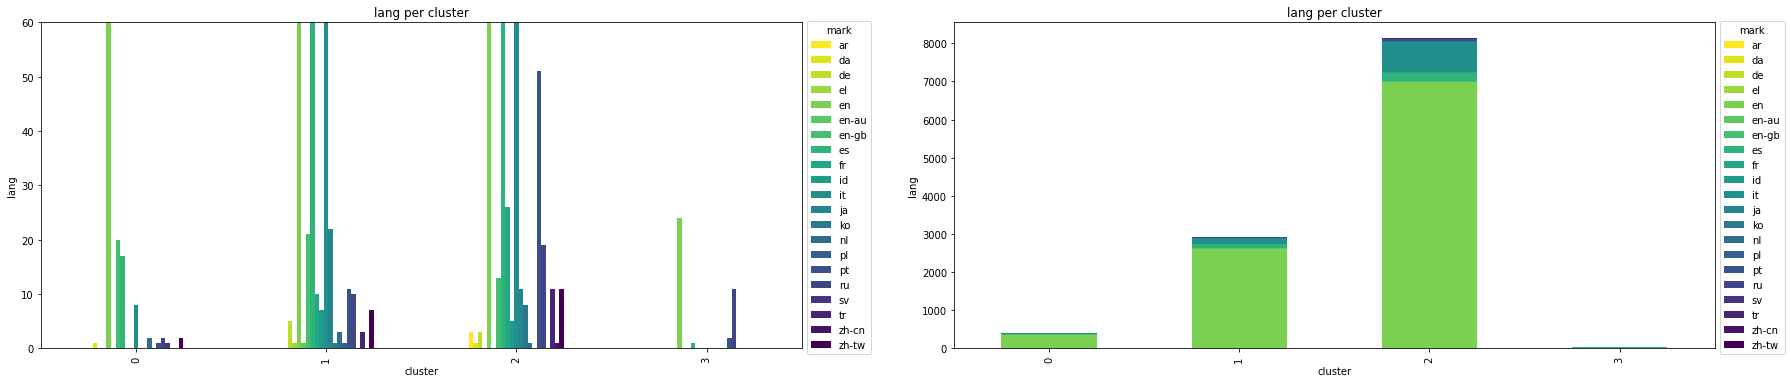

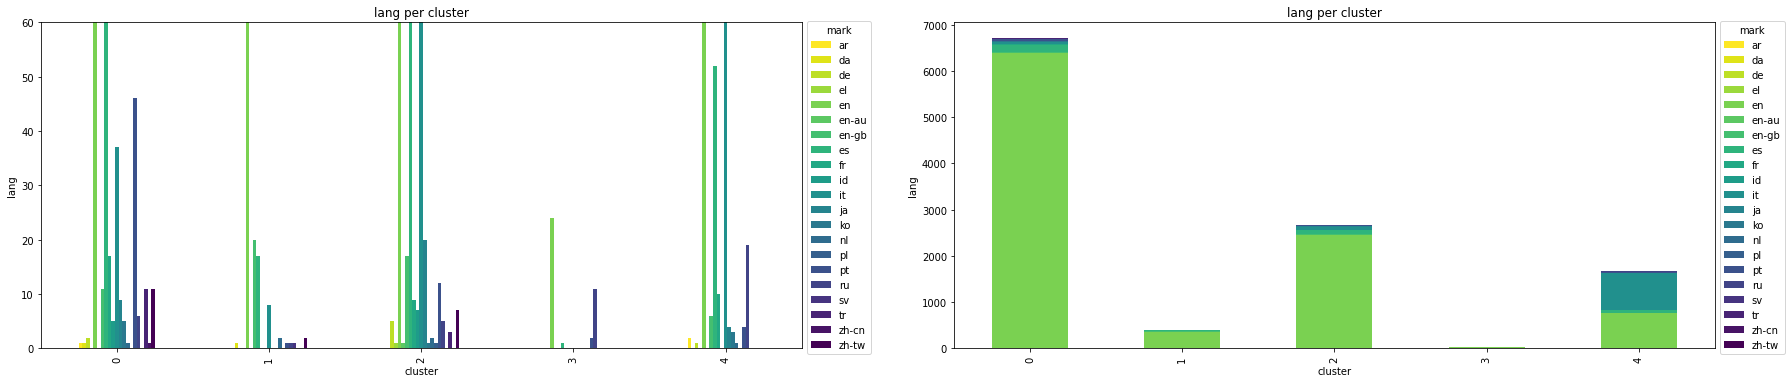

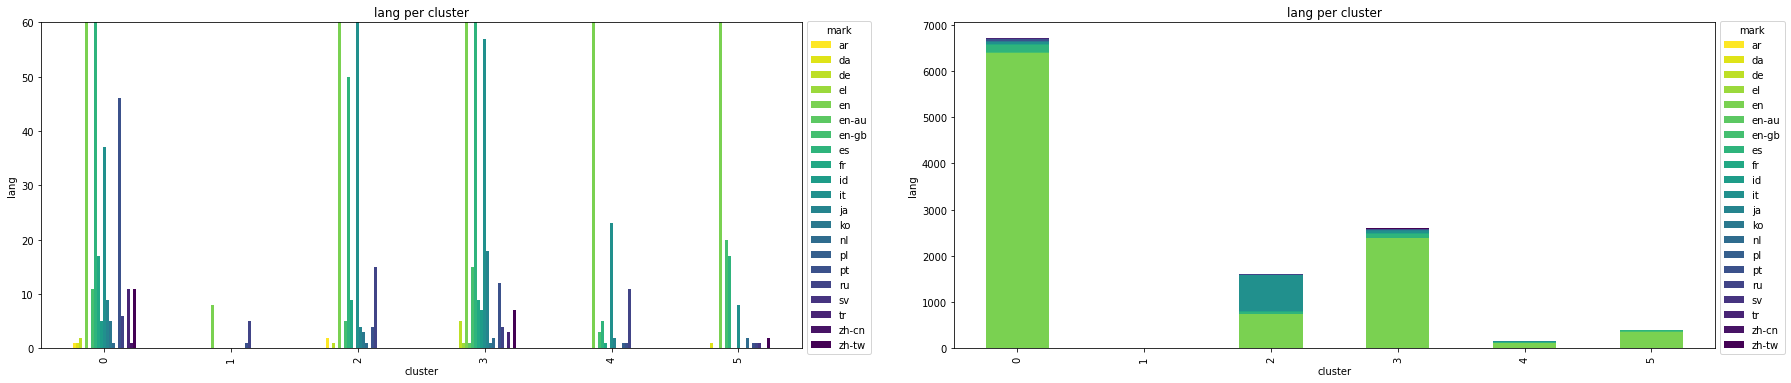

In [ ]:
for i in range(len(cluster_labels)):
  lang_ct = pd.crosstab(cluster_labels[i],users_profile_all['lang'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('lang')
  axs[0].set_ylim(0, 60) 

  ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('lang')

  plt.show()

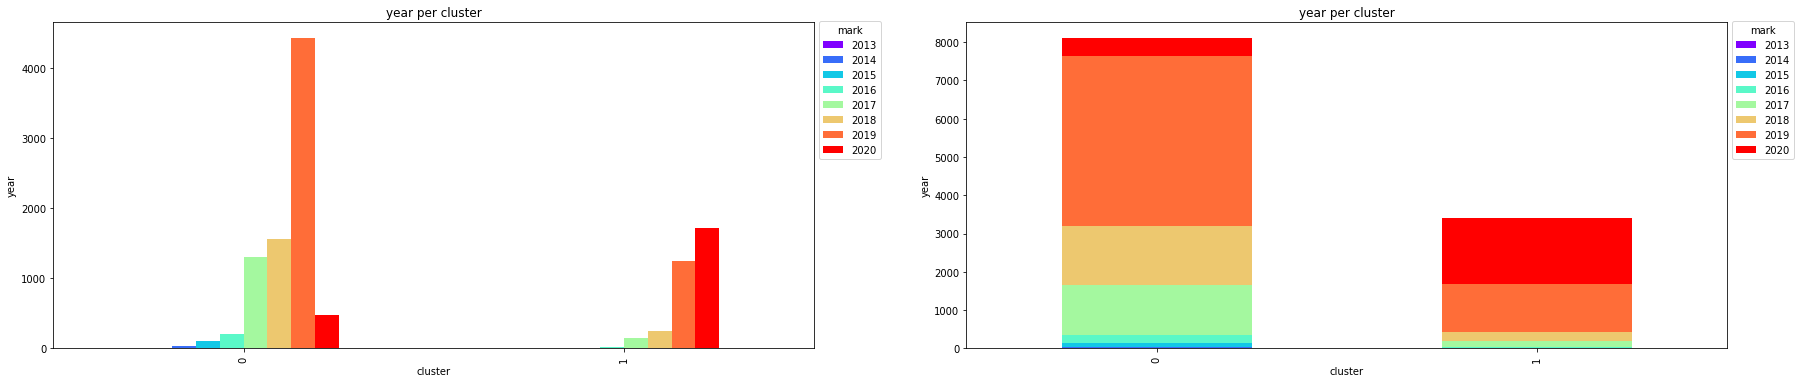

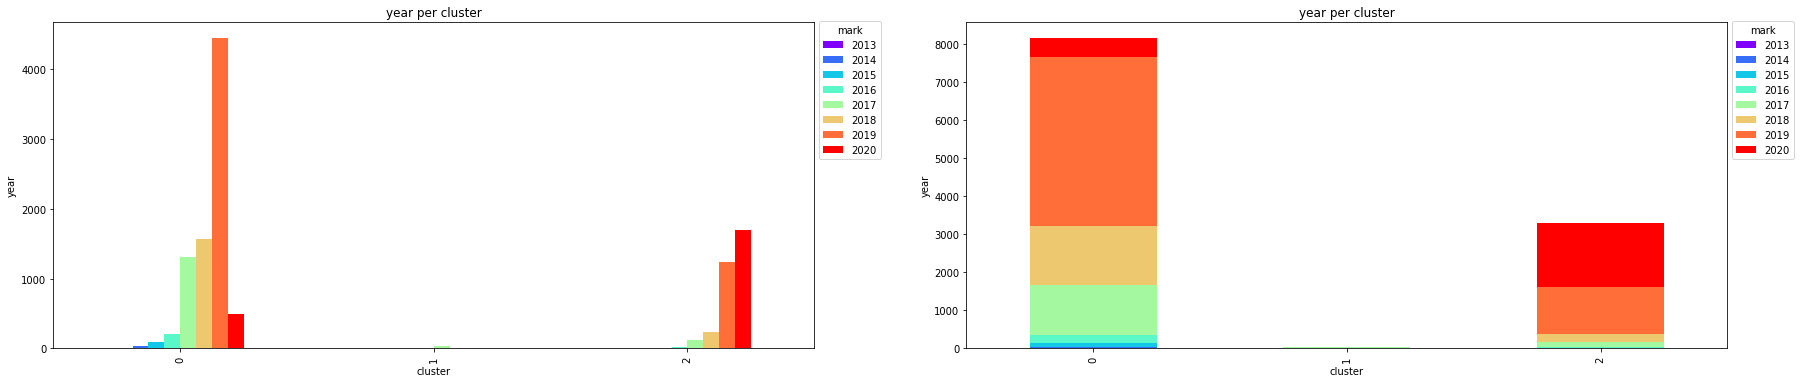

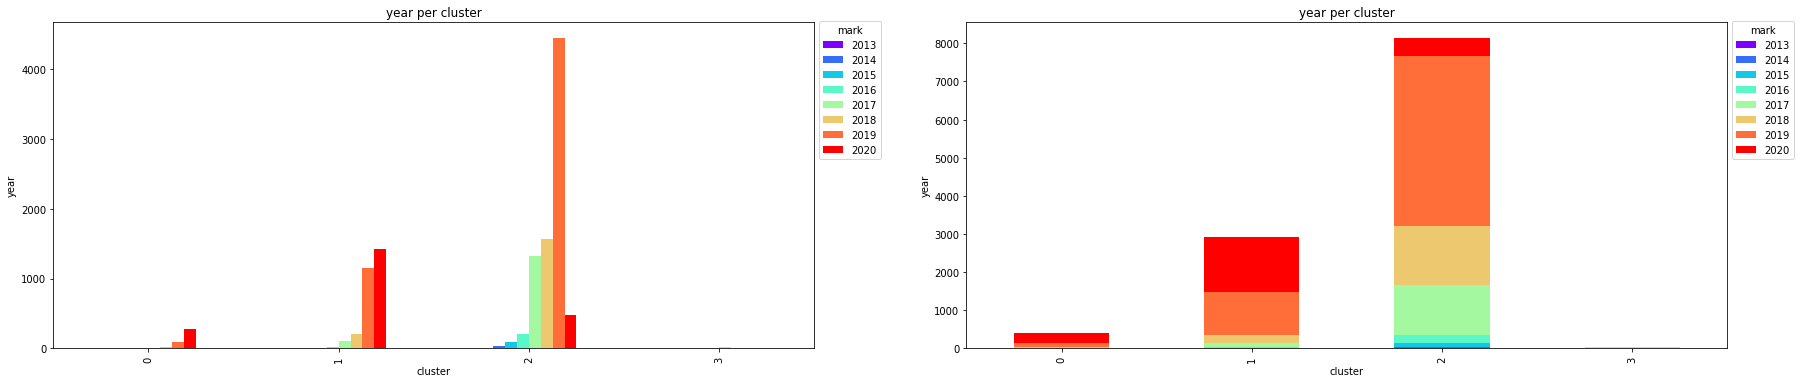

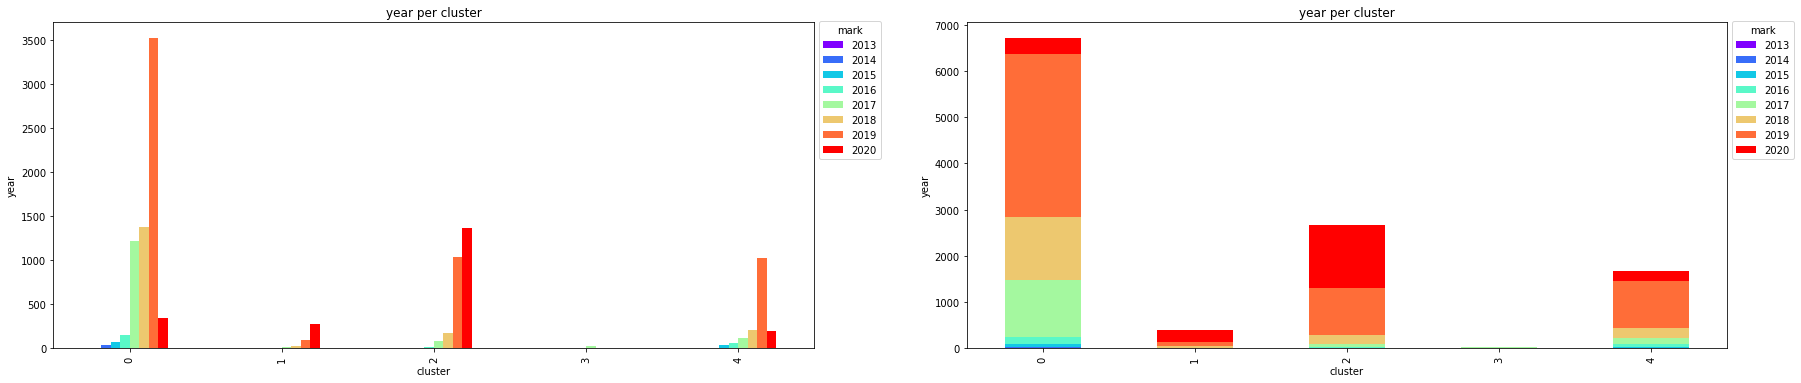

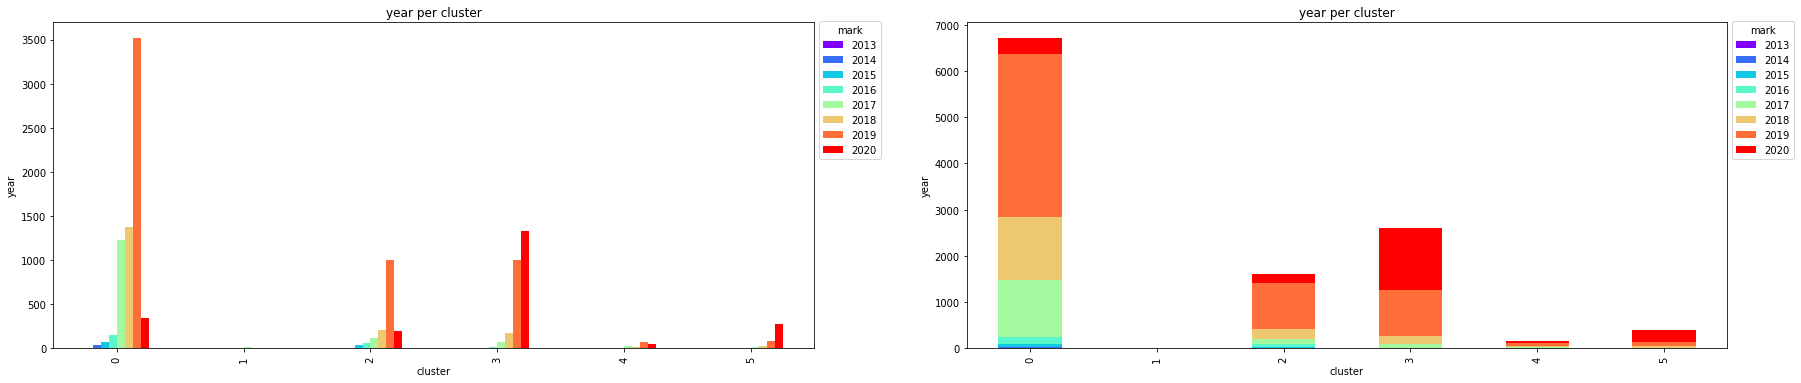

In [ ]:
for i in range(len(cluster_labels)):
  year_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_year'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('year')

  ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('year')

  plt.show()

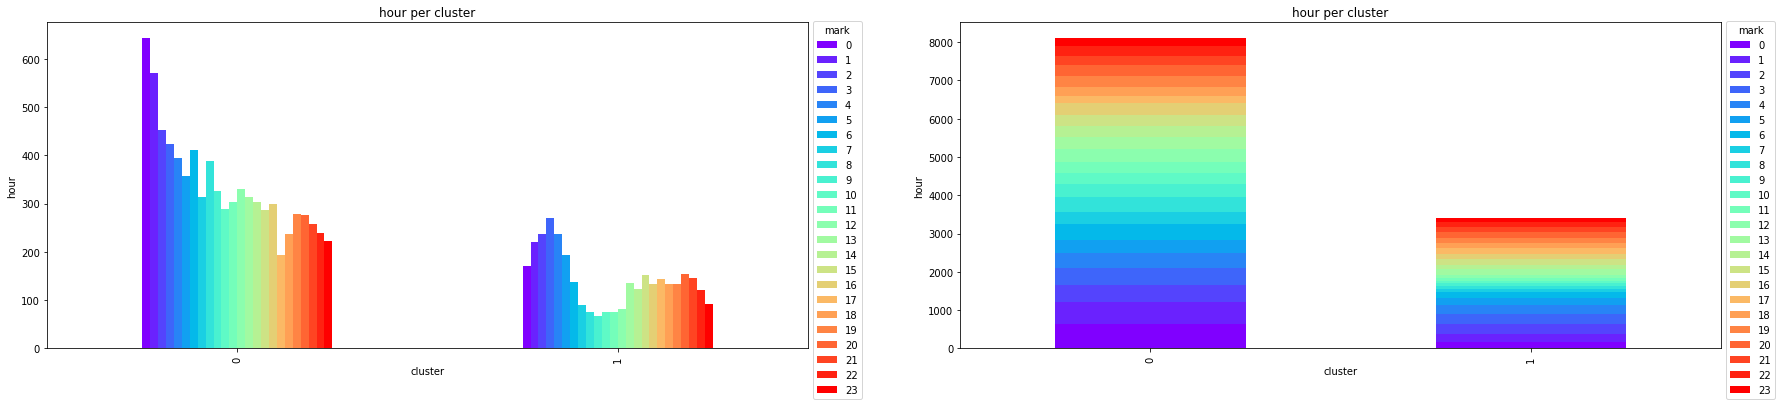

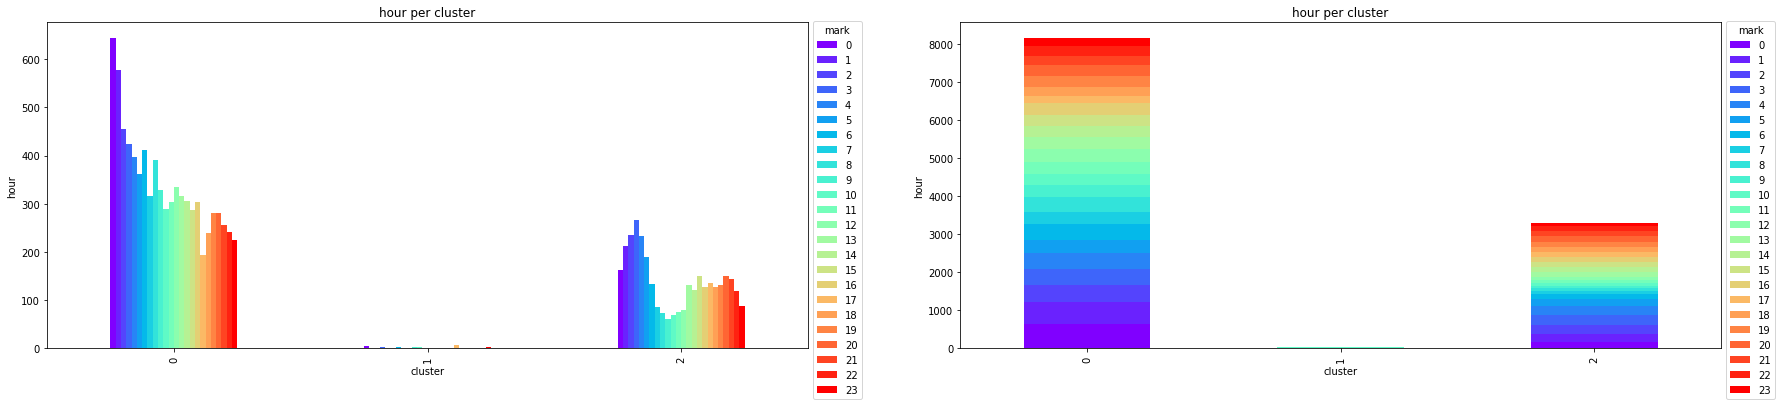

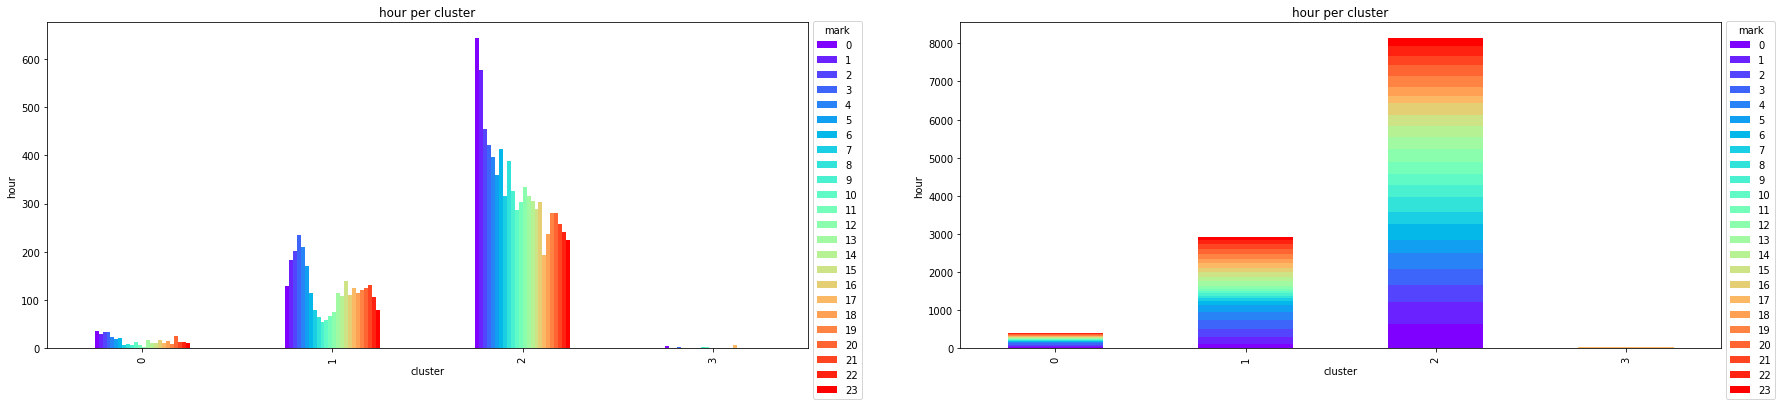

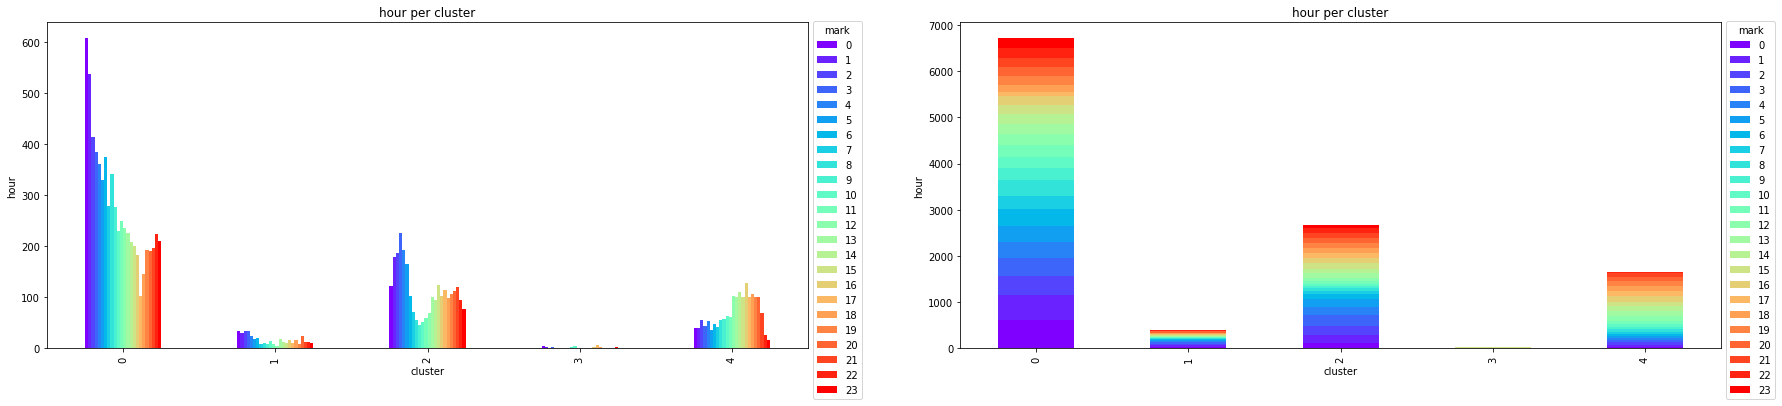

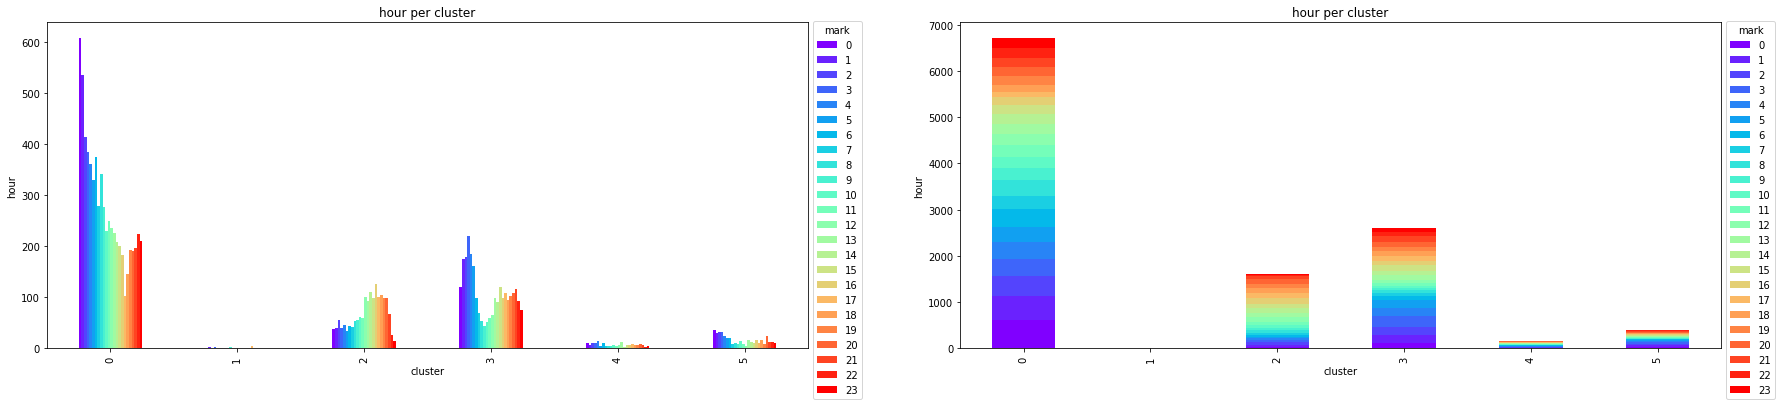

In [ ]:
for i in range(len(cluster_labels)):
  hour_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_hour'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('hour')

  ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('hour')

  plt.show()

## Clusters characterization with respect to numerical features

In [ ]:
cols = []
for i in range(len(cluster_labels)):
  s = 'label_K='+str(i+2)
  cols.append(s)

In [ ]:
for i in range(len(cluster_labels)):
  users_profile_all[cols[i]]=cluster_labels[i]

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness,label_K=2,label_K=3,label_K=4,label_K=5,label_K=6
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,6237.625,138813.625,0.0,1031.125,297.5,...,9.578214,10.607494,109.637321,3900,0.608718,1,2,1,2,3
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,6237.625,138813.625,0.0,969.000,297.5,...,0.000000,0.000000,85.026719,3893,0.519137,1,2,1,2,3
2,755116,呉⚛,en,0,2012-02-08 05:25:49,6237.625,92396.000,0.0,391.000,77.0,...,5.114369,6.387527,80.780317,3885,0.551866,1,2,1,2,3
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,6237.625,138813.625,0.0,209.000,297.5,...,0.000000,0.000000,84.281111,3884,0.519310,1,2,1,2,3
4,785080,W H,en,0,2012-02-23 01:08:16,6237.625,138486.000,0.0,1031.125,185.0,...,8.222893,9.556485,95.166473,3870,0.887855,1,2,1,2,3


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).mean()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,
0,150.045946,7044.669806,120.588918,27.052959,11.881504,3583.484340,80.480764,337.389655,9.697702,85.935069,0.448269,0.526172,68.938237,1664.465721,0.169501
1,4997.099029,102999.116944,571.105135,197.380224,181.334020,116388.884932,545.775750,4987.439656,31.545555,922.972214,1.164237,2.355012,73.549154,2193.290759,1.321729


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,
0,155.955973,7406.264435,121.351539,27.926689,12.511095,4000.822239,80.188917,368.400469,9.648926,90.293703,0.468020,0.530338,68.999742,1664.978178,0.172047
1,391.491848,138813.625000,987.228261,95.217391,72.565217,151681.347826,9565.804348,38158.306164,1613.688887,21026.948227,1.560904,0.490232,132.939889,2418.608696,0.159323
2,5115.544213,102972.752118,569.837935,199.067927,183.703782,116471.842663,427.569440,4515.348062,9.955878,644.304882,1.120151,2.396694,72.636308,2196.410287,1.348011


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,
0,4730.655788,138813.625000,559.699200,221.119458,162.679803,466501.992611,358.339901,20688.124524,8.446586,3214.305063,1.101965,2.447483,68.230449,1963.591133,1.495324
1,5137.349658,98247.157577,570.352226,195.255822,185.704452,68700.470890,461.539041,2423.595058,12.312935,322.210915,1.123159,2.377441,73.391939,2225.827740,1.320388
2,155.468182,7196.503177,121.409811,27.876228,12.498649,3550.105845,80.309185,321.962628,9.663500,81.414558,0.467262,0.530161,68.996011,1665.340742,0.171835
3,241.447368,138813.625000,977.986842,82.947368,64.157895,148269.552632,9474.394737,41716.060009,1783.092983,24323.397439,1.556325,0.425040,134.199641,2432.868421,0.100763


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,
0,105.899297,5418.974550,23.658580,10.854071,4.316714,2920.945676,15.808156,274.493998,2.802366,67.709172,0.413393,0.383101,64.892385,1586.223843,0.082891
1,4732.835591,138813.625000,557.280172,220.732759,162.679803,466867.019704,333.719212,20669.303203,6.601756,3210.172597,1.101573,2.447483,68.069422,1962.300493,1.495677
2,5397.220522,102635.859095,567.986241,192.734515,189.616045,72857.711567,410.206716,2490.433082,9.653027,329.546131,1.129187,2.388159,71.755547,2237.073134,1.342444
3,241.447368,138813.625000,977.986842,82.947368,64.157895,148269.552632,9474.394737,41716.060009,1783.092983,24323.397439,1.556325,0.425040,134.199641,2432.868421,0.100763
4,654.787087,20429.927703,584.989189,124.847447,64.186787,8699.540541,484.179580,713.463565,42.464325,160.631984,0.769582,1.372636,88.862795,2047.616817,0.660736


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,
0,105.922629,5421.393091,23.208550,10.856388,4.318642,2922.250000,12.385497,274.616529,2.487295,67.709850,0.413417,0.383264,64.892304,1586.348719,0.082888
1,38.214286,138813.625000,1031.125000,11.785714,6.928571,151505.142857,10000.000000,60752.825071,2380.870167,46073.818717,1.294659,0.000000,147.773066,2427.857143,0.008914
2,643.870414,19534.494558,569.174674,125.228856,64.308458,7778.532960,176.220149,613.851055,28.857334,143.493755,0.771802,1.371601,88.795982,2049.101368,0.658563
3,5406.663713,102842.912124,553.000241,193.061248,189.214946,73028.179892,122.745378,2477.460817,3.027024,323.647377,1.131919,2.391759,71.698760,2238.010786,1.338812
4,3022.711988,84422.495614,1031.125000,152.239766,139.269006,73332.520468,9324.467836,6098.268600,466.294903,1748.282367,1.008963,1.717246,86.430269,2160.631579,1.021668
5,4707.636166,138813.625000,548.742246,219.436725,161.305211,466937.193548,217.297767,21159.605911,4.481705,3383.467347,1.103864,2.450122,68.064760,1958.838710,1.488490


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).std()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,
0,499.549097,24676.865594,289.272955,51.605167,36.020543,16702.619957,618.075113,1395.218338,57.092426,492.223551,0.637026,1.020599,14.521229,436.397189,0.292639
1,1937.241592,55484.047033,399.589812,114.493826,81.383847,151336.528589,2025.262940,8962.346991,210.061848,3718.596203,1.769932,2.242701,20.366409,618.130207,0.719241


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,
0,514.766052,25487.279511,289.673449,53.408831,37.650968,20001.349244,616.381662,1693.539244,56.931765,506.174582,0.855481,1.028945,14.590476,437.137972,0.295922
1,967.143225,0.000000,208.201787,115.296268,98.597645,93690.034451,2059.063904,24988.743624,773.541950,20047.340960,0.764351,1.312648,27.409709,382.492439,0.376991
2,1817.127098,55482.229810,397.754575,113.856946,79.431700,152179.707649,1734.545569,7525.797973,43.455239,1734.603487,1.568341,2.242902,18.957961,619.018140,0.707122


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,
0,2132.991282,0.000000,369.954669,98.987859,82.137650,73794.336902,1565.783416,11791.069152,45.268331,4122.730464,0.461470,2.242103,15.381275,631.395953,0.882190
1,1799.324257,57380.478744,402.194116,115.614584,79.379708,80034.146762,1820.828831,2932.922478,61.866081,515.834940,1.660668,2.241940,19.514736,611.627452,0.680673
2,514.696674,24960.507169,289.865002,53.378268,37.672203,15556.357237,616.866090,1153.957637,56.976020,443.974857,0.855703,1.028999,14.589686,437.003694,0.295848
3,379.551563,0.000000,228.508593,115.191250,96.419558,82008.851348,2259.889755,25436.842654,734.940329,20529.212817,0.774975,1.284853,28.688217,369.873110,0.174031


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,
0,427.539766,22752.188350,103.600496,21.848729,22.577768,14544.998923,189.089697,1106.995654,26.846257,443.690429,0.529664,0.752020,10.274366,394.022872,0.133684
1,2128.775268,0.000000,370.075437,99.509008,82.137650,72589.227368,1490.585526,11790.745828,26.269141,4121.750660,0.461600,2.242103,14.957317,631.649886,0.881652
2,1540.737356,55731.572144,401.073353,117.053058,76.743222,81204.829197,1681.446689,2753.076833,45.589107,499.239877,1.718293,2.256262,18.314033,612.594159,0.668859
3,379.551563,0.000000,228.508593,115.191250,96.419558,82008.851348,2259.889755,25436.842654,734.940329,20529.212817,0.774975,1.284853,28.688217,369.873110,0.174031
4,1206.929320,37731.038049,414.701734,90.702922,75.065832,24379.316018,1714.867399,2158.659365,124.172508,489.028090,1.575145,1.774906,17.473114,461.747867,0.534261


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,
0,427.633786,22756.982300,101.411035,21.853236,22.582626,14548.116657,91.245110,1107.227721,22.118265,443.789435,0.529781,0.752148,10.276640,394.066557,0.133714
1,9.978273,0.000000,0.000000,9.175038,8.269167,19.918515,0.000000,8346.254137,522.285603,17011.126931,0.228419,0.000000,28.554849,233.778941,0.005156
2,1187.354495,36476.662973,413.240213,90.844778,75.219467,21861.422397,434.208764,1713.255797,86.084310,435.231344,1.597851,1.771577,17.064667,458.914325,0.525748
3,1524.999734,55605.728282,398.621273,116.745510,76.905397,81483.938750,484.543991,2696.992723,10.332583,473.516526,1.743278,2.260499,18.275372,613.233114,0.662600
4,2766.586864,63490.389091,0.000000,119.410443,102.071302,95304.330859,1296.917950,10047.718106,505.077173,3524.317883,0.717126,2.052499,29.074543,577.524238,0.882171
5,2147.902303,0.000000,369.515692,100.271406,82.568884,72753.623188,1075.511800,13071.360300,18.288835,4630.494984,0.461067,2.241115,14.931163,630.916215,0.888059


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).max()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,38069.805338,1174.763061,18511.666667,17.033898,6.247477,245.0,3853,3.892178
1,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,41.833333,6.369161,189.0,3900,4.148438


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,49997.448155,1174.763061,18511.666667,29.676471,6.247477,245.000000,3853,3.892178
1,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,5.154424,189.000000,3068,2.358178
2,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,63204.336440,718.126418,26717.125571,41.833333,6.369161,166.371681,3900,4.148438


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,63204.336440,749.485712,26717.125571,2.566038,6.362118,140.678363,3463,4.105727
1,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,23237.085528,1254.132950,6873.451838,41.833333,6.369161,166.371681,3900,4.148438
2,6237.625,138813.625,1031.125,297.5,245.0,299743.0,10000.0,20616.043432,1174.763061,18511.666667,29.676471,6.247477,245.000000,3853,3.892178
3,1444.000,138813.625,1031.125,297.5,245.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,5.154424,189.000000,3068,0.690593


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,246185.0,10000.0,20616.043432,909.054786,18511.666667,10.440860,5.170867,111.333333,3672,2.425794
1,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,63204.336440,204.039838,26717.125571,2.566038,6.362118,118.519065,3463,4.105727
2,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,20509.222959,997.037438,6873.451838,41.833333,6.369161,152.552135,3900,4.148438
3,1444.000,138813.625,1031.125,297.5,245.0,500000.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,5.154424,189.000000,3068,0.690593
4,6237.625,138813.625,1031.125,297.5,245.0,242743.0,10000.0,24701.494459,1254.132950,8539.625000,29.676471,6.247477,245.000000,3853,4.101197


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,246185.0,1138.0,20616.043432,409.870365,18511.666667,10.440860,5.170867,111.333333,3672,2.425794
1,60.000,138813.625,1031.125,40.0,28.0,151542.0,10000.0,69510.395858,3722.299247,69042.400000,1.837838,0.000000,189.000000,2868,0.021314
2,6237.625,138813.625,1031.125,297.5,245.0,242743.0,4824.0,19757.275736,598.158006,8539.625000,29.676471,6.247477,245.000000,3853,3.892178
3,6237.625,138813.625,1031.125,297.5,245.0,500000.0,6201.0,19386.475065,172.139404,5119.340568,41.833333,6.369161,152.552135,3900,4.148438
4,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,44049.482134,2418.401650,17538.410714,3.043548,6.313700,165.230769,3308,4.101197
5,6237.625,138813.625,1031.125,297.5,245.0,500000.0,10000.0,106034.982635,171.047654,36148.675676,2.566038,6.362118,118.519065,3463,4.105727


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).min()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.000000,890,0.000319
1,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002976,0.0,21.107632,896,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,
0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,24.0,138813.625,4.0,1.0,2.0,24410.0,1.0,4622.883067,0.310517,2558.037736,0.273973,0.0,67.371429,1247,0.004533
2,20.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002976,0.0,21.107632,896,0.014070


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,
0,25.0,138813.625,1.0,0.0,0.0,145873.0,1.0,7415.045544,0.088165,132.863359,0.084900,0.0,38.092199,908,0.010071
1,20.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002976,0.0,21.107632,896,0.014070
2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
3,24.0,138813.625,4.0,1.0,2.0,46559.0,1.0,6900.525770,0.310517,3515.125000,0.273973,0.0,67.371429,1247,0.004533


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,
0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,25.0,138813.625,1.0,0.0,0.0,145873.0,1.0,7415.045544,0.088165,132.863359,0.084900,0.0,38.092199,908,0.010071
2,20.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.101399,0.0,21.107632,896,0.014070
3,24.0,138813.625,4.0,1.0,2.0,46559.0,1.0,6900.525770,0.310517,3515.125000,0.273973,0.0,67.371429,1247,0.004533
4,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,28.350581,919,0.000334


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,
0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,28.0,138813.625,1031.125,2.0,2.0,151492.0,10000.0,42454.176934,1621.100454,16483.270833,0.833333,0.0,67.371429,2100,0.004533
2,1.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,28.350581,937,0.000334
3,20.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.101399,0.0,25.117843,896,0.014070
4,12.0,2.000,1031.125,0.0,0.0,1.0,3983.0,0.028356,97.882341,2.111647,0.060421,0.0,21.107632,919,0.013599
5,25.0,138813.625,1.000,0.0,0.0,145873.0,1.0,7415.045544,0.088165,132.863359,0.084900,0.0,38.092199,908,0.010071


# gmeans

In [ ]:
input_data = list(X)

gmeans_instance2 = gmeans(input_data, k_max=2).process()
clusters2 = gmeans_instance2.get_clusters() 
# Change cluster representation from default to labeling.
encoder2 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters2, input_data)
encoder2.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels2 = encoder2.get_clusters()

gmeans_instance3 = gmeans(input_data, k_max=3).process()
clusters3 = gmeans_instance3.get_clusters() 
encoder3 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters3, input_data)
encoder3.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels3 = encoder3.get_clusters()

gmeans_instance4 = gmeans(input_data, k_max=4).process()
clusters4 = gmeans_instance4.get_clusters() 
encoder4 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters4, input_data)
encoder4.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels4 = encoder4.get_clusters()

gmeans_instance5 = gmeans(input_data, k_max=5).process()
clusters5 = gmeans_instance5.get_clusters() 
encoder5 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters5, input_data)
encoder5.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels5 = encoder5.get_clusters()

gmeans_instance6 = gmeans(input_data, k_max=6).process()
clusters6 = gmeans_instance6.get_clusters() 
encoder6 = cluster_encoder(type_encoding.CLUSTER_INDEX_LIST_SEPARATION, clusters6, input_data)
encoder6.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
labels6 = encoder6.get_clusters()

In [ ]:
print(labels2)   # Display labels

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Prepare cluster labels
cluster_labels = []

cluster_labels2 = np.zeros([11508], dtype=int)    # 0,1
for x in np.nditer(np.asarray(clusters2[1])):
   cluster_labels2[x] = 1
cluster_labels.append(cluster_labels2)

cluster_labels3 = np.zeros([11508], dtype=int)    # 0,1,2
for x in np.nditer(np.asarray(clusters3[1])):
   cluster_labels3[x] = 1
for x in np.nditer(np.asarray(clusters3[2])):
   cluster_labels3[x] = 2
cluster_labels.append(cluster_labels3)

cluster_labels4 = np.zeros([11508], dtype=int)    # 0,1,2,3
for x in np.nditer(np.asarray(clusters4[1])):
   cluster_labels4[x] = 1
for x in np.nditer(np.asarray(clusters4[2])):
   cluster_labels4[x] = 2
for x in np.nditer(np.asarray(clusters4[3])):
   cluster_labels4[x] = 3
cluster_labels.append(cluster_labels4)

cluster_labels5 = np.zeros([11508], dtype=int)    # 0,1,2,3,4
for x in np.nditer(np.asarray(clusters5[1])):
   cluster_labels5[x] = 1
for x in np.nditer(np.asarray(clusters5[2])):
   cluster_labels5[x] = 2
for x in np.nditer(np.asarray(clusters5[3])):
   cluster_labels5[x] = 3
for x in np.nditer(np.asarray(clusters5[4])):
   cluster_labels5[x] = 4
cluster_labels.append(cluster_labels5)

cluster_labels6 = np.zeros([11508], dtype=int)    # 0,1,2,3,4,5
for x in np.nditer(np.asarray(clusters6[1])):
   cluster_labels6[x] = 1
for x in np.nditer(np.asarray(clusters6[2])):
   cluster_labels6[x] = 2
for x in np.nditer(np.asarray(clusters6[3])):
   cluster_labels6[x] = 3
for x in np.nditer(np.asarray(clusters6[4])):
   cluster_labels6[x] = 4
for x in np.nditer(np.asarray(clusters6[5])):
   cluster_labels6[x] = 5
cluster_labels.append(cluster_labels6)



## Clusters characterization with respect to categorical features

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_noout.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,6237.625,138813.625,0.0,1031.125,297.5,...,0.0,8.831943,6.080426,0.0,9.183814,9.578214,10.607494,109.637321,3900,0.608718
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,6237.625,138813.625,0.0,969.000,297.5,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,85.026719,3893,0.519137
2,755116,呉⚛,en,0,2012-02-08 05:25:49,6237.625,92396.000,0.0,391.000,77.0,...,0.0,3.921117,2.375534,0.0,4.836434,5.114369,6.387527,80.780317,3885,0.551866
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,6237.625,138813.625,0.0,209.000,297.5,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.281111,3884,0.519310
4,785080,W H,en,0,2012-02-23 01:08:16,6237.625,138486.000,0.0,1031.125,185.0,...,0.0,8.277790,2.354578,0.0,8.421512,8.222893,9.556485,95.166473,3870,0.887855


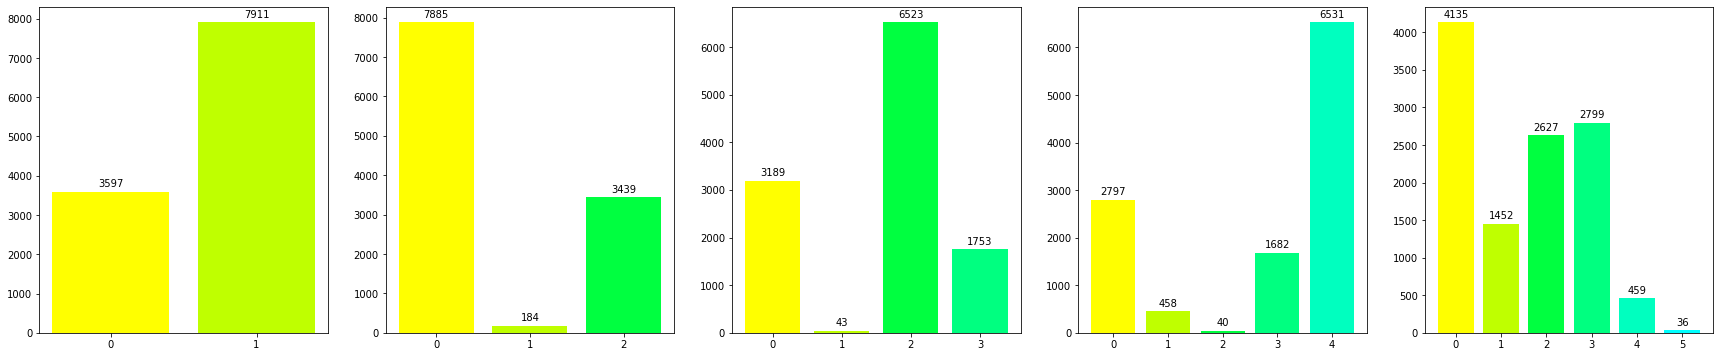

In [ ]:
fig, ax = plt.subplots(ncols=len(cluster_labels), figsize=(30,6))
for i in range(len(cluster_labels)):
  hist, bins = np.histogram(cluster_labels[i], bins=range(0, len(set(cluster_labels[i])) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

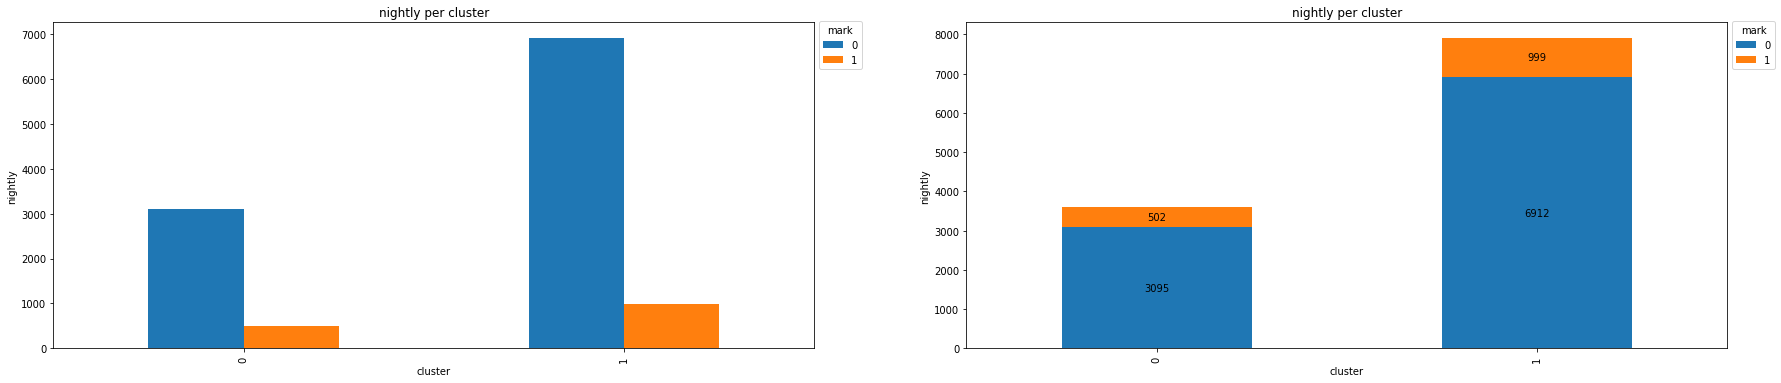

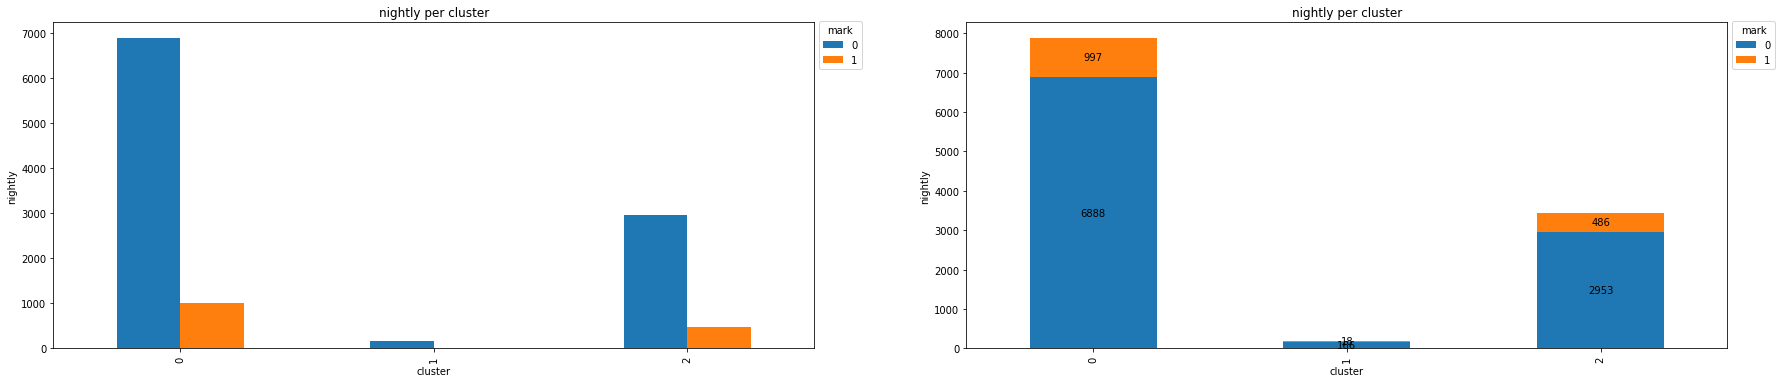

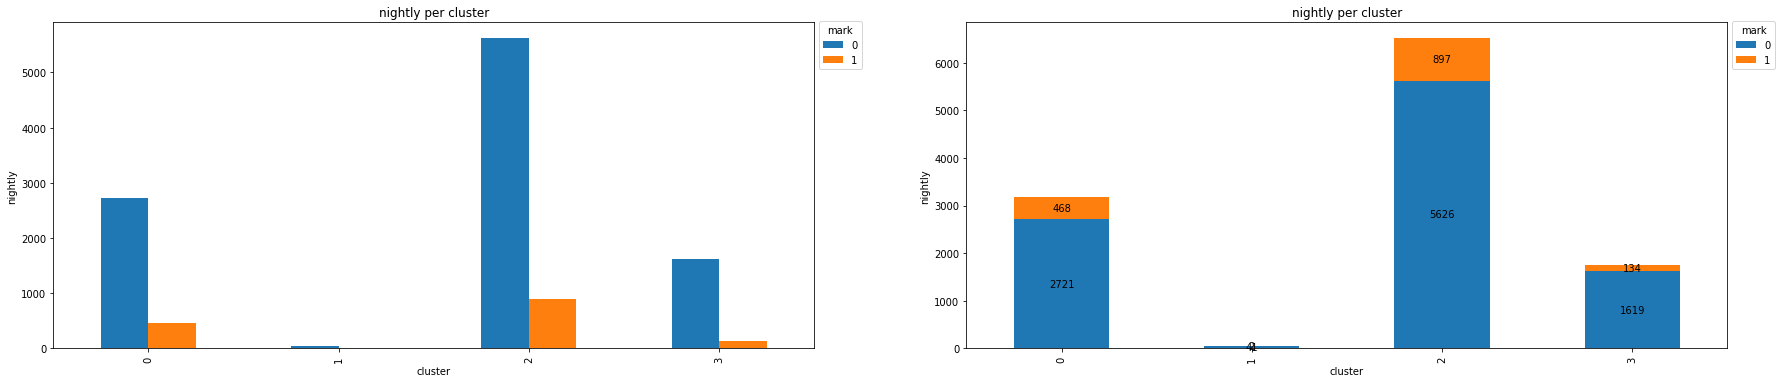

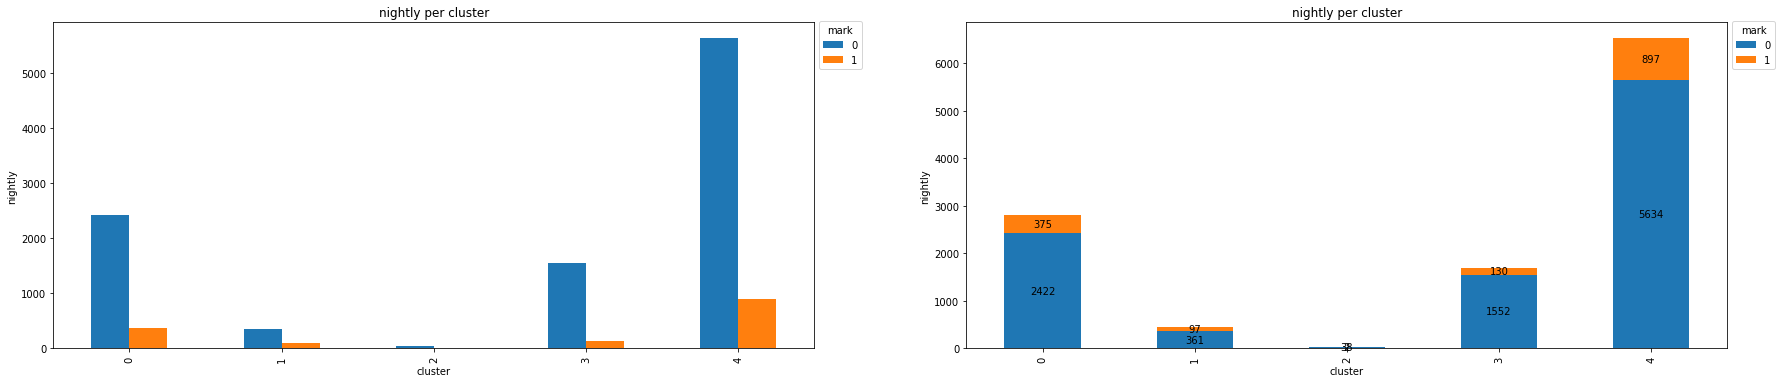

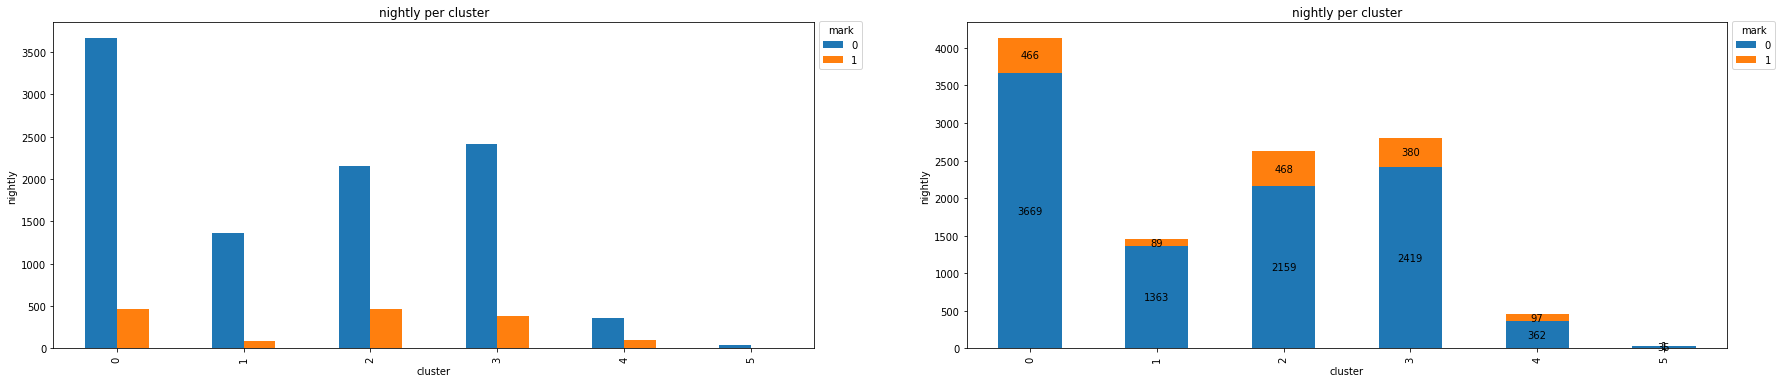

In [ ]:
for i in range(len(cluster_labels)):
  nightly_ct = pd.crosstab(cluster_labels[i],users_profile_all['nightly'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('nightly')

  ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('nightly')

  plt.show()

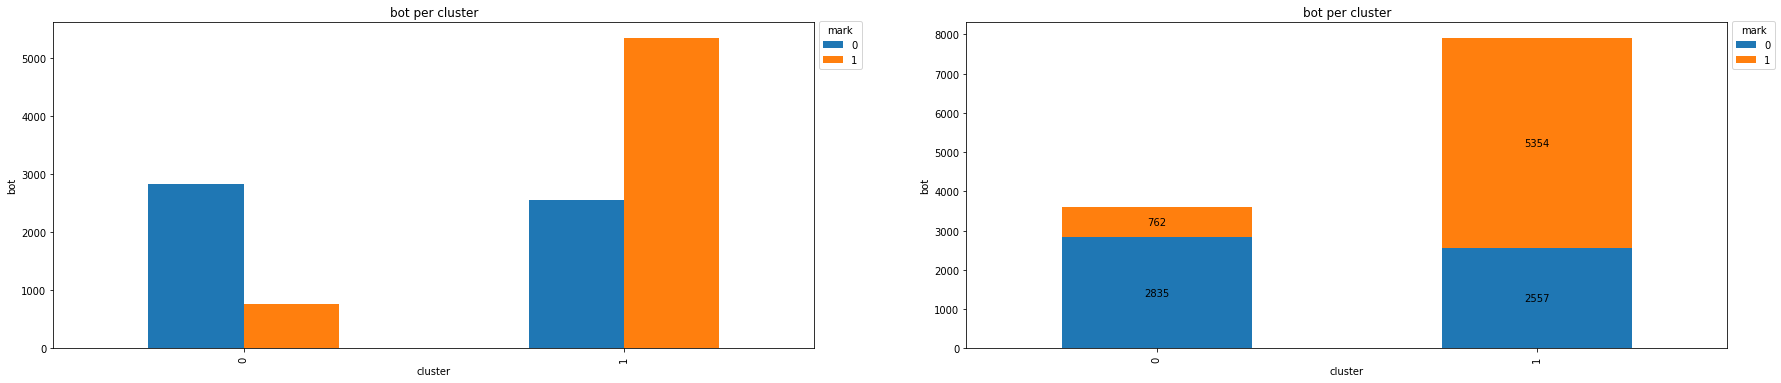

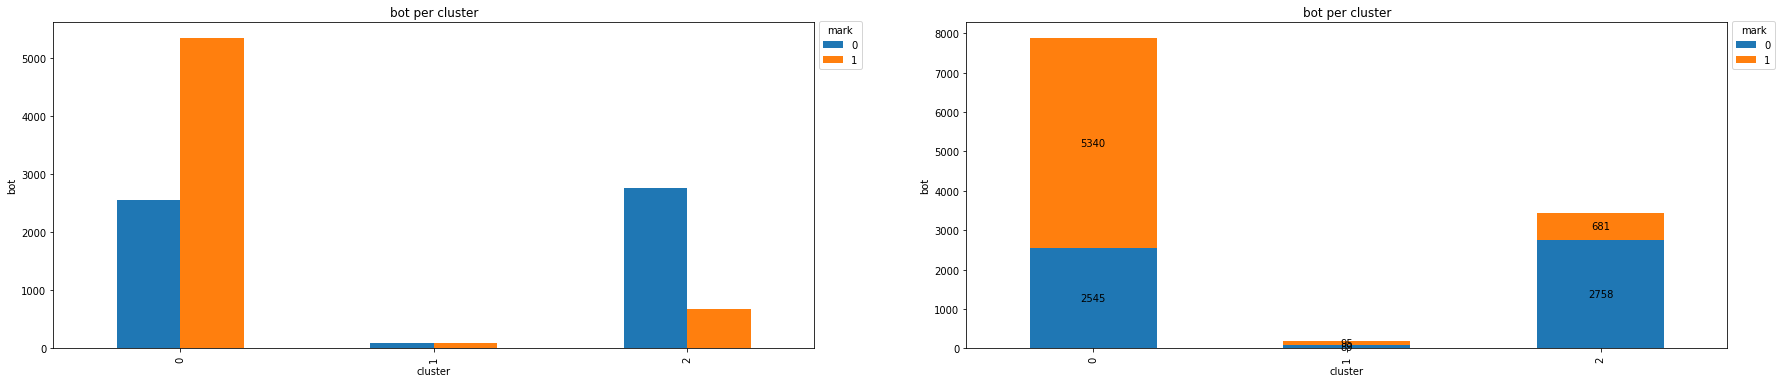

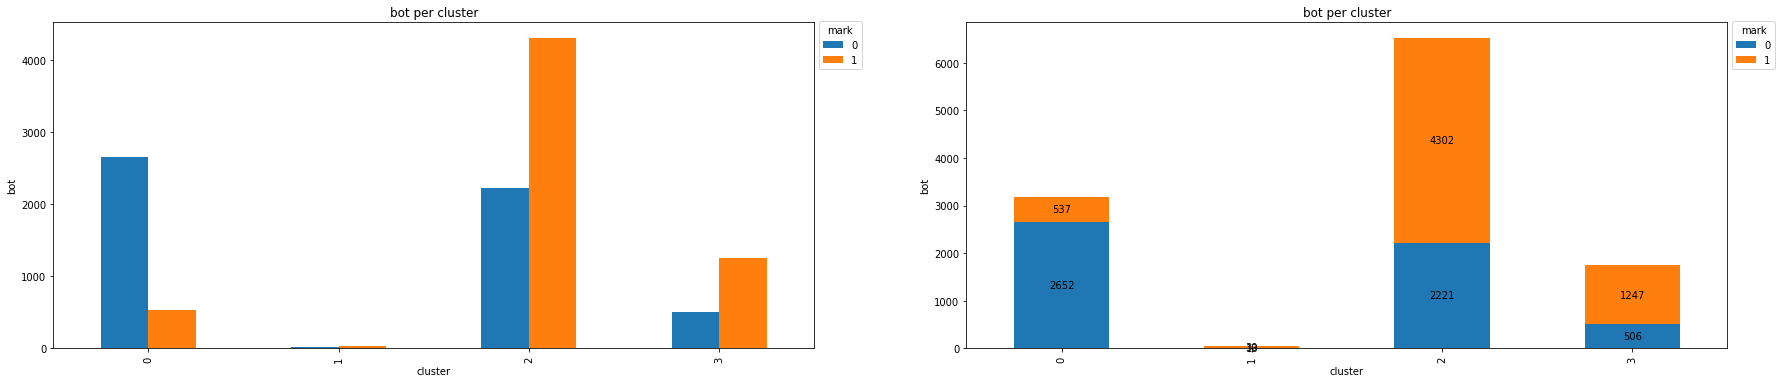

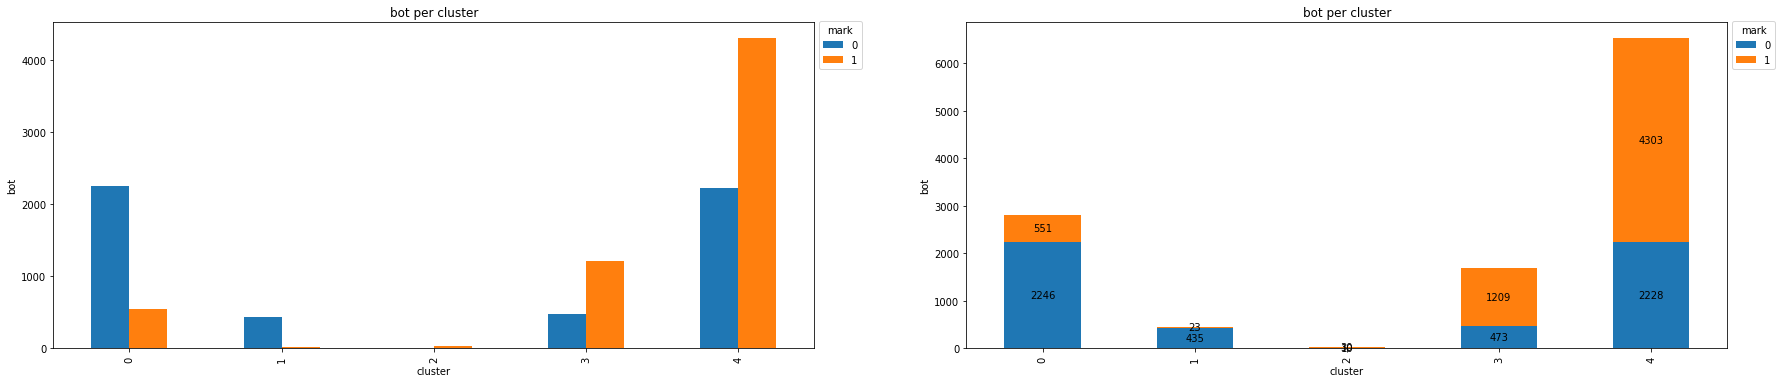

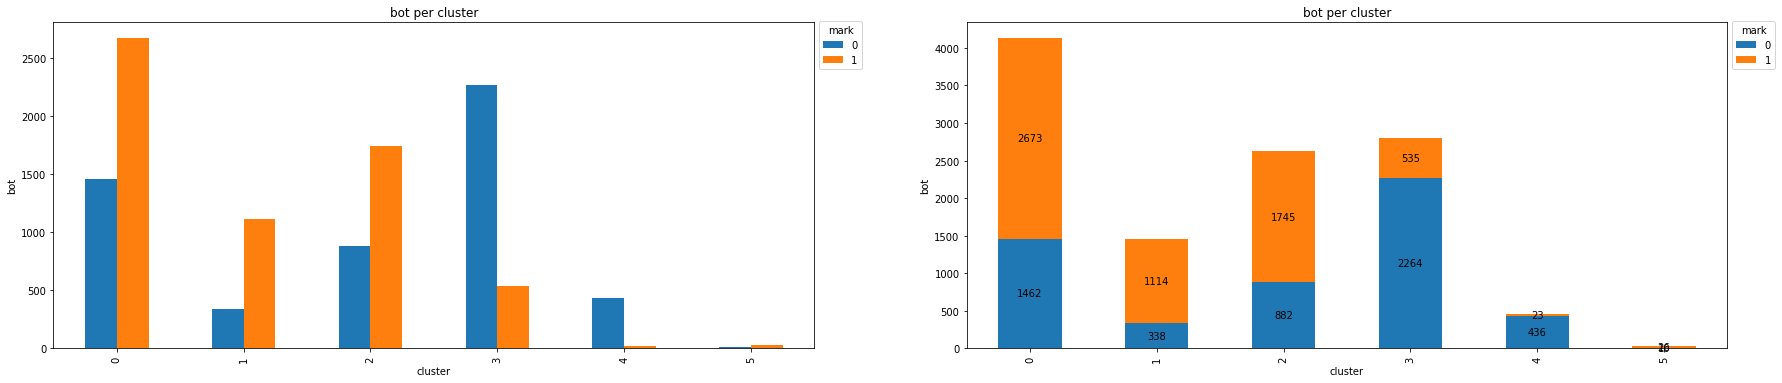

In [ ]:
for i in range(len(cluster_labels)):
  bot_ct = pd.crosstab(cluster_labels[i],users_profile_all['bot'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('bot')

  ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('bot')

  plt.show()

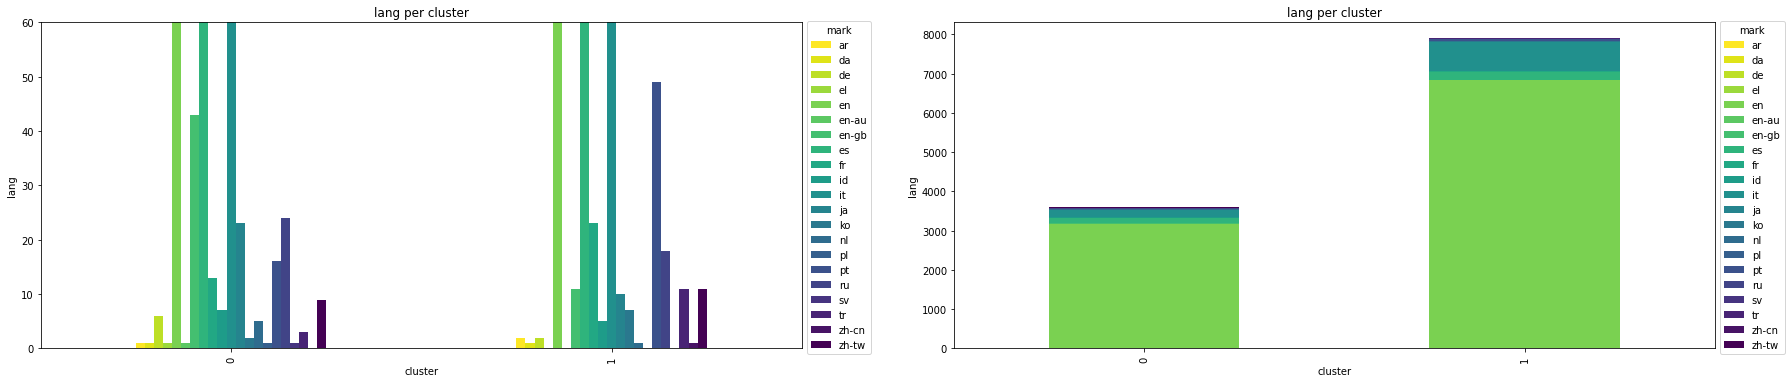

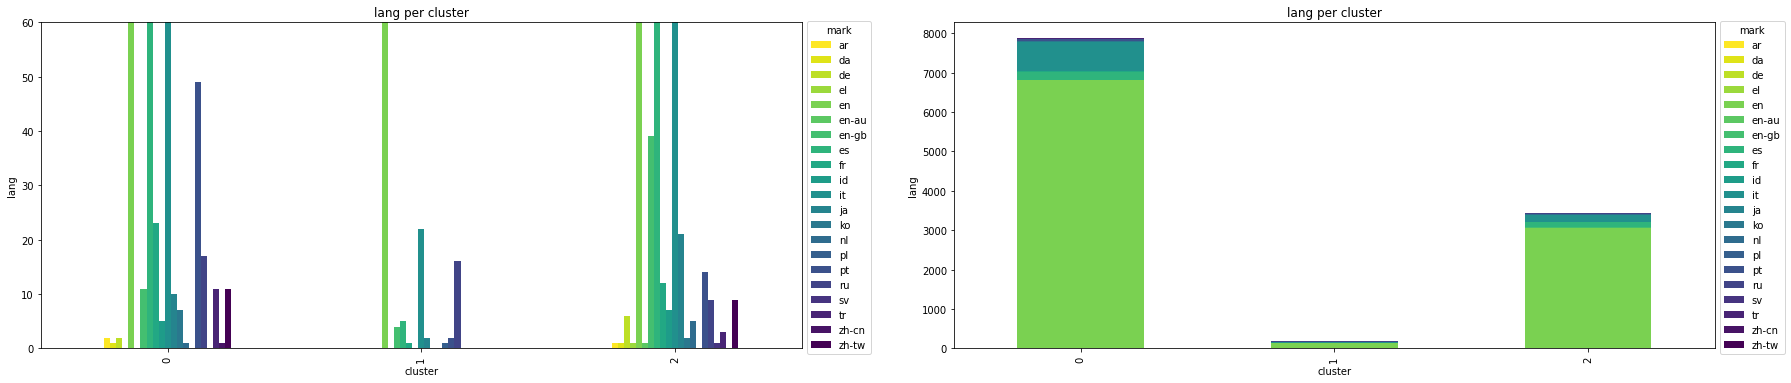

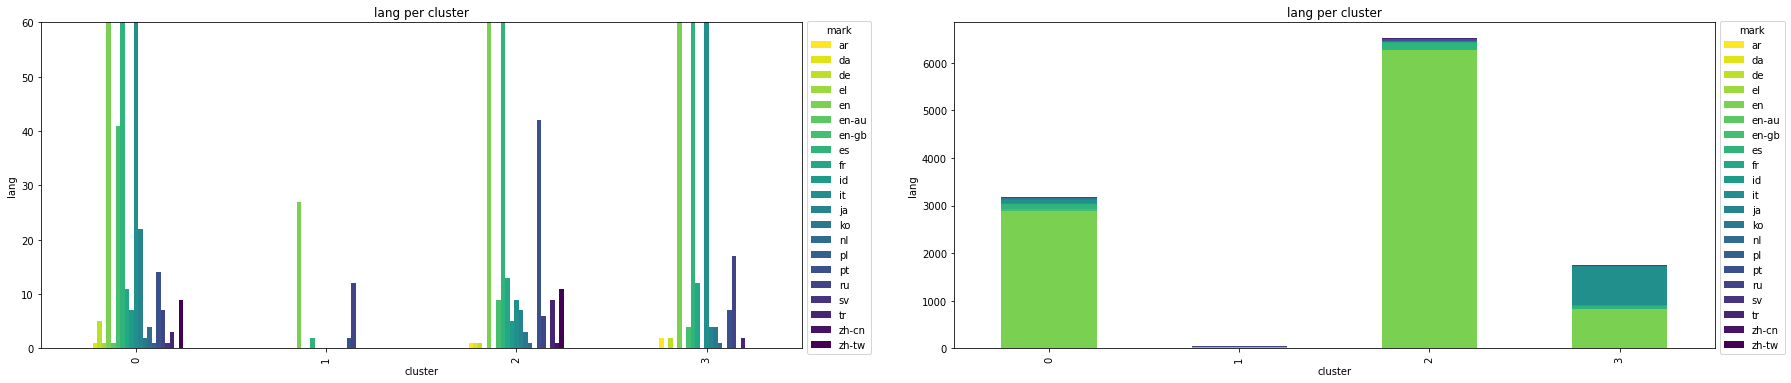

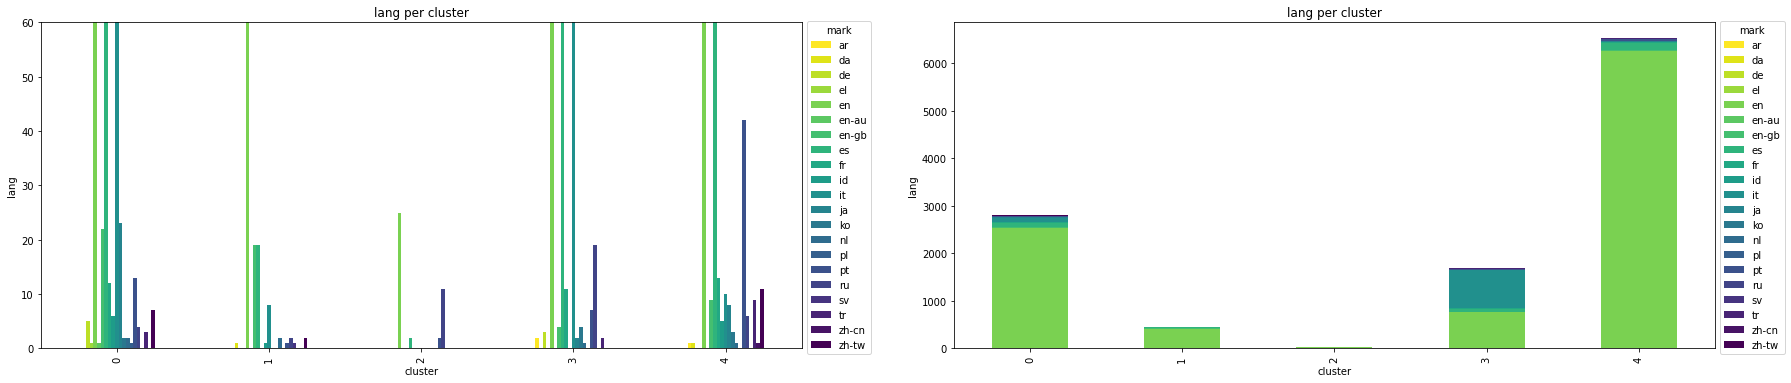

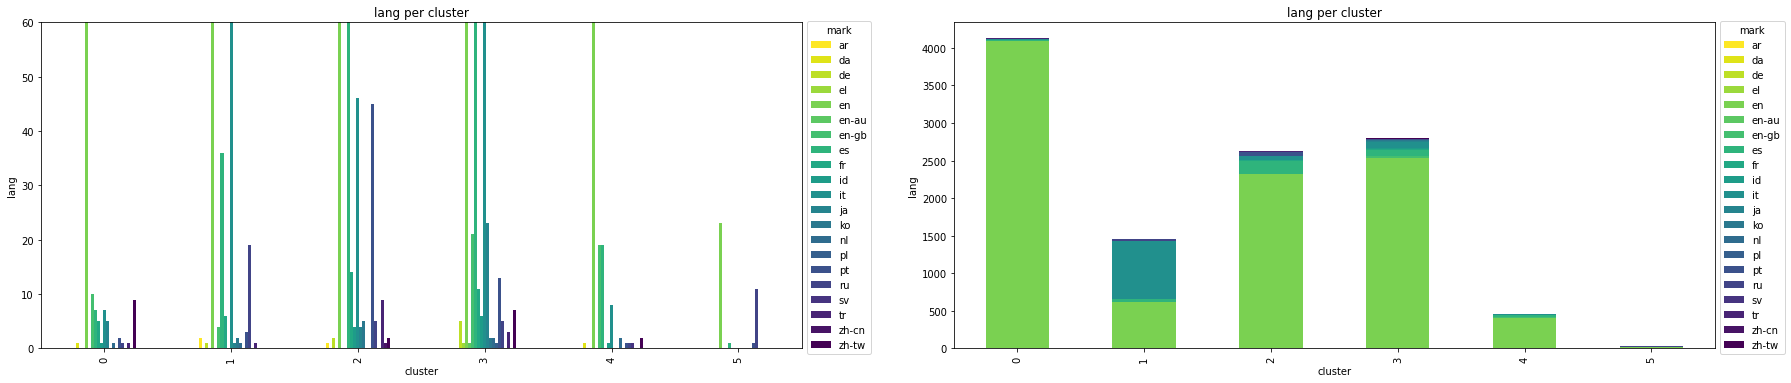

In [ ]:
for i in range(len(cluster_labels)):
  lang_ct = pd.crosstab(cluster_labels[i],users_profile_all['lang'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('lang')
  axs[0].set_ylim(0, 60) 

  ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('lang')

  plt.show()

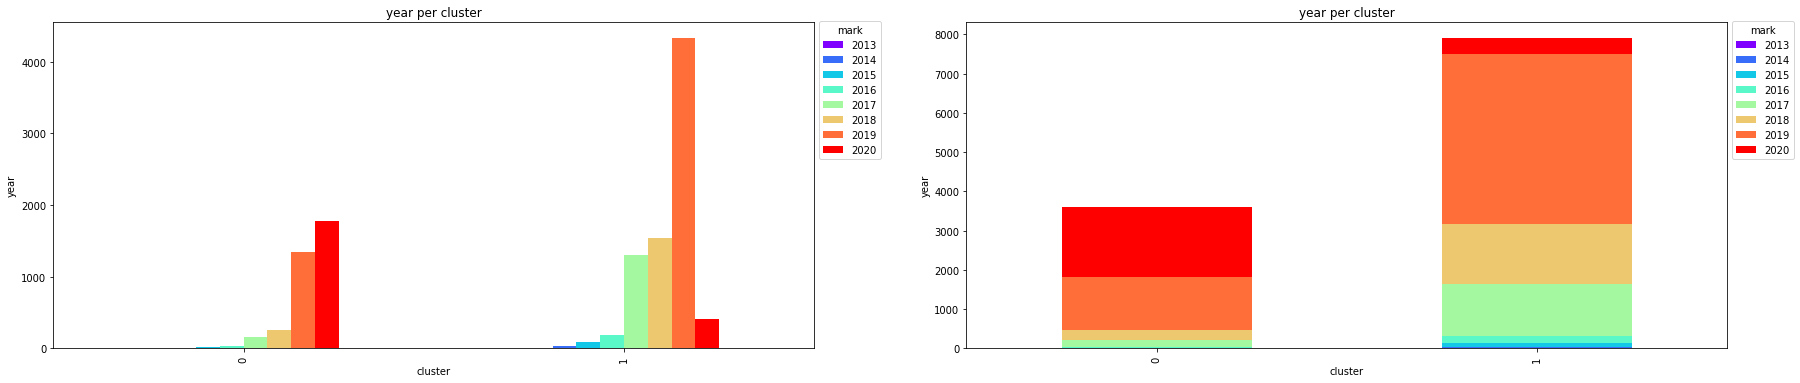

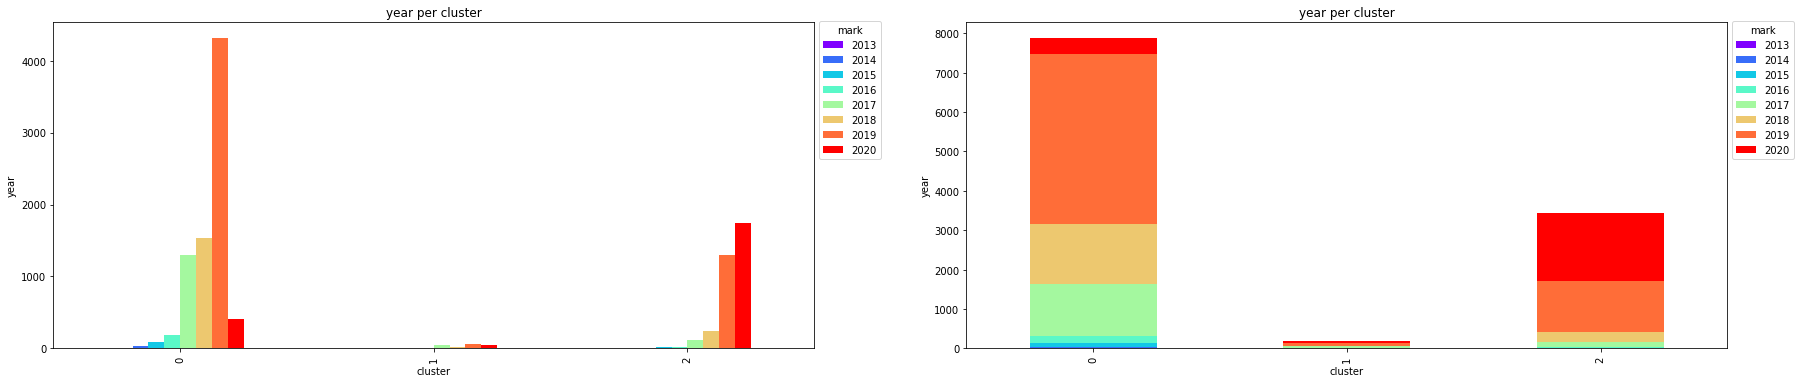

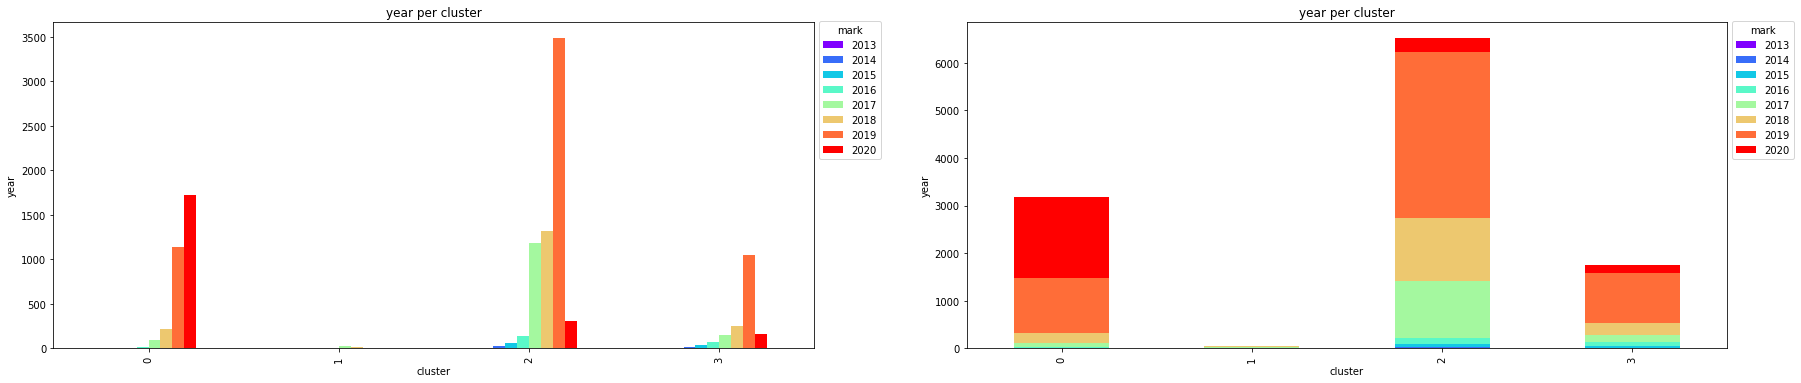

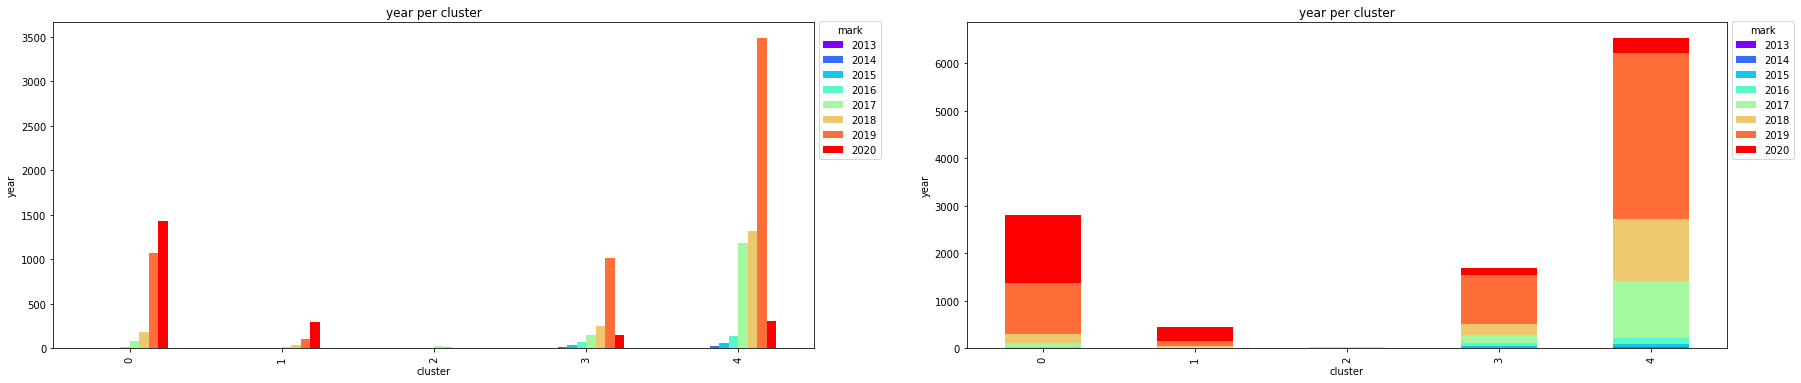

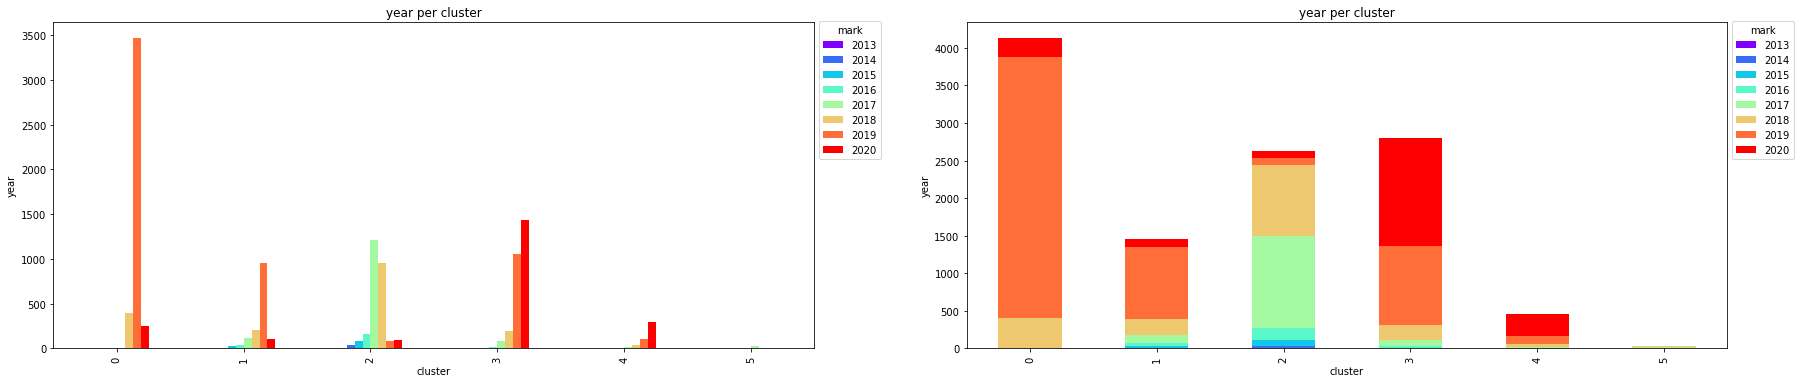

In [ ]:
for i in range(len(cluster_labels)):
  year_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_year'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('year')

  ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('year')

  plt.show()

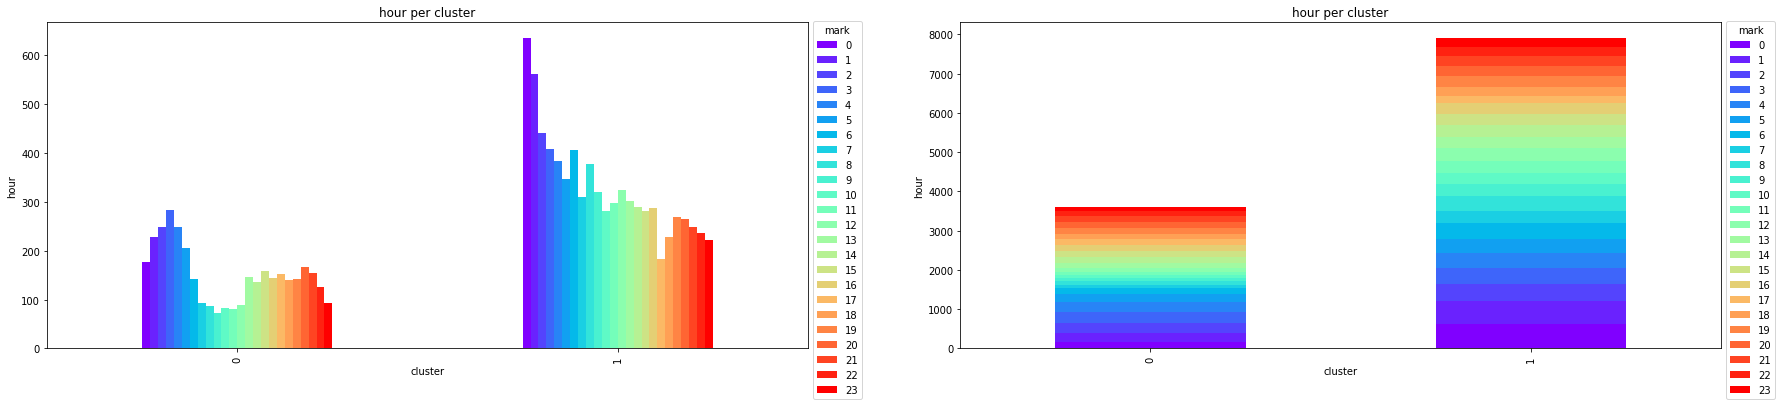

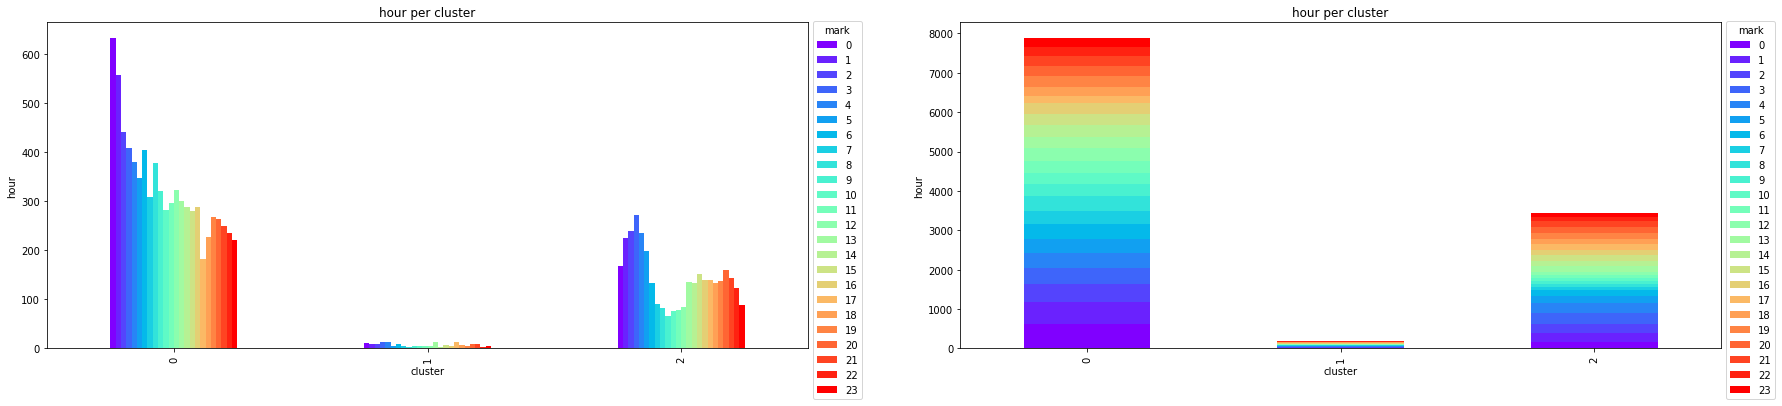

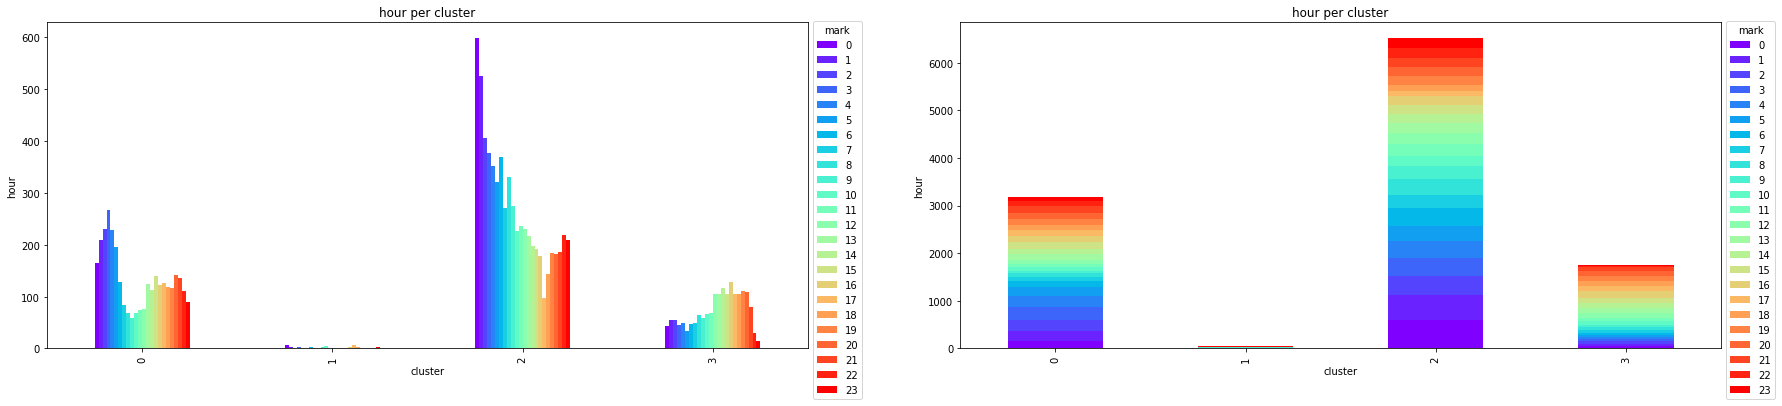

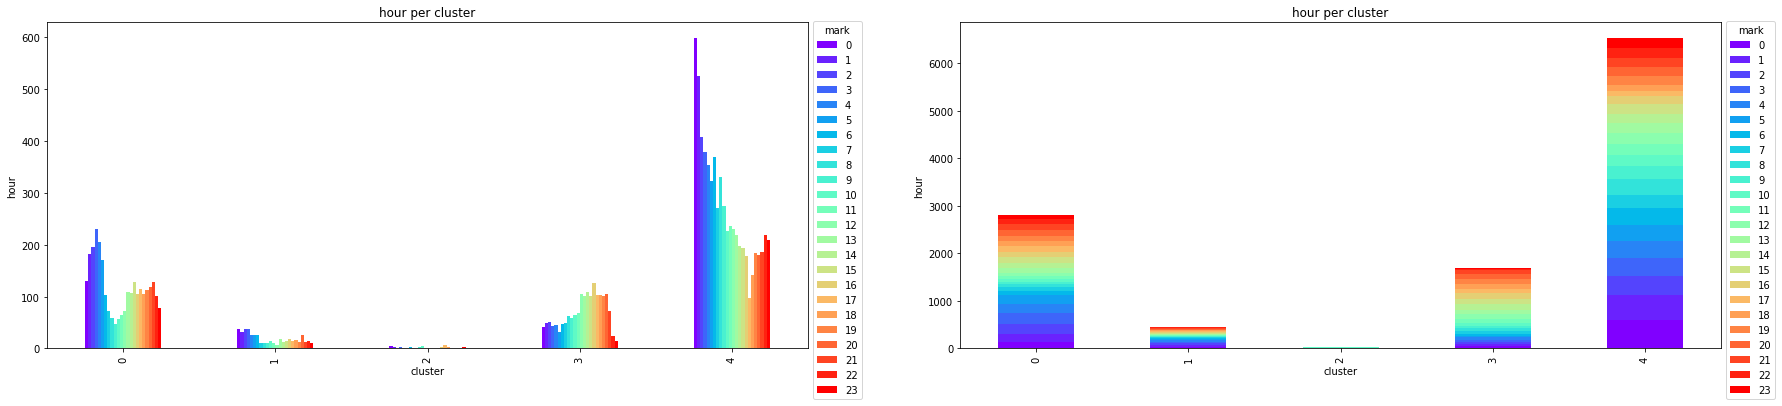

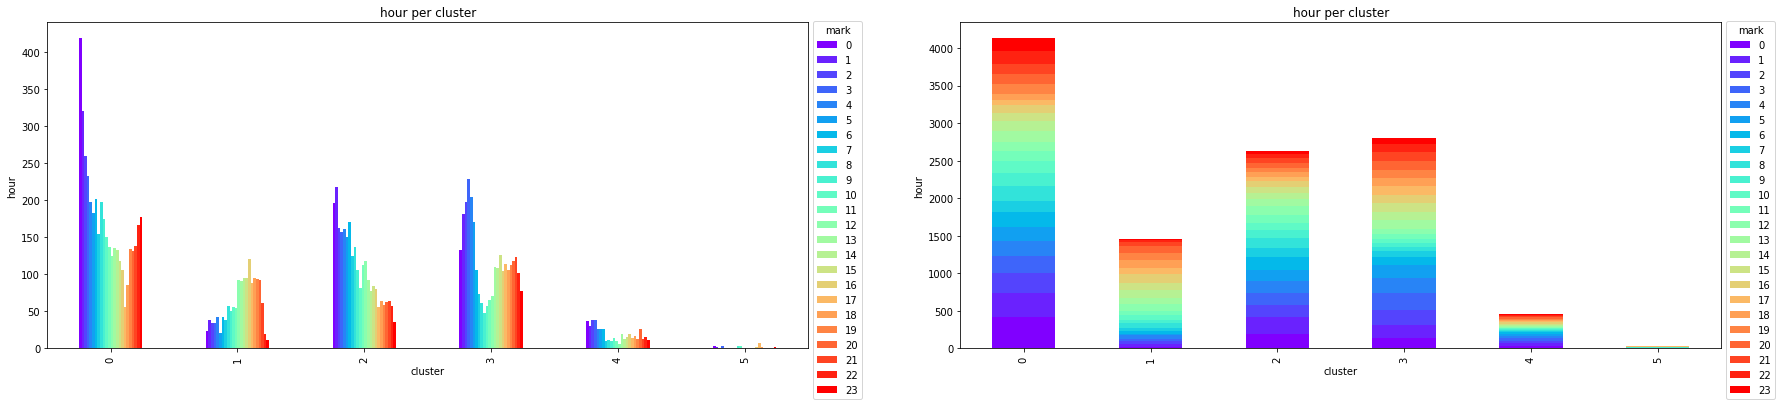

In [ ]:
for i in range(len(cluster_labels)):
  hour_ct = pd.crosstab(cluster_labels[i],users_profile_all['most_freq_hour'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('hour')

  ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('hour')

  plt.show()

## Clusters characterization with respect to numerical features

In [ ]:
cols = []
for i in range(len(cluster_labels)):
  s = 'label_K='+str(i+2)
  cols.append(s)

In [ ]:
for i in range(len(cluster_labels)):
  users_profile_all[cols[i]]=cluster_labels[i]

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness,label_K=2,label_K=3,label_K=4,label_K=5,label_K=6
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,6237.625,138813.625,0.0,1031.125,297.5,...,9.578214,10.607494,109.637321,3900,0.608718,0,2,0,0,3
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,6237.625,138813.625,0.0,969.000,297.5,...,0.000000,0.000000,85.026719,3893,0.519137,0,2,0,0,3
2,755116,呉⚛,en,0,2012-02-08 05:25:49,6237.625,92396.000,0.0,391.000,77.0,...,5.114369,6.387527,80.780317,3885,0.551866,0,2,0,0,3
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,6237.625,138813.625,0.0,209.000,297.5,...,0.000000,0.000000,84.281111,3884,0.519310,0,2,0,0,3
4,785080,W H,en,0,2012-02-23 01:08:16,6237.625,138486.000,0.0,1031.125,185.0,...,8.222893,9.556485,95.166473,3870,0.887855,0,2,0,0,3


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).mean()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,
0,4796.902662,100819.244197,565.081492,194.548374,176.251599,112256.250209,556.595496,4867.928842,31.017818,902.021383,1.148031,2.329933,73.818230,2175.740339,1.294706
1,119.145020,5622.102152,111.995102,24.055998,9.929845,2624.921881,63.856782,274.757933,9.388076,74.405521,0.437628,0.491571,68.699906,1659.143092,0.152804


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,
0,116.010606,5583.621322,110.409321,23.939505,9.737603,2618.070894,43.533545,273.963966,7.799099,73.158727,0.436053,0.491046,68.685841,1658.283069,0.152310
1,2746.272418,89367.899457,1020.150815,139.991848,126.679348,93352.635870,9370.679348,12146.518217,614.986274,5679.679402,1.052319,1.601249,91.181773,2161.097826,0.952926
2,4878.440644,100800.443116,540.943915,196.445478,178.087235,112454.526025,127.879616,4445.590237,3.252919,642.999541,1.151393,2.356226,72.882764,2174.589997,1.305492


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,
0,5223.449475,106919.400674,559.171723,195.116651,179.754468,122504.186579,318.419881,4806.309426,6.931162,697.726316,1.148352,2.441731,70.740201,2169.256507,1.362424
1,262.930233,138813.625000,984.165698,90.662791,67.604651,143589.651163,9535.511628,38695.643588,1686.094420,22001.904436,1.588606,0.443220,133.826575,2443.651163,0.110831
2,83.580753,4377.224609,16.035624,9.689407,3.208340,2209.403495,6.242680,224.083225,0.988437,55.215851,0.413099,0.387614,64.654711,1568.262456,0.075219
3,560.713919,18046.594837,563.875214,114.528237,65.864233,7586.619509,593.871078,702.008979,48.366827,172.212709,0.665427,1.104076,88.945468,2110.100970,0.585111


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,
0,5282.509251,99297.755676,560.898284,191.989453,183.856632,65170.510547,356.859850,2245.139044,7.536610,304.617225,1.159945,2.429725,71.542038,2201.558813,1.349703
1,4683.886190,138813.625000,557.836517,214.308952,160.938865,452548.227074,345.668122,19715.762495,7.974741,3026.300683,1.089974,2.411179,68.093081,2008.591703,1.427958
2,262.750000,138813.625000,1005.446875,89.662500,70.875000,134282.775000,9750.025000,38021.927075,1774.175312,22681.617948,1.629452,0.366372,135.132893,2427.500000,0.113432
3,423.036043,18026.530098,564.722206,111.256540,59.593341,8354.139120,548.045779,783.151078,49.975385,186.575532,0.637885,1.080422,89.198112,2102.001189,0.556662
4,84.911997,4583.928954,15.953013,9.834558,3.292605,2385.470831,5.968152,235.176807,0.931284,57.272720,0.414924,0.388516,64.658226,1568.099525,0.075934


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,retcount_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,
0,87.720345,5035.728356,16.696735,12.623821,3.654897,2486.403144,3.879807,209.789115,0.543938,45.684718,0.492588,0.427100,67.700836,1338.044740,0.107498
1,489.369663,17011.102273,663.178891,116.897039,64.008953,8038.357438,809.274793,804.270602,63.111267,206.872186,0.589177,1.196686,89.794121,2053.469697,0.626023
2,108.880282,5224.226447,21.071279,10.000761,5.369623,2827.655501,12.131329,314.454999,1.937899,81.311626,0.334780,0.324639,61.645594,2000.303769,0.042289
3,5243.918453,99736.915684,550.350125,193.030547,183.677028,65258.726331,280.790282,2258.028361,6.046843,304.678425,1.165260,2.428535,71.659788,2205.625223,1.336388
4,4687.373638,138813.625000,554.982571,214.830065,160.971678,452131.568627,323.165577,19688.636359,6.604864,3024.171187,1.092290,2.405009,68.170537,2007.409586,1.431563
5,235.166667,138813.625000,1002.593750,83.111111,65.944444,138408.361111,9722.250000,40691.455410,1858.494692,24705.920497,1.578219,0.326332,135.447500,2428.388889,0.101963


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).std()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,2091.122793,56478.658405,401.508154,114.086549,83.937303,485.467538,148946.557437,2047.855843,8829.395077,204.815584,3631.016465,1.728277,4.92746,20.443029,621.51392,0.723052
1,389.726505,21227.511774,279.892673,46.247199,31.888951,122.110995,11455.696520,486.052430,1000.603149,56.737776,437.161719,0.633143,2.14450,14.232402,430.05957,0.258042


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,371.670589,21195.800194,277.762823,45.992181,31.299409,119.630776,11503.000497,229.698630,1002.165951,44.668829,427.139636,0.632066,2.140021,14.226913,429.650108,0.258115
1,2763.528046,62224.475187,104.988632,121.030000,104.258561,570.581659,118146.883257,1555.423338,20247.480072,717.208761,13371.526584,0.700943,4.723591,33.191065,573.854612,0.923239
2,2016.535622,56405.159634,397.406390,113.446507,82.530922,475.911809,150094.705214,541.754594,7539.811228,12.076274,1733.792801,1.761361,4.921946,19.058621,623.437949,0.709071


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,1717.471377,53535.967291,395.851220,114.791823,81.817257,450.055441,153804.716941,1445.141609,7806.190802,30.499733,1812.161407,1.793838,4.926253,17.946543,626.279496,0.707618
1,412.506069,0.000000,215.167444,114.105461,96.317960,449.023917,80306.053277,2127.951456,25480.740569,743.582681,20334.476434,0.781980,2.497706,27.518838,365.363999,0.185887
2,301.280228,20070.817897,68.645744,18.706440,19.561044,85.340292,11486.228394,47.505413,958.628895,7.574326,371.920920,0.607047,1.825124,9.925597,374.044503,0.104638
3,1118.984238,34637.790418,425.458591,90.152930,78.377554,295.940063,21015.117694,1908.497549,2043.683651,125.065668,638.799019,0.853720,3.456413,16.505084,463.749939,0.474679


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,1643.216810,57050.590339,400.217740,117.006655,80.834740,465.473707,71406.917973,1533.283624,2418.793783,30.374557,453.294364,1.932473,4.899234,18.398741,617.259481,0.676427
1,2135.389539,0.000000,374.447208,101.151419,82.642044,385.161129,84728.453445,1545.432780,12118.218787,39.710689,4139.526584,0.456591,5.071645,15.067516,641.907351,0.862790
2,424.238428,0.000000,162.402722,117.242319,99.046010,462.840244,59966.168340,1580.980716,24617.686270,686.566418,20687.508975,0.796015,2.324350,26.624330,356.559701,0.192592
3,815.187612,35123.252501,425.568108,86.621794,72.873567,276.458563,23971.648479,1825.491105,2319.078188,129.536956,671.661253,0.742588,3.358873,16.693740,458.672298,0.447803
4,303.071434,20759.982639,66.418706,19.307728,19.732048,87.816127,12377.119221,44.630275,1005.244838,6.531326,376.507324,0.613390,1.831915,9.901968,373.976644,0.106686


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,196.877332,23187.734259,59.918651,26.005612,22.037542,96.095663,13744.141608,31.220323,1077.533054,3.326772,258.001041,0.752294,1.942153,7.591068,136.337217,0.125481
1,1017.312522,33213.005942,397.097252,85.733455,75.864014,292.199725,24097.087789,2278.551961,2518.547010,148.297359,754.088473,0.678863,3.445063,17.361841,415.325541,0.469890
2,501.325453,19772.378052,93.088139,22.585620,21.679941,93.625234,11716.392705,70.839052,948.567036,10.964280,505.647785,0.375847,1.661329,13.481016,365.160467,0.112181
3,1683.166578,56774.498487,400.708814,116.531518,80.809574,463.524679,71225.539089,1313.469302,2429.871495,25.774903,450.124195,1.930818,4.904146,18.415969,618.390503,0.680825
4,2134.077075,0.000000,374.506749,101.018927,82.698809,384.542158,85105.305735,1476.357035,12116.201864,27.393599,4135.074657,0.457651,5.080098,15.184084,642.537602,0.865358
5,386.440718,0.000000,171.187500,117.728933,98.746991,454.162435,58946.936144,1666.500000,24366.727454,670.528958,20841.834053,0.789556,2.243851,27.236532,373.014613,0.178833


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).max()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,1282.625,500000.0,10000.0,106034.982635,3722.299247,69042.400000,41.833333,11.821278,189.0,3900,4.148438
1,6237.625,138813.625,1031.125,297.5,245.0,1282.625,246185.0,10000.0,20616.043432,1174.763061,18511.666667,17.033898,11.325500,245.0,3853,2.360635


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,1282.625,246185.0,6320.0,20616.043432,595.185862,18511.666667,17.033898,11.325500,245.000000,3853,2.360635
1,6237.625,138813.625,1031.125,297.5,245.0,1282.625,500000.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,11.738812,189.000000,3308,4.101197
2,6237.625,138813.625,1031.125,297.5,245.0,1282.625,500000.0,7348.0,63204.336440,284.172893,26717.125571,41.833333,11.821278,178.536697,3900,4.148438


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,1282.625,500000.0,10000.0,63204.336440,621.351370,26717.125571,41.833333,11.821278,152.552135,3900,4.148438
1,1576.000,138813.625,1031.125,297.5,245.0,1282.625,500000.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,10.274506,189.000000,3068,0.690593
2,6237.625,138813.625,1031.125,297.5,245.0,1282.625,246185.0,1137.0,20616.043432,302.709314,14865.166667,17.033898,10.843620,110.000000,3226,2.360635
3,6237.625,138813.625,1031.125,297.5,245.0,1282.625,216217.0,10000.0,20509.222959,1174.763061,18511.666667,16.527778,11.806861,245.000000,3853,4.101197


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,6237.625,138813.625,1031.125,297.5,245.0,1282.625,353871.0,10000.0,13775.335362,364.686189,5119.340568,41.833333,11.821278,152.552135,3900,4.148438
1,6237.625,138813.625,1031.125,297.5,245.0,1282.625,500000.0,10000.0,95097.011295,621.351370,29482.488281,2.566038,11.778388,118.519065,3463,4.105727
2,1576.000,138813.625,1031.125,297.5,245.0,1282.625,401304.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,10.274506,189.000000,3068,0.690593
3,6237.625,138813.625,1031.125,297.5,245.0,1282.625,242743.0,10000.0,24701.494459,1174.763061,18511.666667,8.777778,11.806861,245.000000,3853,4.101197
4,6237.625,138813.625,1031.125,297.5,245.0,1282.625,246185.0,883.0,20616.043432,160.303532,14865.166667,17.033898,10.843620,110.000000,3226,2.360635


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,6237.625,138813.625,890.000,297.5,245.0,1282.625,220384.0,883.0,20616.043432,73.834504,4921.029851,17.033898,10.213544,119.000000,1999,2.360635
1,6237.625,138813.625,1031.125,297.5,245.0,1282.625,242743.0,10000.0,25220.874295,1254.132950,18511.666667,4.148760,11.806861,245.000000,3853,4.101197
2,6237.625,138813.625,1031.125,297.5,245.0,1282.625,246185.0,768.0,17162.545678,160.303532,14865.166667,3.042857,10.880813,106.600000,3672,1.280193
3,6237.625,138813.625,1031.125,297.5,245.0,1282.625,353871.0,10000.0,13775.335362,364.686189,5119.340568,41.833333,11.821278,152.552135,3900,4.148438
4,6237.625,138813.625,1031.125,297.5,245.0,1282.625,500000.0,10000.0,95097.011295,256.641524,29482.488281,2.566038,11.778388,118.519065,3463,4.105727
5,1444.000,138813.625,1031.125,297.5,245.0,1282.625,401304.0,10000.0,106034.982635,3722.299247,69042.400000,3.043548,10.274506,189.000000,3068,0.690593


In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).min()
  display(x)

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=2,,,,,,,,,,,,,,,,
0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002976,0.0,21.107632,896,0.004533
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.000000,890,0.000319


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=3,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
1,8.0,2.0,4.0,0.0,0.0,0.0,1.0,1.0,0.028356,0.310517,2.111647,0.060421,0.0,21.107632,919,0.003324
2,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002976,0.0,25.117843,896,0.010071


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=4,,,,,,,,,,,,,,,,
0,16.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.005892,0.0,21.107632,896,0.010071
1,24.0,138813.625,4.0,1.0,2.0,5.0,24410.0,1.0,4622.883067,0.310517,2558.037736,0.273973,0.0,67.371429,1247,0.004533
2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319
3,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,46.040452,919,0.000334


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=5,,,,,,,,,,,,,,,,
0,16.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002976,0.0,21.107632,896,0.010676
1,25.0,138813.625,1.0,0.0,0.0,0.0,145873.0,1.0,6793.791798,0.044992,132.863359,0.084900,0.0,38.092199,908,0.010071
2,24.0,138813.625,4.0,1.0,2.0,5.0,24410.0,1.0,4622.883067,0.310517,2558.037736,0.273973,0.0,67.371429,1247,0.004533
3,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,46.040452,919,0.000334
4,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,890,0.000319


,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
label_K=6,,,,,,,,,,,,,,,,
0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,16.400000,890,0.000573
1,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,39.228208,919,0.000334
2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,1454,0.000319
3,16.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002976,0.0,21.107632,896,0.010676
4,25.0,138813.625,1.0,0.0,0.0,0.0,145873.0,1.0,6793.791798,0.044992,132.863359,0.084900,0.0,38.092199,908,0.010071
5,24.0,138813.625,4.0,1.0,2.0,5.0,46559.0,1.0,6900.525770,0.310517,3515.125000,0.273973,0.0,67.371429,1247,0.004533
